In [340]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from yellowbrick.classifier import ConfusionMatrix

# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import fun_functions as fun

from yellowbrick.classifier import ConfusionMatrix


# autoreload
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
air_disaster = pd.read_csv('../data/Aircraft_Incident_Dataset1.csv')

In [5]:
air_disaster_1970_on = air_disaster
air_disaster_1970_on['Incident_Date'] = pd.to_datetime(air_disaster_1970_on['Incident_Date'], format="%m/%d/%Y")
air_disaster_1970_on['Year'] = air_disaster_1970_on['Incident_Date'].dt.year
air_disaster_1970_on = air_disaster_1970_on[air_disaster_1970_on['Year'] >= 1970]

In [6]:
incidents_by_phase = pd.DataFrame(air_disaster_1970_on['Aircraft_Phase'].value_counts()).reset_index()
incidents_by_phase

Aircraft_Phase  count
0            Landing (LDG)   3107
1           En route (ENR)   2698
2           Approach (APR)   1625
3            Unknown (UNK)   1269
4            Takeoff (TOF)   1124
5           Standing (STD)   1097
6      Initial climb (ICL)    659
7               Taxi (TXI)    345
8        Maneuvering (MNV)    236
9  Pushback / towing (PBT)     69

<Axes: xlabel='count', ylabel='Aircraft_Phase'>

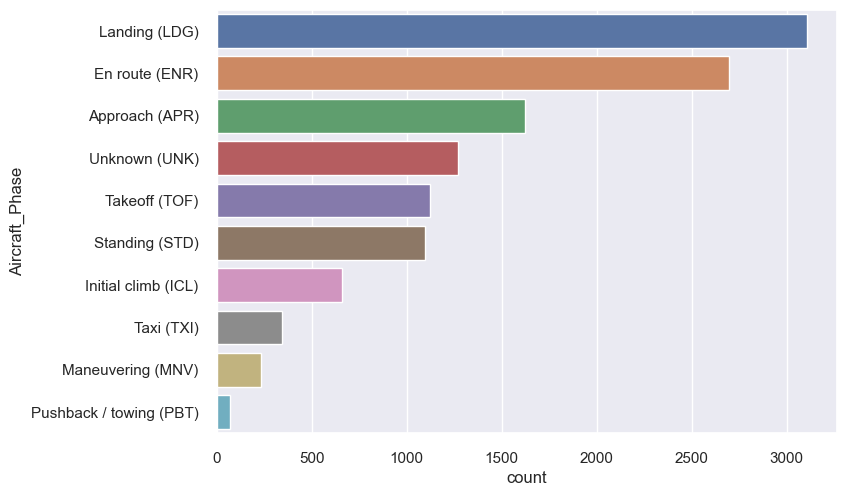

In [7]:
sns.barplot(incidents_by_phase, y='Aircraft_Phase', x='count')

In [8]:
percent =  []

for count in incidents_by_phase['count']:
    percent.append(f"{(count / (incidents_by_phase['count'].sum())):.2f}")

In [9]:
incidents_by_phase['Percent of total'] = percent
incidents_by_phase['Percent of total'] = incidents_by_phase['Percent of total'].astype(float)

<Axes: xlabel='Percent of total', ylabel='Aircraft_Phase'>

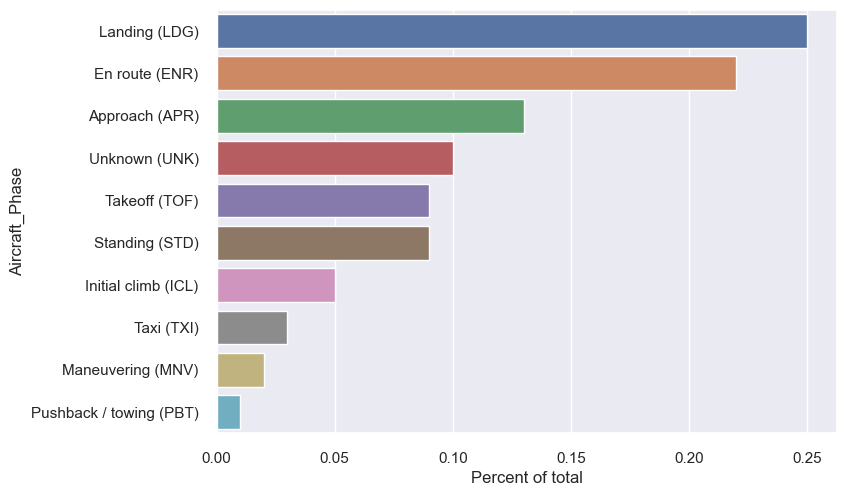

In [10]:
sns.barplot(incidents_by_phase, y='Aircraft_Phase', x='Percent of total')

In [11]:
world_flights = pd.read_csv('../data/API_IS.AIR.DPRT_DS2_en_csv_v2_5735762/API_IS.AIR.DPRT_DS2_en_csv_v2_5735762.csv')

In [12]:
world_flights = world_flights[world_flights['Country Name'] == 'World']

In [13]:
world_flights.fillna(0)

Country Name Country Code  \
259        World          WLD   

                                        Indicator Name Indicator Code  1960  \
259  Air transport, registered carrier departures w...    IS.AIR.DPRT   0.0   

     1961  1962  1963  1964  1965  ...         2013         2014        2015  \
259   0.0   0.0   0.0   0.0   0.0  ...  32160518.88  33026724.98  34030586.0   

           2016         2017         2018         2019         2020  \
259  35337714.0  36299460.06  37405640.25  38082933.01  20098778.56   

            2021  2022  
259  24054588.85   0.0  

[1 rows x 67 columns]

In [14]:
world_flights = world_flights.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code'])

In [15]:
world_flights = world_flights.swapaxes(axis1=0, axis2=1, copy=None).reset_index()

In [16]:
world_flights.rename(columns={'index': 'Year', 259: 'Flights'}, inplace=True)

In [17]:
world_flights.fillna(0, inplace=True)

In [18]:
world_flights = world_flights[world_flights['Flights'] > 0]

In [19]:
df2 = pd.DataFrame({'Year': [1972, 2022], 'Flights': [9634700.00, 32400000]})
#df2 = pd.DataFrame({'Year': [1972], 'Flights': [9634700.00]})

In [20]:
df2

Year     Flights
0  1972   9634700.0
1  2022  32400000.0

In [21]:
world_flights = pd.concat([world_flights, df2],ignore_index=True)

In [22]:
world_flights['Year'] = world_flights['Year'].astype(int)
world_flights = world_flights.sort_values(by='Year', ascending=True).reset_index()

In [23]:
world_flights

index  Year      Flights
0       0  1970   9448300.00
1       1  1971   9504500.00
2      51  1972   9634700.00
3       2  1973   9764900.00
4       3  1974   9254900.00
5       4  1975   9244700.00
6       5  1976   9562900.00
7       6  1977   9915900.00
8       7  1978  10183700.00
9       8  1979  10653400.00
10      9  1980  10704900.00
11     10  1981  10270100.00
12     11  1982  10335800.00
13     12  1983  10758700.00
14     13  1984  11404000.00
15     14  1985  11897900.00
16     15  1986  12677000.00
17     16  1987  13244800.00
18     17  1988  13880900.00
19     18  1989  14021100.00
20     19  1990  14583900.00
21     20  1991  14360900.00
22     21  1992  14918800.00
23     22  1993  15986200.00
24     23  1994  17218900.00
25     24  1995  18008200.00
26     25  1996  18953600.00
27     26  1997  19546600.00
28     27  1998  19653200.00
29     28  1999  20736600.00
30     29  2000  22008658.00
31     30  2001  22264220.00
32     31  2002  20817389.00
33     32  2003  21282617.00
34     33  2004  23752616.00
35     34  2005  24215712.00
36     35  2006  24829383.00
37     36  2007  26016011.00
38     37  2008  25498093.00
39     38  2009  26122523.00
40     39  2010  30222074.54
41     40  2011  31203707.10
42     41  2012  31434525.59
43     42  2013  32160518.88
44     43  2014  33026724.98
45     44  2015  34030586.00
46     45  2016  35337714.00
47     46  2017  36299460.06
48     47  2018  37405640.25
49     48  2019  38082933.01
50     49  2020  20098778.56
51     50  2021  24054588.85
52     52  2022  32400000.00

<Axes: xlabel='Year', ylabel='Flights'>

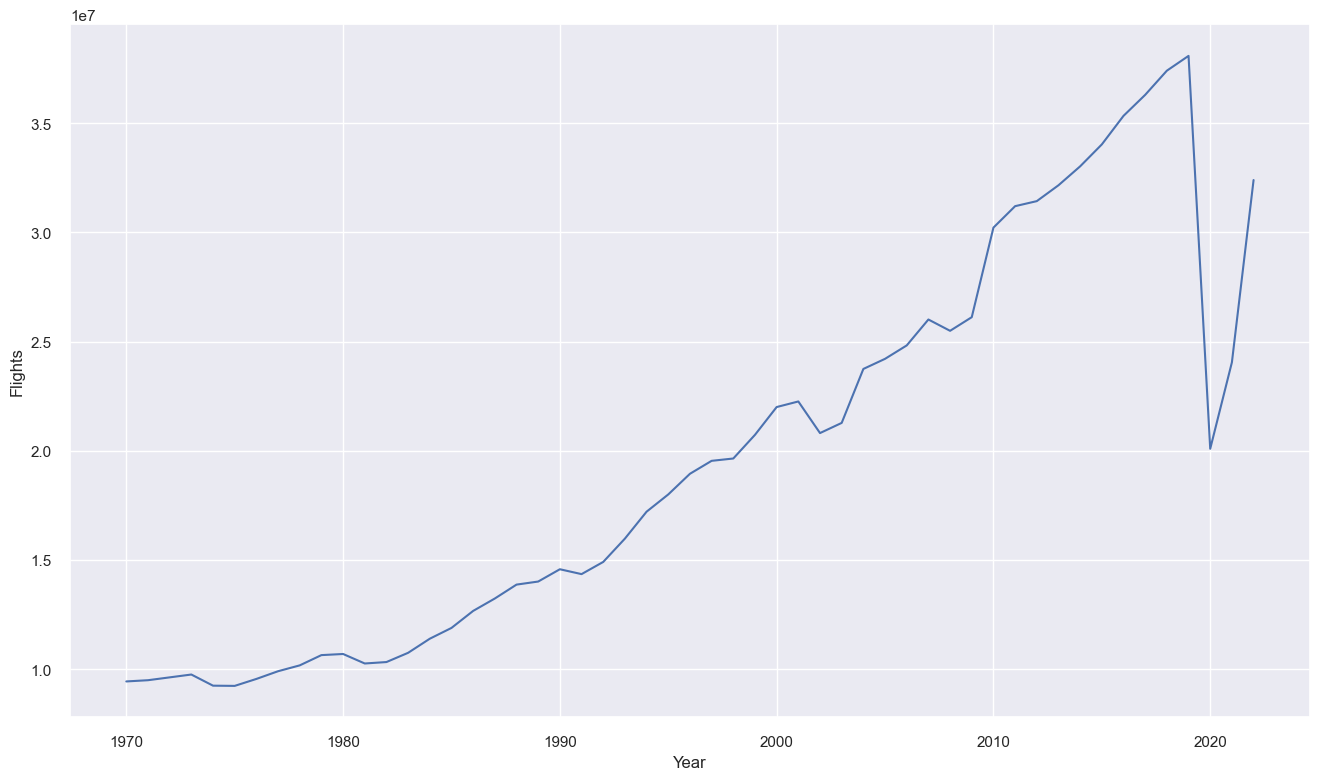

In [24]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(world_flights, y='Flights', x='Year')

In [25]:
air_disaster.shape

(23519, 24)

In [26]:
air_disaster.head()

Incident_Date                        Aircaft_Model Aircaft_Registration  \
0    2022-01-03  British Aerospace 4121 Jetstream 41               ZS-NRJ   
1    2022-01-04  British Aerospace 3101 Jetstream 31               HR-AYY   
2    2022-01-05                       Boeing 737-4H6               EP-CAP   
3    2022-01-08                  Tupolev Tu-204-100C             RA-64032   
4    2022-01-12        Beechcraft 200 Super King Air                  NaN   

           Aircaft_Operator                    Aircaft_Nature  \
0                SA Airlink  Domestic Non Scheduled Passenger   
1                    LANHSA      Domestic Scheduled Passenger   
2          Caspian Airlines      Domestic Scheduled Passenger   
3  Cainiao, opb Aviastar-TU                             Cargo   
4                   private                    Illegal Flight   

                                   Incident_Category  \
0                       Accident | repairable-damage   
1                       Accident | repairable-damage   
2                       Accident | repairable-damage   
3                               Accident | hull-loss   
4  Criminal occurrence (sabotage, shoot down) | h...   

                                  Incident_Cause(es)     Incident_Location  \
0  Airplane - Engines, Airplane - Engines - Prop/...  near Venetia Mine...   
1  Airplane - Undercarriage, Airplane - Undercarr...       Roatán-Juan ...   
2  Airplane - Undercarriage, Airplane - Undercarr...       Isfahan-Shah...   
3  Cargo - Fire/smoke, Result - Damaged on the gr...       Hangzhou-Xia...   
4                     Result - Damaged on the ground       Machakilha, ...   

     Aircaft_Damage_Type                       Date  ...  \
0            Substantial      Monday 3 January 2022  ...   
1            Substantial     Tuesday 4 January 2022  ...   
2            Substantial   Wednesday 5 January 2022  ...   
3              Destroyed    Saturday 8 January 2022  ...   
4  Damaged beyond repair  Wednesday 12 January 2022  ...   

             Onboard_Passengers                   Onboard_Total Fatalities  \
0  Fatalities: 0 / Occupants: 4    Fatalities: 0 / Occupants: 7          0   
1    Fatalities: 0 / Occupants:   Fatalities: 0 / Occupants: 19          0   
2    Fatalities: 0 / Occupants:  Fatalities: 0 / Occupants: 116          0   
3  Fatalities: 0 / Occupants: 0    Fatalities: 0 / Occupants: 8          0   
4  Fatalities: 0 / Occupants: 0    Fatalities: 0 / Occupants: 0          0   

              Aircaft_First_Flight  Aircraft_Phase  \
0  1995-05-19  (26 years 8 months)   Landing (LDG)   
1                             1985   Landing (LDG)   
2  1992-09-18  (29 years 4 months)   Landing (LDG)   
3  2002-07-18  (19 years 6 months)  Standing (STD)   
4                              NaN  Standing (STD)   

                                   Departure_Airport  \
0  Johannesburg-O.R. Tambo International Airport ...   
1  La Ceiba-Goloson International Airport (LCE/MH...   
2                  Mashhad Airport (MHD/OIMM) , Iran   
3  Hangzhou-Xiaoshan International Airport (HGH/Z...   
4                                                  ?   

                                 Destination_Airport Ground_Casualties  \
0         Venetia Mine Airport (FAVM) , South Africa               NaN   
1  Roatán-Juan Manuel Gálvez International Airpor...               NaN   
2  Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran               NaN   
3  Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...               NaN   
4                                                  ?               NaN   

  Collision_Casualties  Year  
0                  NaN  2022  
1                  NaN  2022  
2                  NaN  2022  
3                  NaN  2022  
4                  NaN  2022  

[5 rows x 24 columns]

In [27]:
air_disaster.describe()


Incident_Date    Fatalities          Year
count                          23519  23519.000000  23519.000000
mean   1973-09-01 06:08:57.267740976      5.611931   1973.170713
min              1919-08-02 00:00:00      0.000000   1919.000000
25%              1948-06-06 00:00:00      0.000000   1948.000000
50%              1971-06-11 00:00:00      0.000000   1971.000000
75%              1994-09-29 12:00:00      4.000000   1994.000000
max              2022-02-15 00:00:00   1692.000000   2022.000000
std                              NaN     22.205937     24.963880

In [28]:
air_disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23519 entries, 0 to 23518
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Incident_Date         23519 non-null  datetime64[ns]
 1   Aircaft_Model         23519 non-null  object        
 2   Aircaft_Registration  21958 non-null  object        
 3   Aircaft_Operator      23519 non-null  object        
 4   Aircaft_Nature        23519 non-null  object        
 5   Incident_Category     23519 non-null  object        
 6   Incident_Cause(es)    23519 non-null  object        
 7   Incident_Location     22587 non-null  object        
 8   Aircaft_Damage_Type   22751 non-null  object        
 9   Date                  23519 non-null  object        
 10  Time                  9203 non-null   object        
 11  Arit                  23519 non-null  object        
 12  Aircaft_Engines       10636 non-null  object        
 13  Onboard_Crew    

In [29]:
air_disaster.head()

Incident_Date                        Aircaft_Model Aircaft_Registration  \
0    2022-01-03  British Aerospace 4121 Jetstream 41               ZS-NRJ   
1    2022-01-04  British Aerospace 3101 Jetstream 31               HR-AYY   
2    2022-01-05                       Boeing 737-4H6               EP-CAP   
3    2022-01-08                  Tupolev Tu-204-100C             RA-64032   
4    2022-01-12        Beechcraft 200 Super King Air                  NaN   

           Aircaft_Operator                    Aircaft_Nature  \
0                SA Airlink  Domestic Non Scheduled Passenger   
1                    LANHSA      Domestic Scheduled Passenger   
2          Caspian Airlines      Domestic Scheduled Passenger   
3  Cainiao, opb Aviastar-TU                             Cargo   
4                   private                    Illegal Flight   

                                   Incident_Category  \
0                       Accident | repairable-damage   
1                       Accident | repairable-damage   
2                       Accident | repairable-damage   
3                               Accident | hull-loss   
4  Criminal occurrence (sabotage, shoot down) | h...   

                                  Incident_Cause(es)     Incident_Location  \
0  Airplane - Engines, Airplane - Engines - Prop/...  near Venetia Mine...   
1  Airplane - Undercarriage, Airplane - Undercarr...       Roatán-Juan ...   
2  Airplane - Undercarriage, Airplane - Undercarr...       Isfahan-Shah...   
3  Cargo - Fire/smoke, Result - Damaged on the gr...       Hangzhou-Xia...   
4                     Result - Damaged on the ground       Machakilha, ...   

     Aircaft_Damage_Type                       Date  ...  \
0            Substantial      Monday 3 January 2022  ...   
1            Substantial     Tuesday 4 January 2022  ...   
2            Substantial   Wednesday 5 January 2022  ...   
3              Destroyed    Saturday 8 January 2022  ...   
4  Damaged beyond repair  Wednesday 12 January 2022  ...   

             Onboard_Passengers                   Onboard_Total Fatalities  \
0  Fatalities: 0 / Occupants: 4    Fatalities: 0 / Occupants: 7          0   
1    Fatalities: 0 / Occupants:   Fatalities: 0 / Occupants: 19          0   
2    Fatalities: 0 / Occupants:  Fatalities: 0 / Occupants: 116          0   
3  Fatalities: 0 / Occupants: 0    Fatalities: 0 / Occupants: 8          0   
4  Fatalities: 0 / Occupants: 0    Fatalities: 0 / Occupants: 0          0   

              Aircaft_First_Flight  Aircraft_Phase  \
0  1995-05-19  (26 years 8 months)   Landing (LDG)   
1                             1985   Landing (LDG)   
2  1992-09-18  (29 years 4 months)   Landing (LDG)   
3  2002-07-18  (19 years 6 months)  Standing (STD)   
4                              NaN  Standing (STD)   

                                   Departure_Airport  \
0  Johannesburg-O.R. Tambo International Airport ...   
1  La Ceiba-Goloson International Airport (LCE/MH...   
2                  Mashhad Airport (MHD/OIMM) , Iran   
3  Hangzhou-Xiaoshan International Airport (HGH/Z...   
4                                                  ?   

                                 Destination_Airport Ground_Casualties  \
0         Venetia Mine Airport (FAVM) , South Africa               NaN   
1  Roatán-Juan Manuel Gálvez International Airpor...               NaN   
2  Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran               NaN   
3  Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...               NaN   
4                                                  ?               NaN   

  Collision_Casualties  Year  
0                  NaN  2022  
1                  NaN  2022  
2                  NaN  2022  
3                  NaN  2022  
4                  NaN  2022  

[5 rows x 24 columns]

In [30]:
onboard_split = []
for x in air_disaster['Onboard_Total']:
    onboard_split.append(x.split('/'))

occupants = []

for list in onboard_split:
    occupants.append(list[1])

list_occupants = []

for list in occupants:
    list_occupants.append(list.split(':'))
    
num_occupants = []

for item in list_occupants:
    num_occupants.append(item[1])


In [31]:
air_disaster['Total Occupants'] = num_occupants

In [32]:
onboard_split = []
for x in air_disaster['Onboard_Passengers']:
    onboard_split.append(x.split('/'))

occupants = []

for list in onboard_split:
    occupants.append(list[1])

list_occupants = []

for list in occupants:
    list_occupants.append(list.split(':'))
    
num_occupants = []

for item in list_occupants:
    if item[1] == '':
        num_occupants.append(0)
    else:
        num_occupants.append(int(item[1]))

In [33]:
def occupants(df, col, index):
    onboard_split = []
    for x in df[col]:
        onboard_split.append(x.split('/'))

    occupants = []

    for list in onboard_split:
        occupants.append(list[index])

    list_occupants = []

    for list in occupants:
        list_occupants.append(list.split(':'))

    num_occupants = []

    for item in list_occupants:
        if item[1].isspace() == True:
            num_occupants.append(0)
        elif item[1] == '':
            num_occupants.append(0)
        else:
            num_occupants.append(int(item[1]))


    return num_occupants

In [34]:
air_disaster['Total Passengers'] = occupants(air_disaster, 'Onboard_Passengers', 1)

In [35]:
air_disaster['Total Crew'] = occupants(air_disaster, 'Onboard_Crew', 1)

In [36]:
air_disaster['Total Onboard Fatalities'] = occupants(air_disaster, 'Onboard_Total', 0)

In [37]:
air_disaster['Total Passenger Fatalities'] = occupants(air_disaster, 'Onboard_Passengers', 0)

In [38]:
air_disaster['Total Crew Fatalities'] = occupants(air_disaster, 'Onboard_Crew', 0)

In [39]:
air_disaster['Incident_Date'] = pd.to_datetime(air_disaster['Incident_Date'], format="%m/%d/%Y")

In [40]:
air_disaster["Year"] = air_disaster['Incident_Date'].dt.year

In [41]:
air_disaster['Year']

0        2022
1        2022
2        2022
3        2022
4        2022
         ... 
23514    1920
23515    1920
23516    1920
23517    1919
23518    1919
Name: Year, Length: 23519, dtype: int32

In [42]:
air_disaster = air_disaster.drop(columns=['Onboard_Crew'
                                          , 'Onboard_Passengers'
                                          , 'Onboard_Total'
                                          , 'Date'
                                          , 'Departure_Airport'
                                          ,'Destination_Airport'
                                          ,'Time'
                                          ,'Aircaft_Operator'
                                          ,'Aircaft_Registration'
                                          , 'Incident_Location'])

In [43]:
air_disaster['incident_count'] = 1

In [44]:
air_disaster = air_disaster.fillna(0)

In [45]:
top_models = air_disaster['Aircaft_Model'].value_counts().loc[lambda x : x > 10]

In [46]:
air_disaster.head(0)

Empty DataFrame
Columns: [Incident_Date, Aircaft_Model, Aircaft_Nature, Incident_Category, Incident_Cause(es), Aircaft_Damage_Type, Arit, Aircaft_Engines, Fatalities, Aircaft_First_Flight, Aircraft_Phase, Ground_Casualties, Collision_Casualties, Year, Total Occupants, Total Passengers, Total Crew, Total Onboard Fatalities, Total Passenger Fatalities, Total Crew Fatalities, incident_count]
Index: []

[0 rows x 21 columns]

In [47]:
incidents_by_year = air_disaster.groupby('Year')['incident_count'].sum()

In [48]:
incidents_by_year

Year
1919      2
1920      4
1921      7
1922      3
1923      8
       ... 
2018    224
2019    237
2020    180
2021    148
2022     12
Name: incident_count, Length: 104, dtype: int64

<Axes: xlabel='Year', ylabel='incident_count'>

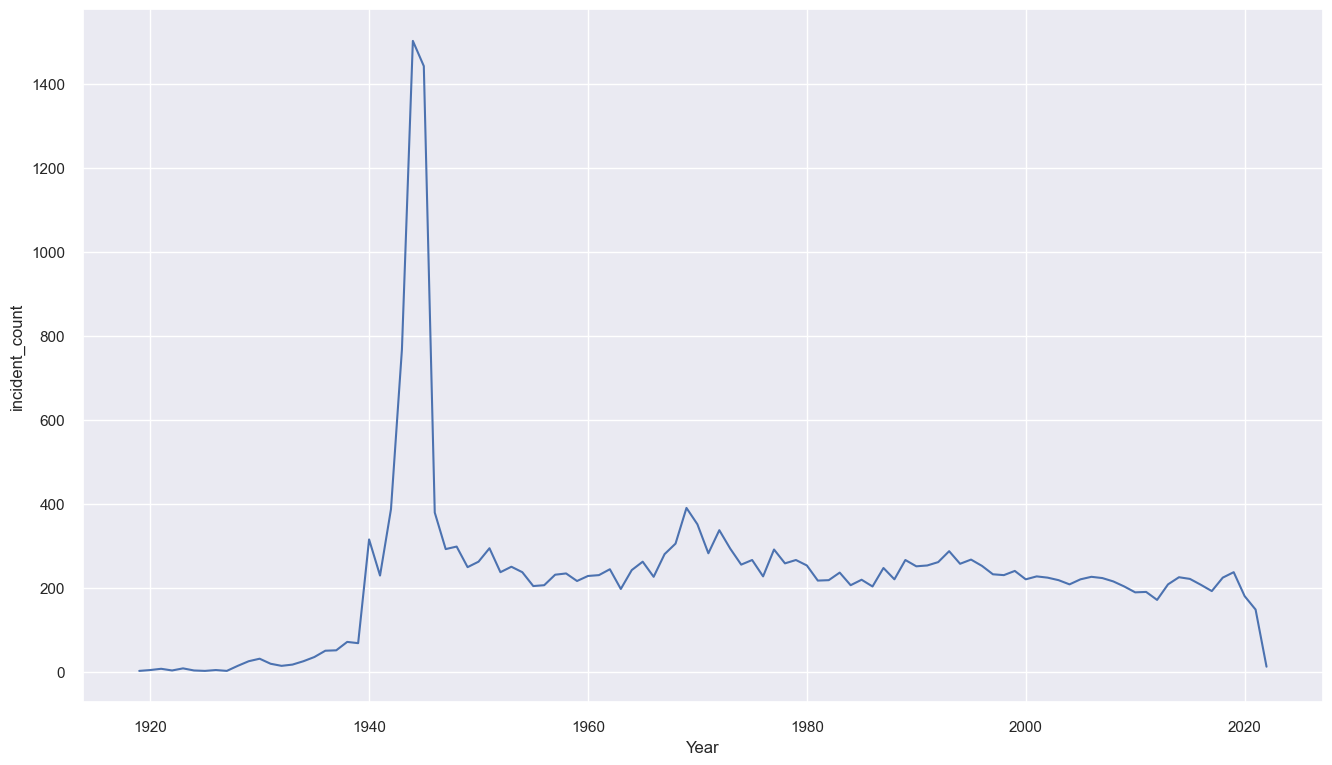

In [49]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year)

In [50]:
incidents_by_year = pd.DataFrame(incidents_by_year)

In [51]:
incidents_by_year = incidents_by_year.reset_index()

In [52]:
incidents_by_year_1970_2022 = incidents_by_year[incidents_by_year['Year'] >= 1970].reset_index()

In [53]:
world_flights

index  Year      Flights
0       0  1970   9448300.00
1       1  1971   9504500.00
2      51  1972   9634700.00
3       2  1973   9764900.00
4       3  1974   9254900.00
5       4  1975   9244700.00
6       5  1976   9562900.00
7       6  1977   9915900.00
8       7  1978  10183700.00
9       8  1979  10653400.00
10      9  1980  10704900.00
11     10  1981  10270100.00
12     11  1982  10335800.00
13     12  1983  10758700.00
14     13  1984  11404000.00
15     14  1985  11897900.00
16     15  1986  12677000.00
17     16  1987  13244800.00
18     17  1988  13880900.00
19     18  1989  14021100.00
20     19  1990  14583900.00
21     20  1991  14360900.00
22     21  1992  14918800.00
23     22  1993  15986200.00
24     23  1994  17218900.00
25     24  1995  18008200.00
26     25  1996  18953600.00
27     26  1997  19546600.00
28     27  1998  19653200.00
29     28  1999  20736600.00
30     29  2000  22008658.00
31     30  2001  22264220.00
32     31  2002  20817389.00
33     32  2003  21282617.00
34     33  2004  23752616.00
35     34  2005  24215712.00
36     35  2006  24829383.00
37     36  2007  26016011.00
38     37  2008  25498093.00
39     38  2009  26122523.00
40     39  2010  30222074.54
41     40  2011  31203707.10
42     41  2012  31434525.59
43     42  2013  32160518.88
44     43  2014  33026724.98
45     44  2015  34030586.00
46     45  2016  35337714.00
47     46  2017  36299460.06
48     47  2018  37405640.25
49     48  2019  38082933.01
50     49  2020  20098778.56
51     50  2021  24054588.85
52     52  2022  32400000.00

In [54]:
incidents_by_year_1970_2022

index  Year  incident_count
0      51  1970             351
1      52  1971             282
2      53  1972             337
3      54  1973             293
4      55  1974             255
5      56  1975             266
6      57  1976             227
7      58  1977             291
8      59  1978             258
9      60  1979             266
10     61  1980             253
11     62  1981             217
12     63  1982             218
13     64  1983             236
14     65  1984             206
15     66  1985             219
16     67  1986             203
17     68  1987             247
18     69  1988             220
19     70  1989             266
20     71  1990             251
21     72  1991             253
22     73  1992             261
23     74  1993             287
24     75  1994             257
25     76  1995             267
26     77  1996             252
27     78  1997             232
28     79  1998             230
29     80  1999             240
30     81  2000             220
31     82  2001             227
32     83  2002             224
33     84  2003             218
34     85  2004             208
35     86  2005             220
36     87  2006             226
37     88  2007             223
38     89  2008             215
39     90  2009             203
40     91  2010             189
41     92  2011             190
42     93  2012             171
43     94  2013             208
44     95  2014             225
45     96  2015             221
46     97  2016             207
47     98  2017             192
48     99  2018             224
49    100  2019             237
50    101  2020             180
51    102  2021             148
52    103  2022              12

In [55]:
incidents_by_year_1970_2022['Flights'] = world_flights['Flights']

In [56]:
incidents_by_year_1970_2022

index  Year  incident_count      Flights
0      51  1970             351   9448300.00
1      52  1971             282   9504500.00
2      53  1972             337   9634700.00
3      54  1973             293   9764900.00
4      55  1974             255   9254900.00
5      56  1975             266   9244700.00
6      57  1976             227   9562900.00
7      58  1977             291   9915900.00
8      59  1978             258  10183700.00
9      60  1979             266  10653400.00
10     61  1980             253  10704900.00
11     62  1981             217  10270100.00
12     63  1982             218  10335800.00
13     64  1983             236  10758700.00
14     65  1984             206  11404000.00
15     66  1985             219  11897900.00
16     67  1986             203  12677000.00
17     68  1987             247  13244800.00
18     69  1988             220  13880900.00
19     70  1989             266  14021100.00
20     71  1990             251  14583900.00
21     72  1991             253  14360900.00
22     73  1992             261  14918800.00
23     74  1993             287  15986200.00
24     75  1994             257  17218900.00
25     76  1995             267  18008200.00
26     77  1996             252  18953600.00
27     78  1997             232  19546600.00
28     79  1998             230  19653200.00
29     80  1999             240  20736600.00
30     81  2000             220  22008658.00
31     82  2001             227  22264220.00
32     83  2002             224  20817389.00
33     84  2003             218  21282617.00
34     85  2004             208  23752616.00
35     86  2005             220  24215712.00
36     87  2006             226  24829383.00
37     88  2007             223  26016011.00
38     89  2008             215  25498093.00
39     90  2009             203  26122523.00
40     91  2010             189  30222074.54
41     92  2011             190  31203707.10
42     93  2012             171  31434525.59
43     94  2013             208  32160518.88
44     95  2014             225  33026724.98
45     96  2015             221  34030586.00
46     97  2016             207  35337714.00
47     98  2017             192  36299460.06
48     99  2018             224  37405640.25
49    100  2019             237  38082933.01
50    101  2020             180  20098778.56
51    102  2021             148  24054588.85
52    103  2022              12  32400000.00

In [57]:
incidents_by_year_1970_2022 = incidents_by_year_1970_2022.drop(columns='index')

In [58]:
incidents_by_year_1970_2022['percent of incidents'] = incidents_by_year_1970_2022['incident_count']/incidents_by_year_1970_2022['Flights']

In [59]:
incidents_by_year_1970_2022

Year  incident_count      Flights  percent of incidents
0   1970             351   9448300.00          3.714954e-05
1   1971             282   9504500.00          2.967016e-05
2   1972             337   9634700.00          3.497774e-05
3   1973             293   9764900.00          3.000543e-05
4   1974             255   9254900.00          2.755297e-05
5   1975             266   9244700.00          2.877324e-05
6   1976             227   9562900.00          2.373757e-05
7   1977             291   9915900.00          2.934681e-05
8   1978             258  10183700.00          2.533460e-05
9   1979             266  10653400.00          2.496855e-05
10  1980             253  10704900.00          2.363404e-05
11  1981             217  10270100.00          2.112930e-05
12  1982             218  10335800.00          2.109174e-05
13  1983             236  10758700.00          2.193574e-05
14  1984             206  11404000.00          1.806384e-05
15  1985             219  11897900.00          1.840661e-05
16  1986             203  12677000.00          1.601325e-05
17  1987             247  13244800.00          1.864883e-05
18  1988             220  13880900.00          1.584912e-05
19  1989             266  14021100.00          1.897141e-05
20  1990             251  14583900.00          1.721076e-05
21  1991             253  14360900.00          1.761728e-05
22  1992             261  14918800.00          1.749470e-05
23  1993             287  15986200.00          1.795298e-05
24  1994             257  17218900.00          1.492546e-05
25  1995             267  18008200.00          1.482658e-05
26  1996             252  18953600.00          1.329563e-05
27  1997             232  19546600.00          1.186907e-05
28  1998             230  19653200.00          1.170293e-05
29  1999             240  20736600.00          1.157374e-05
30  2000             220  22008658.00          9.996066e-06
31  2001             227  22264220.00          1.019573e-05
32  2002             224  20817389.00          1.076024e-05
33  2003             218  21282617.00          1.024310e-05
34  2004             208  23752616.00          8.756930e-06
35  2005             220  24215712.00          9.085011e-06
36  2006             226  24829383.00          9.102119e-06
37  2007             223  26016011.00          8.571645e-06
38  2008             215  25498093.00          8.432003e-06
39  2009             203  26122523.00          7.771072e-06
40  2010             189  30222074.54          6.253707e-06
41  2011             190  31203707.10          6.089020e-06
42  2012             171  31434525.59          5.439879e-06
43  2013             208  32160518.88          6.467557e-06
44  2014             225  33026724.98          6.812665e-06
45  2015             221  34030586.00          6.494158e-06
46  2016             207  35337714.00          5.857764e-06
47  2017             192  36299460.06          5.289335e-06
48  2018             224  37405640.25          5.988402e-06
49  2019             237  38082933.01          6.223260e-06
50  2020             180  20098778.56          8.955768e-06
51  2021             148  24054588.85          6.152672e-06
52  2022              12  32400000.00          3.703704e-07

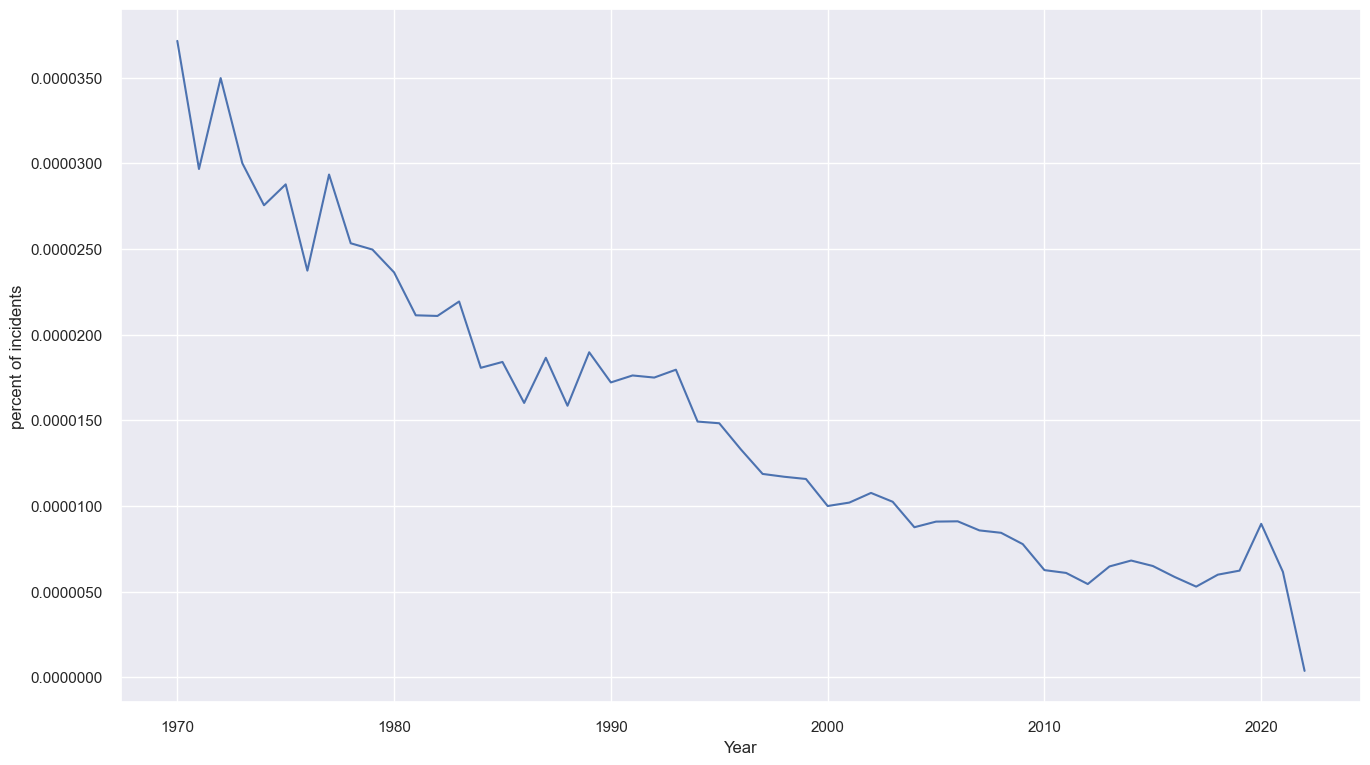

In [60]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year_1970_2022, y='percent of incidents', x='Year')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.7f'))

In [61]:
accidents_by_type = air_disaster[['Year', 'incident_count', 'Incident_Category', 'Total Onboard Fatalities']]

In [62]:
accidents_by_type

Year  incident_count  \
0      2022               1   
1      2022               1   
2      2022               1   
3      2022               1   
4      2022               1   
...     ...             ...   
23514  1920               1   
23515  1920               1   
23516  1920               1   
23517  1919               1   
23518  1919               1   

                                       Incident_Category  \
0                           Accident | repairable-damage   
1                           Accident | repairable-damage   
2                           Accident | repairable-damage   
3                                   Accident | hull-loss   
4      Criminal occurrence (sabotage, shoot down) | h...   
...                                                  ...   
23514                               Accident | hull-loss   
23515                               Accident | hull-loss   
23516                               Accident | hull-loss   
23517                               Accident | hull-loss   
23518                               Accident | hull-loss   

       Total Onboard Fatalities  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
...                         ...  
23514                         0  
23515                         0  
23516                         4  
23517                        14  
23518                         1  

[23519 rows x 4 columns]

In [63]:
accidents_by_type= accidents_by_type.groupby('Incident_Category').sum().reset_index()
accidents_by_type= accidents_by_type.sort_values(by='incident_count', ascending=False)

<Axes: xlabel='incident_count', ylabel='Incident_Category'>

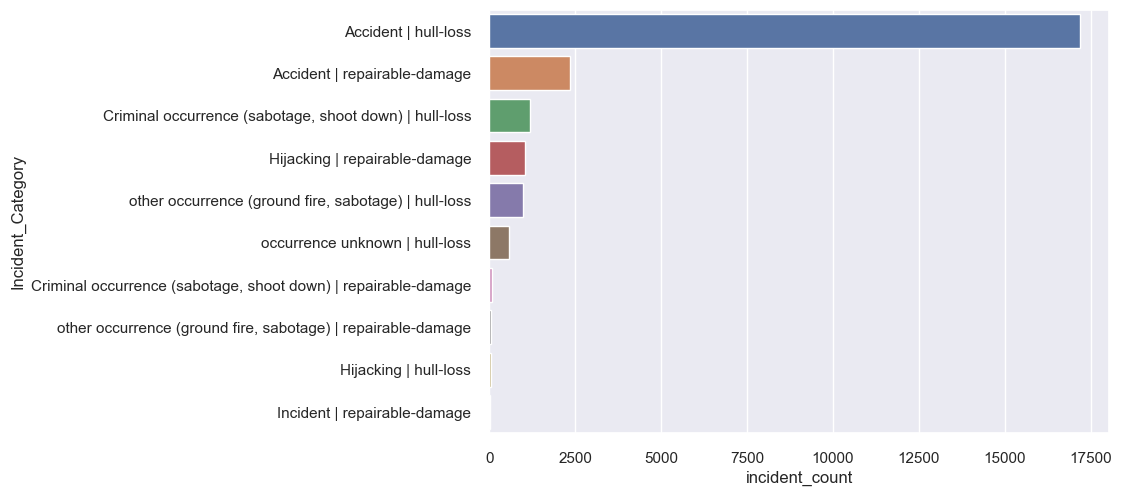

In [64]:
sns.barplot(accidents_by_type, y='Incident_Category', x='incident_count')

<Axes: xlabel='Total Onboard Fatalities', ylabel='Incident_Category'>

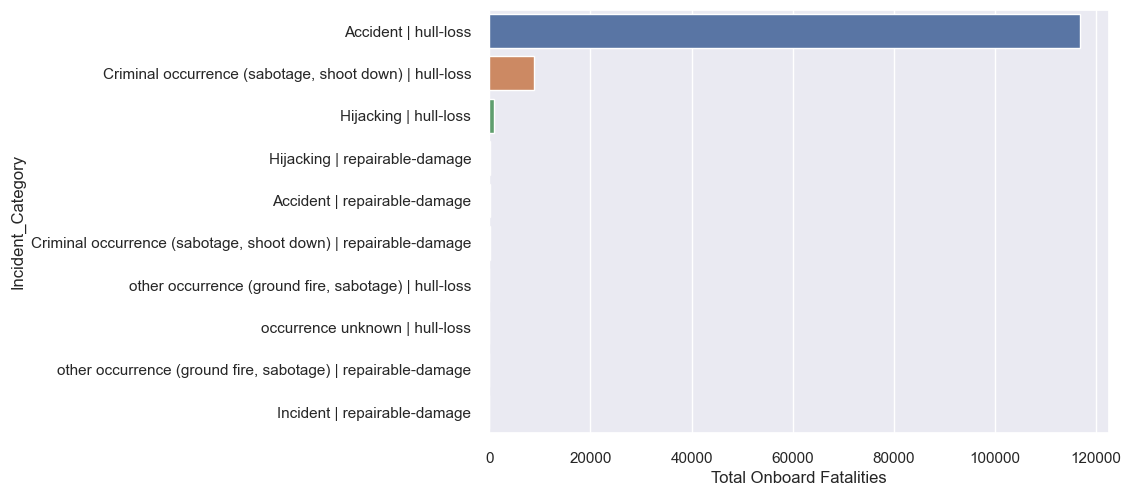

In [65]:
accidents_by_fatalities = accidents_by_type.sort_values(by='Total Onboard Fatalities', ascending=False)
sns.barplot(accidents_by_fatalities, y='Incident_Category', x='Total Onboard Fatalities')

# Pairing down the data set to the 2000s only

In [66]:
air_disaster_2000s = pd.read_csv('../data/Aircraft_Incident_Dataset1.csv')

In [67]:
air_disaster_2000s['Incident_Date'] = pd.to_datetime(air_disaster_2000s['Incident_Date'], format="%m/%d/%Y")
air_disaster_2000s['Year'] = air_disaster_2000s['Incident_Date'].dt.year
air_disaster_2000s = air_disaster_2000s[air_disaster_2000s['Year'] >= 2000]

* Total flights per year

In [68]:
world_flights_2000s = world_flights[world_flights['Year'] >= 2000]

<Axes: xlabel='Year', ylabel='Flights'>

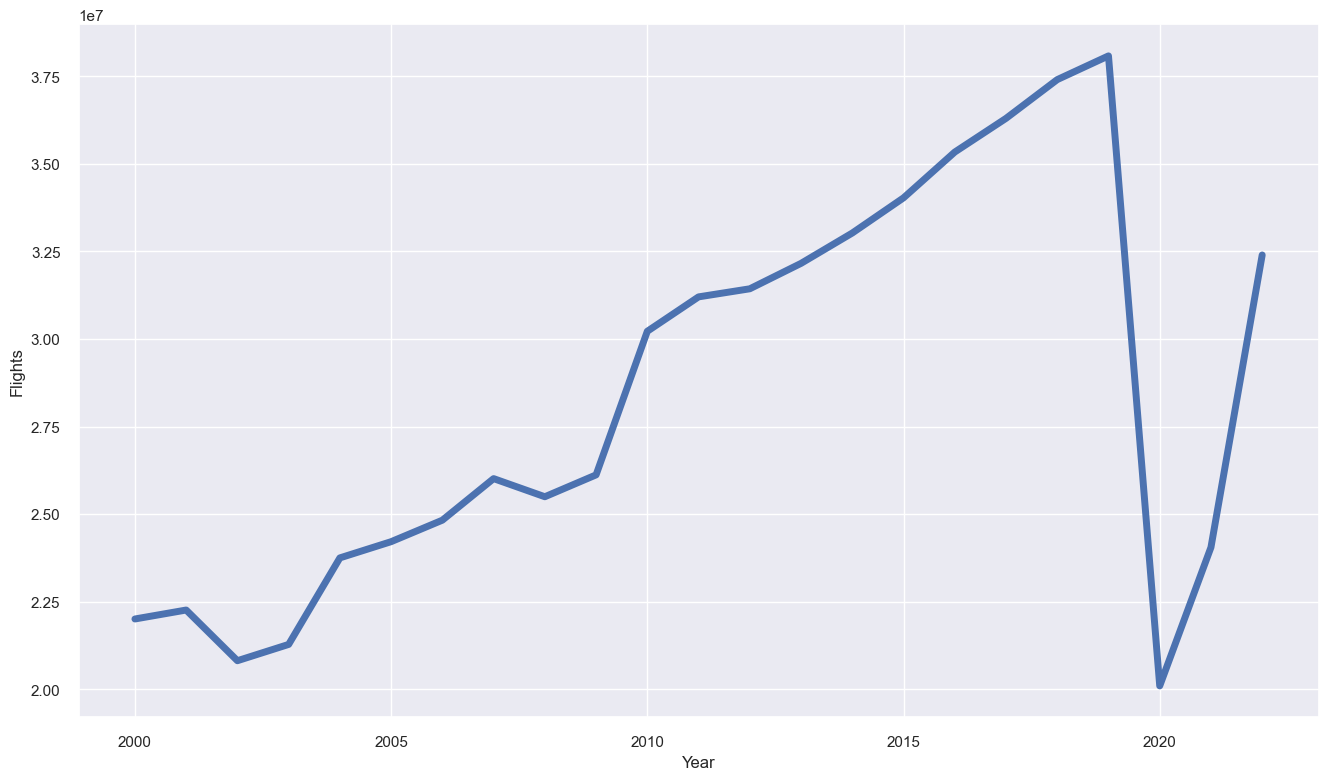

In [69]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(world_flights_2000s, y='Flights', x='Year', linewidth = 5)

* Incidents per year

In [70]:
air_disaster_2000s['incident_count'] = 1
incidents_by_year_2000s = air_disaster_2000s.groupby('Year')['incident_count'].sum().reset_index()


In [71]:
incidents_by_year_2000s

Year  incident_count
0   2000             220
1   2001             227
2   2002             224
3   2003             218
4   2004             208
5   2005             220
6   2006             226
7   2007             223
8   2008             215
9   2009             203
10  2010             189
11  2011             190
12  2012             171
13  2013             208
14  2014             225
15  2015             221
16  2016             207
17  2017             192
18  2018             224
19  2019             237
20  2020             180
21  2021             148
22  2022              12

In [72]:
ave_median_incident = incidents_by_year_2000s['incident_count'].mean()

Text(0.5, 1.0, 'Total Incident Counts\n2000-2022')

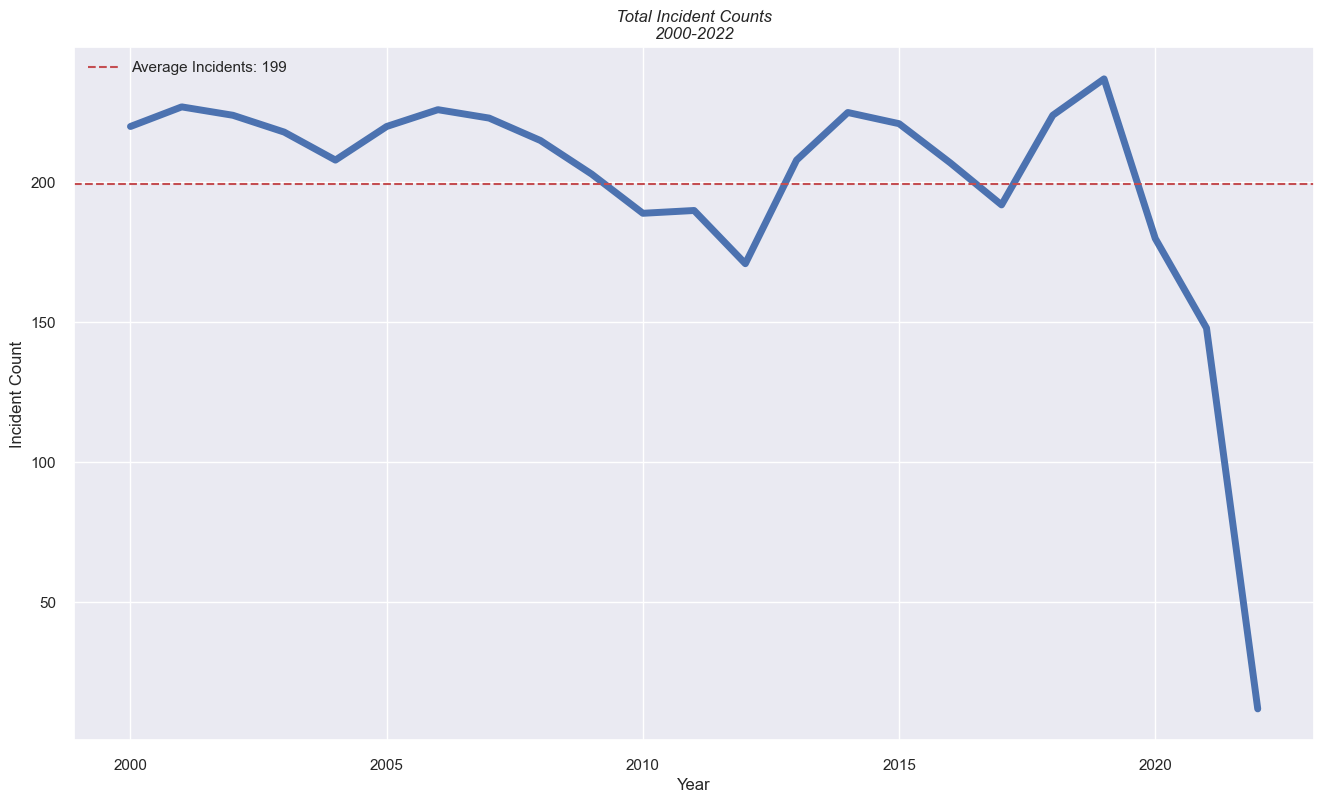

In [73]:


fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year_2000s, y='incident_count', x='Year', color= 'b', linewidth = 5)
ax.axhline(ave_median_incident, color = 'r', label=f'Average Incidents: {ave_median_incident:0.0f}', linestyle='--')
ax.legend()
ax.set_ylabel('Incident Count')
ax.set_title('Total Incident Counts\n2000-2022', style= 'italic')

In [74]:
ave_median_incident = incidents_by_year_2000s['incident_count'].mean()

In [75]:
ave_median_incident

199.47826086956522

Text(0.5, 1.0, 'Total Incident Counts\n2000-2022')

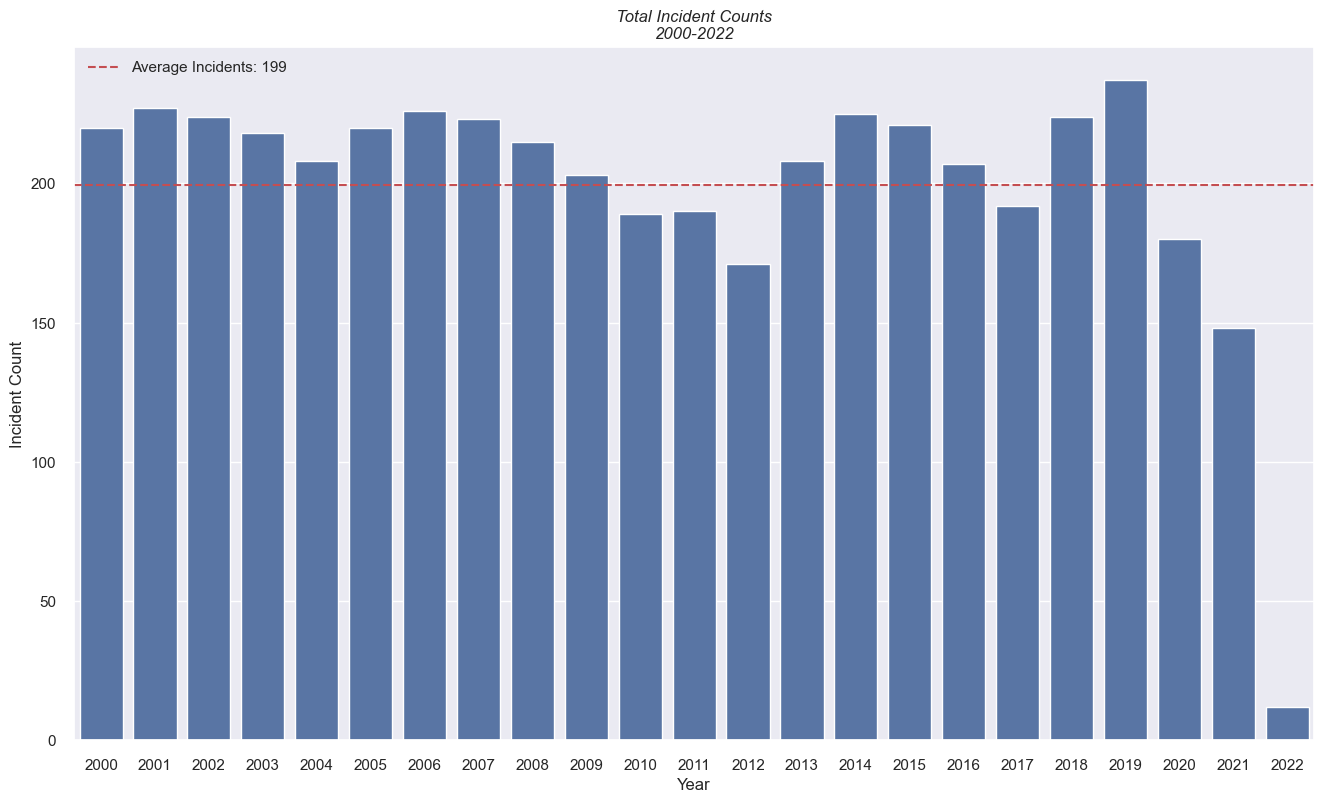

In [76]:

fig, ax = plt.subplots(figsize = (16, 9))
sns.barplot(incidents_by_year_2000s, y='incident_count', x='Year', color= 'b')
ax.axhline(ave_median_incident, color = 'r', label=f'Average Incidents: {ave_median_incident:0.0f}', linestyle='--')
ax.legend()
ax.set_ylabel('Incident Count')
ax.set_title('Total Incident Counts\n2000-2022', style= 'italic')

* percent of incidents per year compared to total flights

In [77]:
#world_flights_2000s=world_flights_2000s.drop(index=54, axis=1)

In [82]:
world_flights_2000s = world_flights_2000s.drop(columns=['index']).reset_index()

In [83]:
incidents_by_year_2000s['Flights'] = world_flights_2000s['Flights']

incidents_by_year_2000s['percent of incidents'] = incidents_by_year_2000s['incident_count']/incidents_by_year_2000s['Flights']

In [84]:
world_flights_2000s


index  Year      Flights
0      30  2000  22008658.00
1      31  2001  22264220.00
2      32  2002  20817389.00
3      33  2003  21282617.00
4      34  2004  23752616.00
5      35  2005  24215712.00
6      36  2006  24829383.00
7      37  2007  26016011.00
8      38  2008  25498093.00
9      39  2009  26122523.00
10     40  2010  30222074.54
11     41  2011  31203707.10
12     42  2012  31434525.59
13     43  2013  32160518.88
14     44  2014  33026724.98
15     45  2015  34030586.00
16     46  2016  35337714.00
17     47  2017  36299460.06
18     48  2018  37405640.25
19     49  2019  38082933.01
20     50  2020  20098778.56
21     51  2021  24054588.85
22     52  2022  32400000.00

In [85]:
incidents_by_year_2000s

Year  incident_count      Flights  percent of incidents
0   2000             220  22008658.00          9.996066e-06
1   2001             227  22264220.00          1.019573e-05
2   2002             224  20817389.00          1.076024e-05
3   2003             218  21282617.00          1.024310e-05
4   2004             208  23752616.00          8.756930e-06
5   2005             220  24215712.00          9.085011e-06
6   2006             226  24829383.00          9.102119e-06
7   2007             223  26016011.00          8.571645e-06
8   2008             215  25498093.00          8.432003e-06
9   2009             203  26122523.00          7.771072e-06
10  2010             189  30222074.54          6.253707e-06
11  2011             190  31203707.10          6.089020e-06
12  2012             171  31434525.59          5.439879e-06
13  2013             208  32160518.88          6.467557e-06
14  2014             225  33026724.98          6.812665e-06
15  2015             221  34030586.00          6.494158e-06
16  2016             207  35337714.00          5.857764e-06
17  2017             192  36299460.06          5.289335e-06
18  2018             224  37405640.25          5.988402e-06
19  2019             237  38082933.01          6.223260e-06
20  2020             180  20098778.56          8.955768e-06
21  2021             148  24054588.85          6.152672e-06
22  2022              12  32400000.00          3.703704e-07

In [86]:
incidents_by_year_2000s = pd.DataFrame(incidents_by_year_2000s)
incidents_by_year_2000s = incidents_by_year_2000s.reset_index()
incidents_by_year_2000s['Flights'] = world_flights_2000s['Flights']
incidents_by_year_2000s = incidents_by_year_2000s.drop(columns='index')
incidents_by_year_2000s['percent of incidents'] = incidents_by_year_2000s['incident_count']/incidents_by_year_2000s['Flights']

Text(0.5, 1.0, 'Incidents as a Percent of Total Flights\n2000-2022')

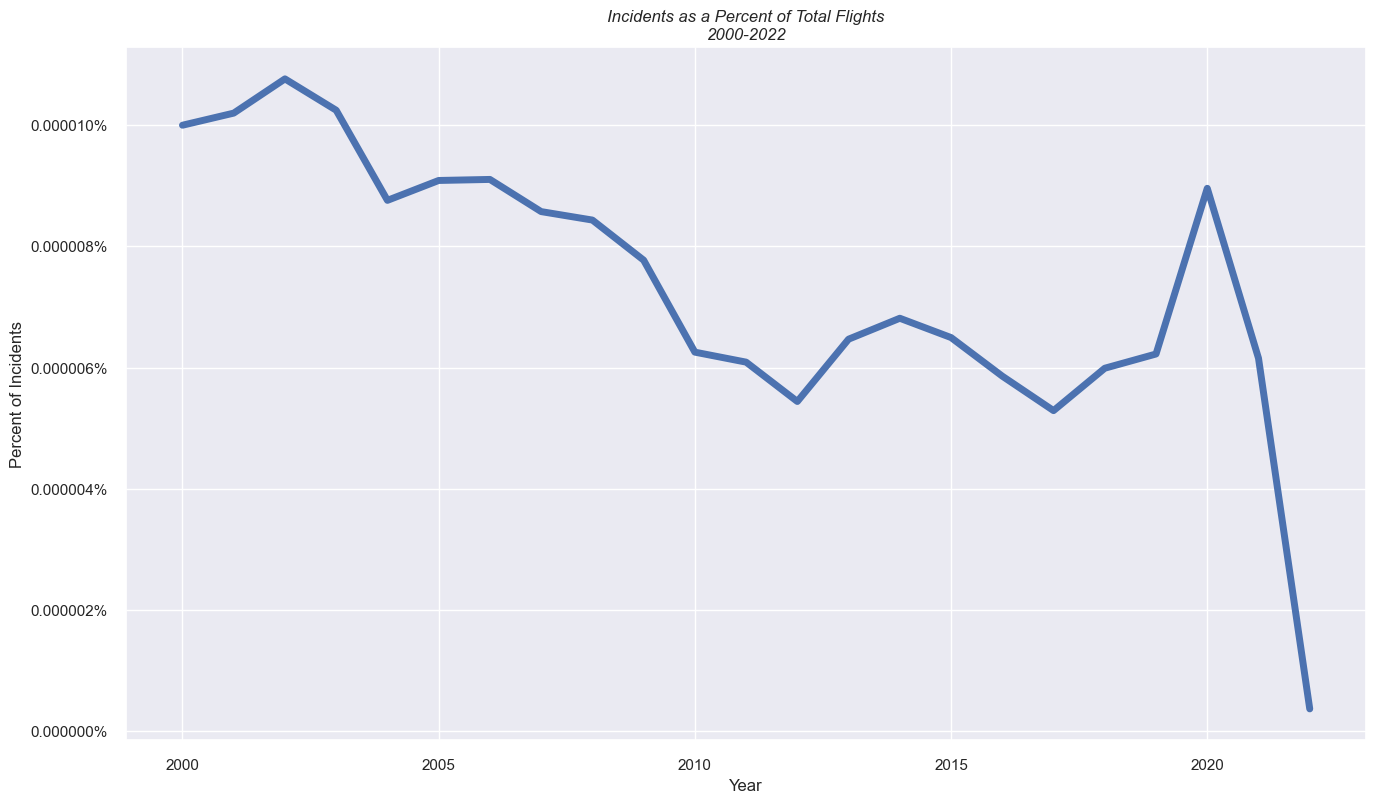

In [87]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize = (16, 9))
sns.lineplot(incidents_by_year_2000s, y='percent of incidents', x='Year', linewidth = 5)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=6))
ax.set_ylabel('Percent of Incidents')
ax.set_title('Incidents as a Percent of Total Flights\n2000-2022', style= 'italic')

* Cleaning data to break strings into number fields

In [88]:
onboard_split = []
for x in air_disaster_2000s['Onboard_Total']:
    onboard_split.append(x.split('/'))

occupants1 = []

for list in onboard_split:
    occupants1.append(list[1])

list_occupants = []

for list in occupants1:
    list_occupants.append(list.split(':'))
    
num_occupants = []

for item in list_occupants:
    num_occupants.append(item[1])

In [89]:
air_disaster_2000s['Total Occupants'] = occupants(air_disaster_2000s, 'Onboard_Total', 1)

In [90]:
air_disaster_2000s['Total Passengers'] = occupants(air_disaster_2000s, 'Onboard_Passengers', 1)
air_disaster_2000s['Total Crew'] = occupants(air_disaster_2000s, 'Onboard_Crew', 1)
air_disaster_2000s['Total Onboard Fatalities'] = occupants(air_disaster_2000s, 'Onboard_Total', 0)
air_disaster_2000s['Total Passenger Fatalities'] = occupants(air_disaster_2000s, 'Onboard_Passengers', 0)
air_disaster_2000s['Total Crew Fatalities'] = occupants(air_disaster_2000s, 'Onboard_Crew', 0)

In [91]:
air_disaster_2000s

Incident_Date                        Aircaft_Model Aircaft_Registration  \
0       2022-01-03  British Aerospace 4121 Jetstream 41               ZS-NRJ   
1       2022-01-04  British Aerospace 3101 Jetstream 31               HR-AYY   
2       2022-01-05                       Boeing 737-4H6               EP-CAP   
3       2022-01-08                  Tupolev Tu-204-100C             RA-64032   
4       2022-01-12        Beechcraft 200 Super King Air                  NaN   
...            ...                                  ...                  ...   
4583    2000-12-23           McDonnell Douglas DC-10-10               N132AA   
4584    2000-12-23        Beechcraft 200 Super King Air               VP-BBK   
4585    2000-12-29  British Aerospace 4101 Jetstream 41               N323UE   
4586    2000-12-29                       Boeing 747-436               G-BNLM   
4587    2000-01-01                      Yakovlev Yak-40             RA-87847   

                                      Aircaft_Operator  \
0                                           SA Airlink   
1                                               LANHSA   
2                                     Caspian Airlines   
3                             Cainiao, opb Aviastar-TU   
4                                              private   
...                                                ...   
4583       American Airlines, op.for Hawaiian Airlines   
4584                             Videovision Broadcast   
4585       United Express, opb Atlantic Coast Airlines   
4586                                   British Airways   
4587  NovgorodAvia, op.for Ecuato Guineana de Aviacion   

                         Aircaft_Nature  \
0      Domestic Non Scheduled Passenger   
1          Domestic Scheduled Passenger   
2          Domestic Scheduled Passenger   
3                                 Cargo   
4                        Illegal Flight   
...                                 ...   
4583  International Scheduled Passenger   
4584   Domestic Non Scheduled Passenger   
4585       Domestic Scheduled Passenger   
4586  International Scheduled Passenger   
4587                            Unknown   

                                      Incident_Category  \
0                          Accident | repairable-damage   
1                          Accident | repairable-damage   
2                          Accident | repairable-damage   
3                                  Accident | hull-loss   
4     Criminal occurrence (sabotage, shoot down) | h...   
...                                                 ...   
4583                       Accident | repairable-damage   
4584                               Accident | hull-loss   
4585                               Accident | hull-loss   
4586                      Hijacking | repairable-damage   
4587  other occurrence (ground fire, sabotage) | hul...   

                                     Incident_Cause(es)     Incident_Location  \
0     Airplane - Engines, Airplane - Engines - Prop/...  near Venetia Mine...   
1     Airplane - Undercarriage, Airplane - Undercarr...       Roatán-Juan ...   
2     Airplane - Undercarriage, Airplane - Undercarr...       Isfahan-Shah...   
3     Cargo - Fire/smoke, Result - Damaged on the gr...       Hangzhou-Xia...   
4                        Result - Damaged on the ground       Machakilha, ...   
...                                                 ...                   ...   
4583                          Result - Runway excursion       Papeete-Faaa...   
4584                           Result - Loss of control  near Blackbushe A...   
4585                          Result - Runway excursion       Charlottesvi...   
4586  Result - Hijacking - Hijacker(s) overpowered b...       Nairobi-Jomo...   
4587                     Result - Damaged on the ground       Malabo-Santa...   

        Aircaft_Damage_Type                       Date  ... Ground_Casualties  \
0               Substantial      Monday 3 January 2022  ...        

* breaking down incidents by phase

Text(0.5, 1.0, 'Total Incidents by Aircraft Phase\n2000-2022')

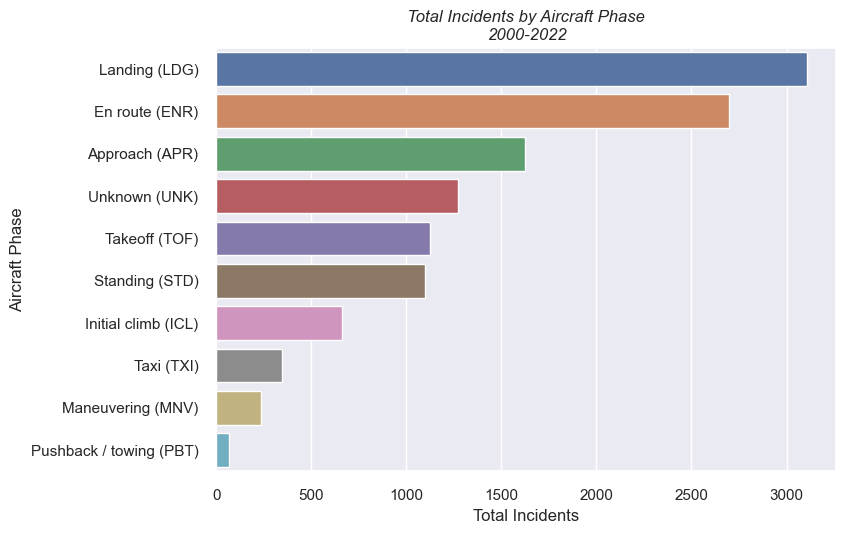

In [92]:
incidents_by_phase_2000s = pd.DataFrame(air_disaster_2000s['Aircraft_Phase'].value_counts()).reset_index()

fig, ax = plt.subplots()
sns.barplot(incidents_by_phase, y='Aircraft_Phase', x='count')
ax.set_ylabel('Aircraft Phase')
ax.set_xlabel('Total Incidents')
ax.set_title('Total Incidents by Aircraft Phase\n2000-2022', style= 'italic')
#ax.set_title('Total Incident Counts\n2000-2022', style= 'italic')

<Axes: xlabel='Percent of total', ylabel='Aircraft_Phase'>

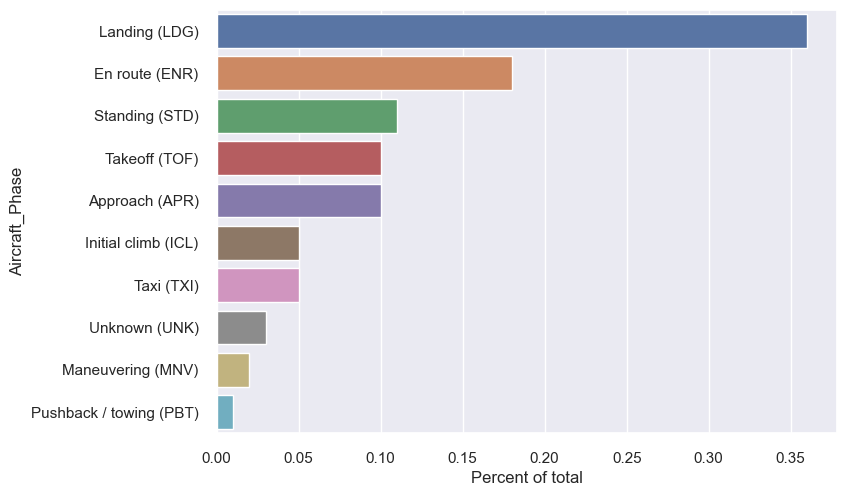

In [93]:
percent =  []

for count in incidents_by_phase_2000s['count']:
    percent.append(f"{(count / (incidents_by_phase_2000s['count'].sum())):.2f}")

incidents_by_phase_2000s['Percent of total'] = percent
incidents_by_phase_2000s['Percent of total'] = incidents_by_phase_2000s['Percent of total'].astype(float)

sns.barplot(incidents_by_phase_2000s, y='Aircraft_Phase', x='Percent of total')

* Breaking down by type of incident

In [94]:
accidents_by_type_2000s = air_disaster_2000s[['Year', 'incident_count', 'Incident_Category', 'Total Onboard Fatalities']]
accidents_by_type_2000s= accidents_by_type_2000s.groupby('Incident_Category').sum().reset_index()
accidents_by_type_2000s= accidents_by_type_2000s.sort_values(by='incident_count', ascending=False)

<Axes: xlabel='incident_count', ylabel='Incident_Category'>

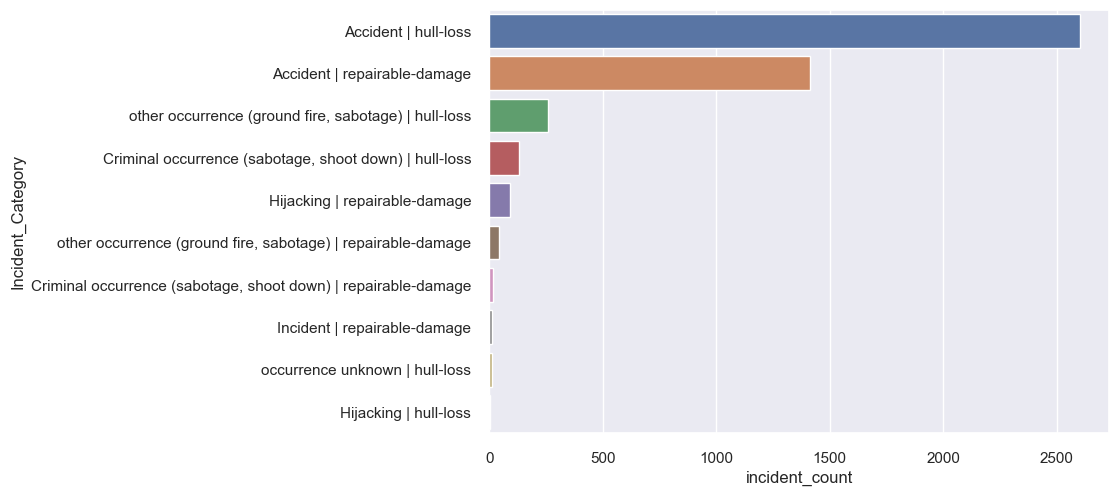

In [95]:
sns.barplot(accidents_by_type_2000s, y='Incident_Category', x='incident_count')

Text(0.5, 1.0, 'Top Incident Categories by Occupant Fatalities\n2000-2022')

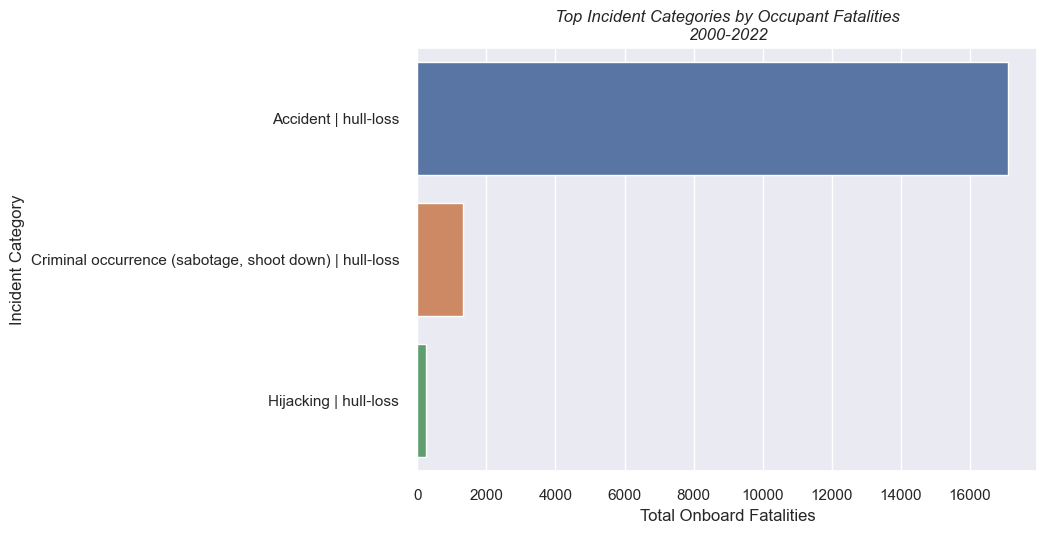

In [281]:
accidents_by_fatalities_2000s = accidents_by_type_2000s[accidents_by_type_2000s['Total Onboard Fatalities'] >50]
accidents_by_fatalities_2000s = accidents_by_fatalities_2000s.sort_values(by='Total Onboard Fatalities', ascending=False)
fig, ax = plt.subplots()
sns.barplot(accidents_by_fatalities_2000s, y='Incident_Category', x='Total Onboard Fatalities')
ax.set_ylabel('Incident Category')
ax.set_title('Top Incident Categories by Occupant Fatalities\n2000-2022', style= 'italic')

In [97]:
air_disaster_2000s

Incident_Date                        Aircaft_Model Aircaft_Registration  \
0       2022-01-03  British Aerospace 4121 Jetstream 41               ZS-NRJ   
1       2022-01-04  British Aerospace 3101 Jetstream 31               HR-AYY   
2       2022-01-05                       Boeing 737-4H6               EP-CAP   
3       2022-01-08                  Tupolev Tu-204-100C             RA-64032   
4       2022-01-12        Beechcraft 200 Super King Air                  NaN   
...            ...                                  ...                  ...   
4583    2000-12-23           McDonnell Douglas DC-10-10               N132AA   
4584    2000-12-23        Beechcraft 200 Super King Air               VP-BBK   
4585    2000-12-29  British Aerospace 4101 Jetstream 41               N323UE   
4586    2000-12-29                       Boeing 747-436               G-BNLM   
4587    2000-01-01                      Yakovlev Yak-40             RA-87847   

                                      Aircaft_Operator  \
0                                           SA Airlink   
1                                               LANHSA   
2                                     Caspian Airlines   
3                             Cainiao, opb Aviastar-TU   
4                                              private   
...                                                ...   
4583       American Airlines, op.for Hawaiian Airlines   
4584                             Videovision Broadcast   
4585       United Express, opb Atlantic Coast Airlines   
4586                                   British Airways   
4587  NovgorodAvia, op.for Ecuato Guineana de Aviacion   

                         Aircaft_Nature  \
0      Domestic Non Scheduled Passenger   
1          Domestic Scheduled Passenger   
2          Domestic Scheduled Passenger   
3                                 Cargo   
4                        Illegal Flight   
...                                 ...   
4583  International Scheduled Passenger   
4584   Domestic Non Scheduled Passenger   
4585       Domestic Scheduled Passenger   
4586  International Scheduled Passenger   
4587                            Unknown   

                                      Incident_Category  \
0                          Accident | repairable-damage   
1                          Accident | repairable-damage   
2                          Accident | repairable-damage   
3                                  Accident | hull-loss   
4     Criminal occurrence (sabotage, shoot down) | h...   
...                                                 ...   
4583                       Accident | repairable-damage   
4584                               Accident | hull-loss   
4585                               Accident | hull-loss   
4586                      Hijacking | repairable-damage   
4587  other occurrence (ground fire, sabotage) | hul...   

                                     Incident_Cause(es)     Incident_Location  \
0     Airplane - Engines, Airplane - Engines - Prop/...  near Venetia Mine...   
1     Airplane - Undercarriage, Airplane - Undercarr...       Roatán-Juan ...   
2     Airplane - Undercarriage, Airplane - Undercarr...       Isfahan-Shah...   
3     Cargo - Fire/smoke, Result - Damaged on the gr...       Hangzhou-Xia...   
4                        Result - Damaged on the ground       Machakilha, ...   
...                                                 ...                   ...   
4583                          Result - Runway excursion       Papeete-Faaa...   
4584                           Result - Loss of control  near Blackbushe A...   
4585                          Result - Runway excursion       Charlottesvi...   
4586  Result - Hijacking - Hijacker(s) overpowered b...       Nairobi-Jomo...   
4587                     Result - Damaged on the ground       Malabo-Santa...   

        Aircaft_Damage_Type                       Date  ... Ground_Casualties  \
0               Substantial      Monday 3 January 2022  ...        

In [98]:
air_disaster_2000s['Total Occupants'] = air_disaster_2000s['Total Occupants'].astype(int)

In [103]:
non_fatal_incidents = air_disaster_2000s[air_disaster_2000s['Total Onboard Fatalities']==0].shape[0]

In [265]:
fatal_incidents = onboard_fatalities_greater_0.shape[0]

In [266]:
percent_of_incidents_fatal = fatal_incidents / (fatal_incidents+non_fatal_incidents)
percent_of_incidents_non_fatal = non_fatal_incidents / (fatal_incidents+non_fatal_incidents)
print(f'Percent of non-fatal incidents is: {percent_of_incidents_non_fatal:.1%}')
print(f'Percent of fatal incidents is: {percent_of_incidents_fatal:.1%}')

Percent of non-fatal incidents is: 73.6%
Percent of fatal incidents is: 26.4%


# Percent of non-fatal incidents is: 73.6%
# Percent of fatal incidents is: 26.4%

In [106]:
onboard_fatalities_greater_0['compare'] = (onboard_fatalities_greater_0['Total Occupants'] == onboard_fatalities_greater_0['Total Onboard Fatalities'])

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_713/4168687942.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onboard_fatalities_greater_0['compare'] = (onboard_fatalities_greater_0['Total Occupants'] == onboard_fatalities_greater_0['Total Onboard Fatalities'])


In [267]:
total_occupant_loss = onboard_fatalities_greater_0['compare'].value_counts()[0]
not_total_occupant_loss = onboard_fatalities_greater_0['compare'].value_counts()[1]
percent_of_total_loss = total_occupant_loss / (total_occupant_loss+not_total_occupant_loss)
percent_of_non_total_loss = not_total_occupant_loss / (total_occupant_loss+not_total_occupant_loss)
print(f'Percent of fatal incidents where some occupants survived: {percent_of_non_total_loss:.1%}')
print(f'Percent of fatal incidents where all occupants were lost: {percent_of_total_loss:.1%}')

Percent of fatal incidents where some occupants survived: 32.7%
Percent of fatal incidents where all occupants were lost: 67.3%


# Percent of fatal incidents where some occupants survived: 32.7%
# Percent of fatal incidents where all occupants were lost: 67.3%

In [108]:
occupant_loss = np.asarray([total_occupant_loss, not_total_occupant_loss])

In [109]:
occupant_loss = pd.DataFrame(occupant_loss)
occupant_loss['incidents'] = ['No Survivors', 'Some Survivors']
occupant_loss.columns = ['Number of Incidents', 'Fatal Incidents']
occupant_loss

Number of Incidents Fatal Incidents
0                  815    No Survivors
1                  396  Some Survivors

In [110]:
some_survivors = occupant_loss[occupant_loss['Fatal Incidents']=='Some Survivors']
no_survivors = occupant_loss[occupant_loss['Fatal Incidents']=='No Survivors']
occupant_loss = occupant_loss.set_index('Fatal Incidents')

In [111]:
reset = occupant_loss.reset_index()
reset['Number of Incidents']

0    815
1    396
Name: Number of Incidents, dtype: int64

Text(0, 0.5, 'Incidents')

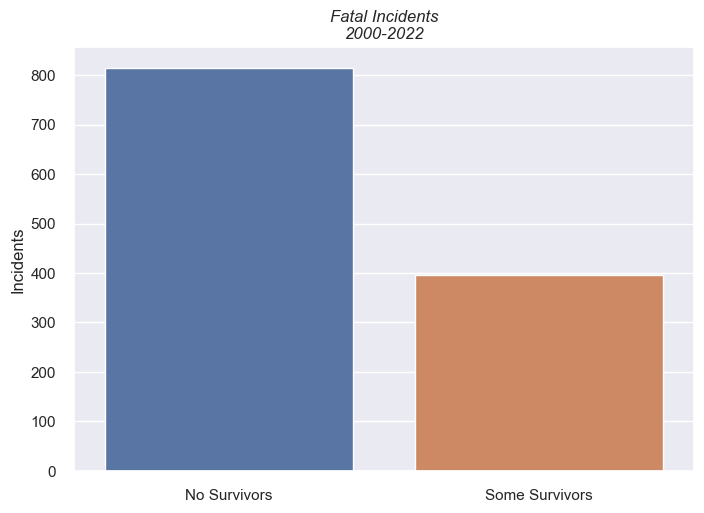

In [288]:
fig, ax = plt.subplots()
hbars = sns.barplot(occupant_loss, y='Number of Incidents', x=occupant_loss.index)
#ax.bar_label(p, fmt='%.2f%%', label_type='edge')
ax.set_xlabel('')
ax.set_title('Fatal Incidents\n2000-2022', style= 'italic')
ax.set_ylabel('Incidents')





In [ ]:
occupant_loss['percent'] = [percent_of_total_loss, percent_of_non_total_loss]
occupant_loss

Number of Incidents   percent
Fatal Incidents                               
No Survivors                     815  0.672998
Some Survivors                   396  0.327002

In [ ]:
'''colors = ['#5cb85c', '#5bc0de']

# plot with annotations is probably easier
p1 = occupant_loss.plot(kind='bar', color=colors, figsize=(20, 8), rot=0, ylabel='Percentage', title="The percentage of the respondents' interest in the different data science Area")

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f%%', label_type='edge')'''

'colors = [\'#5cb85c\', \'#5bc0de\']\n\n# plot with annotations is probably easier\np1 = occupant_loss.plot(kind=\'bar\', color=colors, figsize=(20, 8), rot=0, ylabel=\'Percentage\', title="The percentage of the respondents\' interest in the different data science Area")\n\nfor p in p1.containers:\n    p1.bar_label(p, fmt=\'%.1f%%\', label_type=\'edge\')'

In [116]:
overall_incidents = np.asarray([fatal_incidents, non_fatal_incidents])
overall_incidents = pd.DataFrame(overall_incidents)
overall_incidents['incidents'] = ['Fatal', 'Non Fatal']
overall_incidents.columns = ['Number of Incidents', 'Incidents']
overall_incidents

Number of Incidents  Incidents
0                 1211      Fatal
1                 3377  Non Fatal

Text(0, 0.5, 'Incidents')

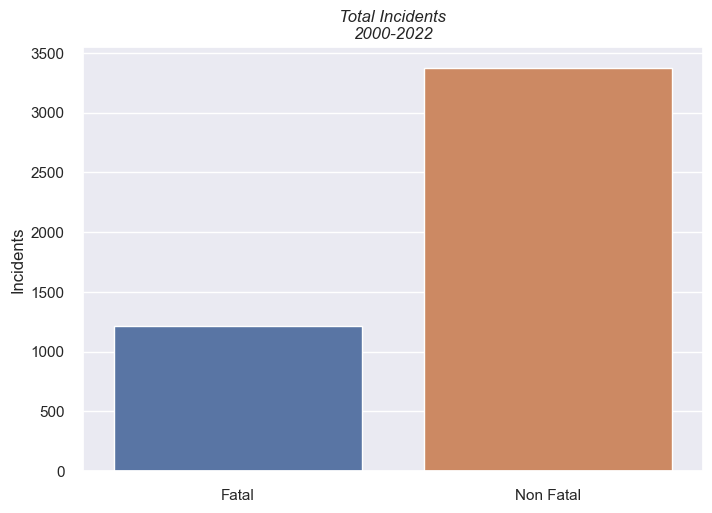

In [289]:
fig, ax = plt.subplots()
sns.barplot(overall_incidents, y='Number of Incidents', x='Incidents')
ax.set_xlabel('')
ax.set_title('Total Incidents\n2000-2022', style= 'italic')
ax.set_ylabel('Incidents')

In [118]:
fatal_incidents_cleaned = onboard_fatalities_greater_0.drop(columns=['Incident_Location', 'Date', 'Collision_Casualties', 'Aircaft_Registration', 'Arit', 'Time'
                                                                     ,'Onboard_Crew', 'Onboard_Passengers', 'Onboard_Total', 'Fatalities', 'Ground_Casualties'
                                                                     ,'Aircaft_First_Flight', 'Destination_Airport', 'Departure_Airport'])

In [119]:
incidents_cleaned = air_disaster_2000s.drop(columns=['Incident_Location', 'Date', 'Collision_Casualties', 'Aircaft_Registration', 'Arit', 'Time'
                                                                     ,'Onboard_Crew', 'Onboard_Passengers', 'Onboard_Total', 'Fatalities', 'Ground_Casualties'
                                                                     ,'Aircaft_First_Flight', 'Destination_Airport', 'Departure_Airport'])

In [120]:
fatal_incidents_cleaned

Incident_Date                   Aircaft_Model       Aircaft_Operator  \
9       2022-02-11                   Antonov An-2R     Kamchatsky Krechet   
14      2021-01-09             Boeing 737-524 (WL)          Sriwijaya Air   
15      2021-01-09           Cessna 560 Citation V       SX Transport LLC   
16      2021-01-12                  Harbin Y-12-II              Kenyan AF   
25      2021-01-01                    Antonov An-2                  KPAAF   
...            ...                             ...                    ...   
4572    2000-12-01                   Antonov An-24                Unknown   
4576    2000-12-11  Embraer EMB-110P1K Bandeirante            Gabonese AF   
4580    2000-12-20    Curtiss C-46A-45-CU Commando        Everts Air Fuel   
4582    2000-12-22  Beechcraft B200 Super King Air   Mountain Air Service   
4584    2000-12-23   Beechcraft 200 Super King Air  Videovision Broadcast   

                        Aircaft_Nature              Incident_Category  \
9                                Cargo           Accident | hull-loss   
14        Domestic Scheduled Passenger           Accident | hull-loss   
15                             Unknown           Accident | hull-loss   
16                            Military           Accident | hull-loss   
25                            Military           Accident | hull-loss   
...                                ...                            ...   
4572                           Unknown  Hijacking | repairable-damage   
4576                          Military           Accident | hull-loss   
4580                             Cargo           Accident | hull-loss   
4582                           Private           Accident | hull-loss   
4584  Domestic Non Scheduled Passenger           Accident | hull-loss   

                                     Incident_Cause(es)  \
9                                      Info-Unavailable   
14                             Result - Loss of control   
15    Result - Loss of control, Result - Loss of con...   
16                                     Info-Unavailable   
25                             Result - Loss of control   
...                                                 ...   
4572  Result - Hijacking - Hijacker(s) overpowered b...   
4576                                  Unknown - Missing   
4580  ATC & navigation - VFR flight in IMC, Result -...   
4582                     Result - CFIT - Hill, mountain   
4584                           Result - Loss of control   

        Aircaft_Damage_Type                  Aircaft_Engines  \
9                 Destroyed                              NaN   
14                Destroyed                 2 CFMI CFM56-3B1   
15                Destroyed  2 Pratt Whitney Canada JT15D-5A   
16    Damaged beyond repair                              NaN   
25    Damaged beyond repair                              NaN   
...                     ...                              ...   
4572                  Minor                              NaN   
4576                Missing   2 Pratt Whitney Canada PT6A-34   
4580              Destroyed           2 Pratt Whitney R-2800   
4582  Damaged beyond repair   2 Pratt Whitney Canada PT6A-42   
4584  Damaged beyond repair   2 Pratt Whitney Canada PT6A-42   

           Aircraft_Phase  Year  incident_count  Total Occupants  \
9     Initial climb (ICL)  2022               1                2   
14         En route (ENR)  2021               1               62   
15         En route (ENR)  2021               1                1   
16          Unknown (UNK)  2021               1                4   
25    Initial climb (ICL)  2021               1                5   
...                   ...   ...             ...              ...   
4572       En route (ENR)  2000               1               17   
4576        Unknown (UNK)  2000               1                3   
4580       En route (ENR)  2000               1                2   
4582       Approach (APR)  2000              

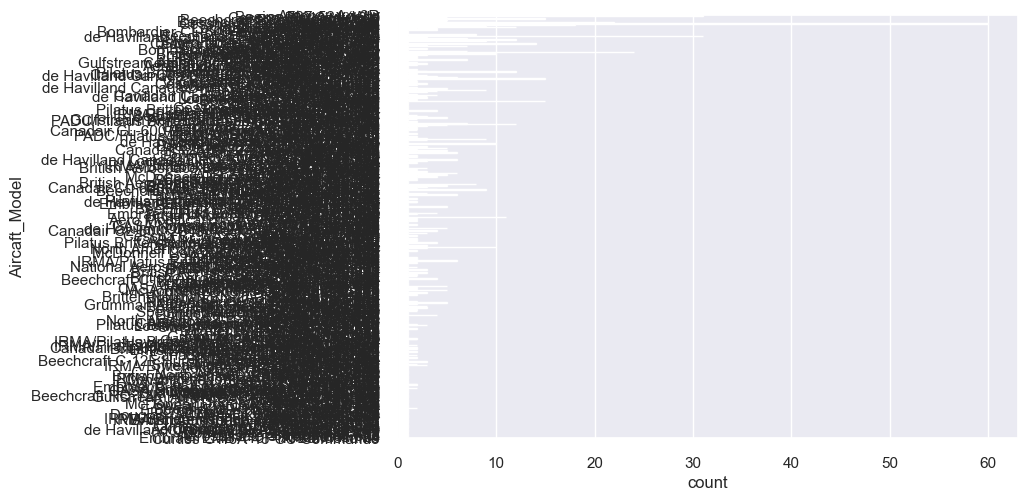

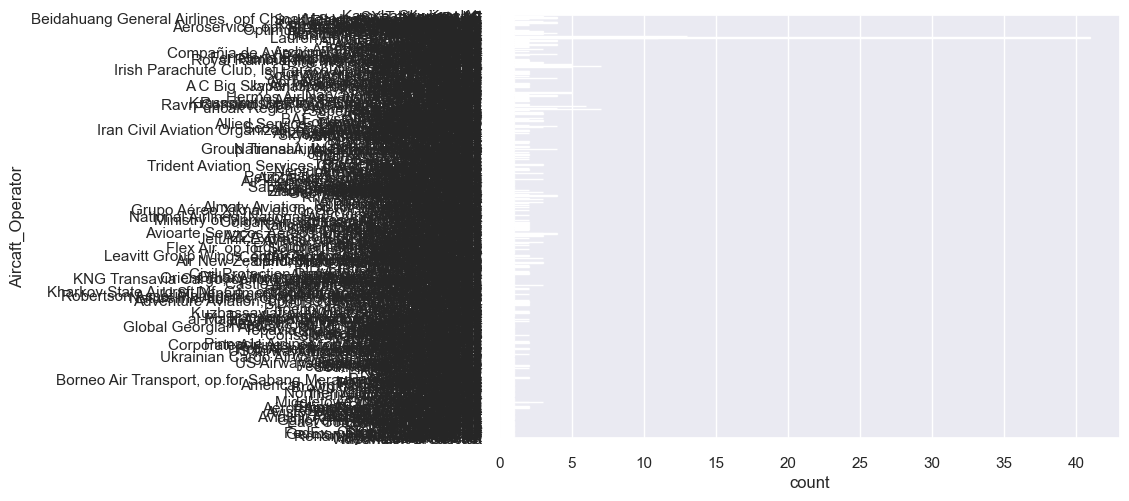

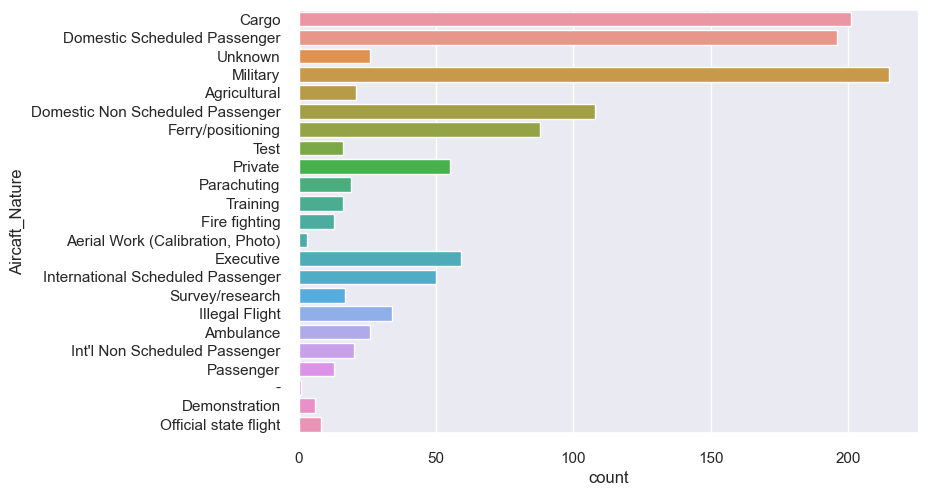

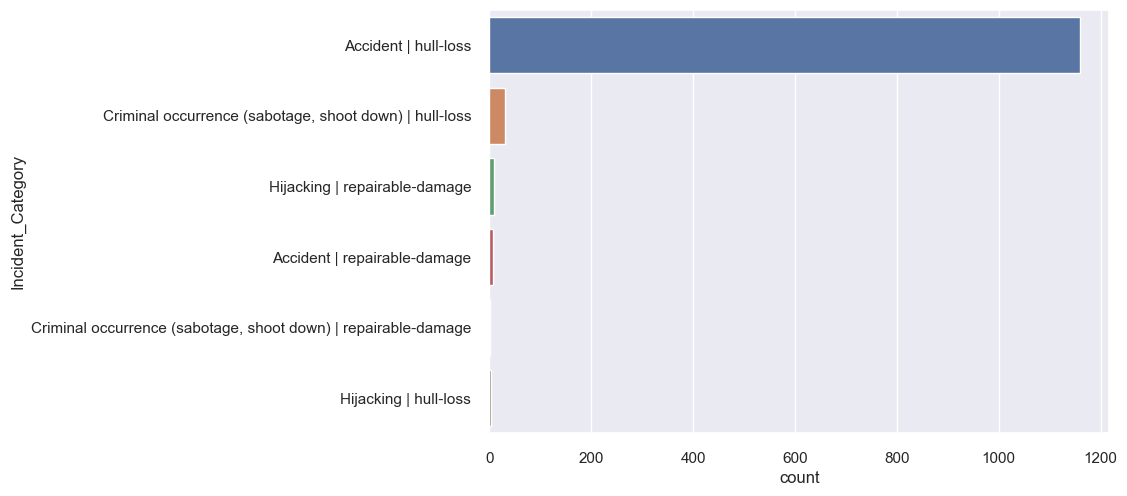

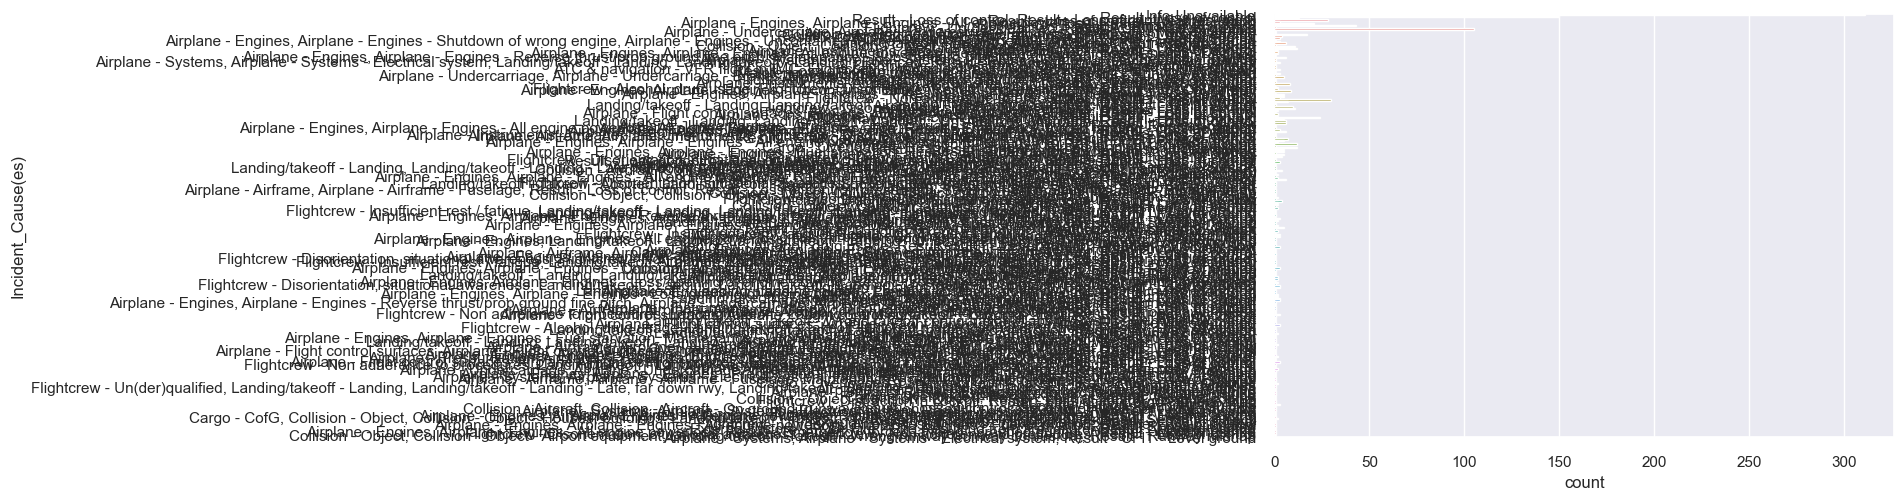

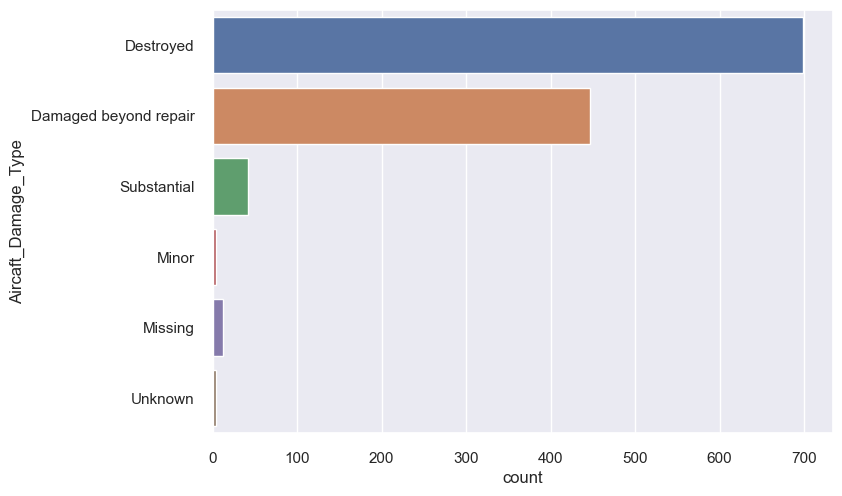

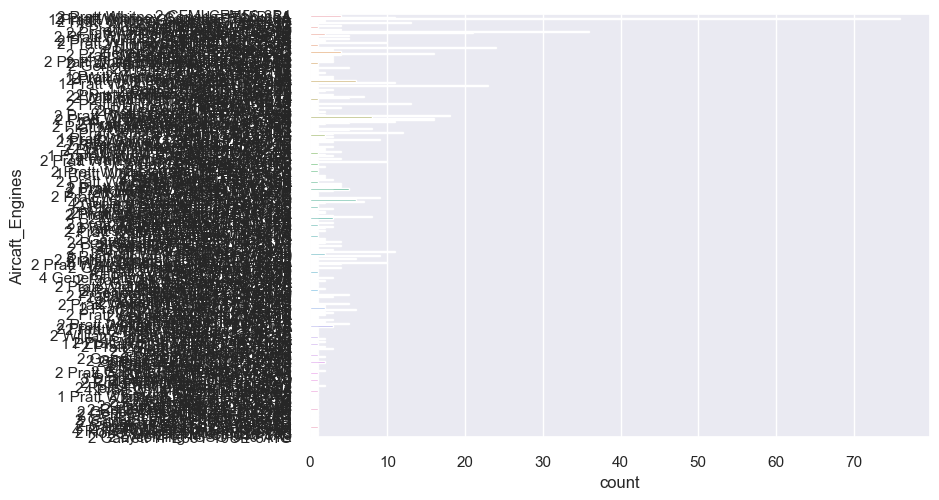

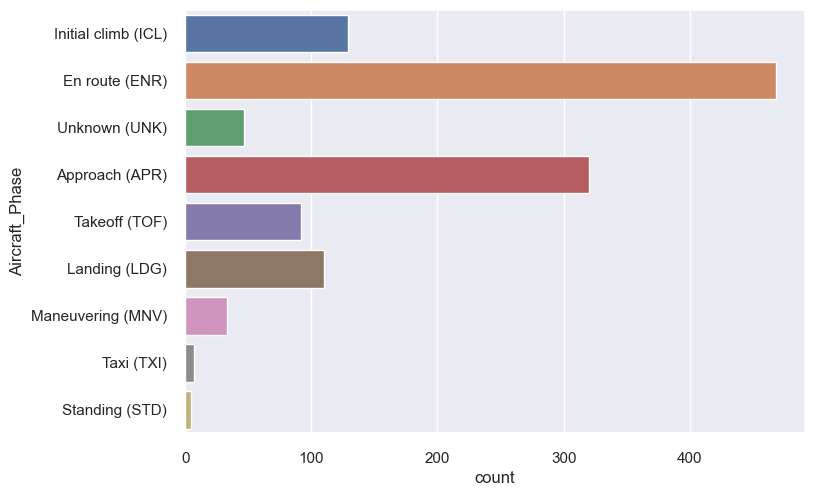

In [122]:
for column in fatal_incidents_cleaned.select_dtypes(include='object'):
    if fatal_incidents_cleaned[column].nunique() > 1:
        sns.countplot(y=column, data=fatal_incidents_cleaned)
        plt.show()

In [123]:
fatal_incidents_cleaned['Aircaft_Model'].value_counts()

Aircaft_Model
Cessna 208B Grand Caravan                   60
de Havilland Canada DHC-6 Twin Otter 300    31
Antonov An-2R                               31
Beechcraft 200 Super King Air               24
Antonov An-26                               22
                                            ..
Curtiss C-46F-1-CU Commando                  1
Boeing 737-236A                              1
ATR 72-201                                   1
Beechcraft B300 Super King Air 350           1
Curtiss C-46A-45-CU Commando                 1
Name: count, Length: 510, dtype: int64

In [124]:
air_disaster_2000s['Aircaft_Model'].value_counts().head(20)

Aircaft_Model
Cessna 208B Grand Caravan                   210
Antonov An-2R                               112
de Havilland Canada DHC-6 Twin Otter 300    100
Beechcraft 200 Super King Air                83
Cessna 208 Caravan I                         52
Antonov An-2                                 47
Learjet 35A                                  47
Swearingen SA227-AC Metro III                45
Antonov An-26                                43
Beechcraft B200 Super King Air               40
Cessna 208B Super Cargomaster                38
Let L-410UVP                                 35
Beechcraft A100 King Air                     33
Antonov An-2T                                33
de Havilland Canada DHC-8-402Q Dash 8        31
Ilyushin Il-76TD                             31
Fokker 100                                   30
Antonov An-12BP                              29
Beechcraft B200 King Air                     29
Beechcraft 1900D                             28
Name: count, dtype: int64

In [125]:
Cessna_208B_Grand_Caravan = fatal_incidents_cleaned[fatal_incidents_cleaned['Aircaft_Model'] == 'Cessna 208B Grand Caravan']
de_Havilland_Canada_DHC6 = fatal_incidents_cleaned[fatal_incidents_cleaned['Aircaft_Model'] == 'de Havilland Canada DHC-6 Twin Otter 300']

array([[<Axes: title={'center': 'Incident_Date'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'incident_count'}>],
       [<Axes: title={'center': 'Total Occupants'}>,
        <Axes: title={'center': 'Total Passengers'}>,
        <Axes: title={'center': 'Total Crew'}>],
       [<Axes: title={'center': 'Total Onboard Fatalities'}>,
        <Axes: title={'center': 'Total Passenger Fatalities'}>,
        <Axes: title={'center': 'Total Crew Fatalities'}>]], dtype=object)

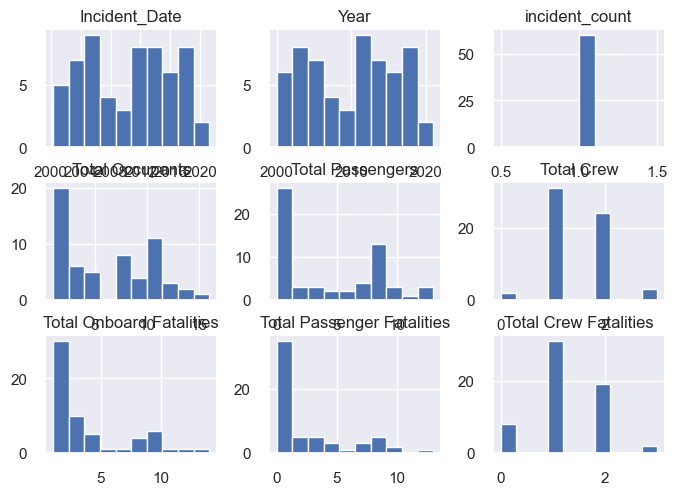

In [126]:
Cessna_208B_Grand_Caravan.hist()

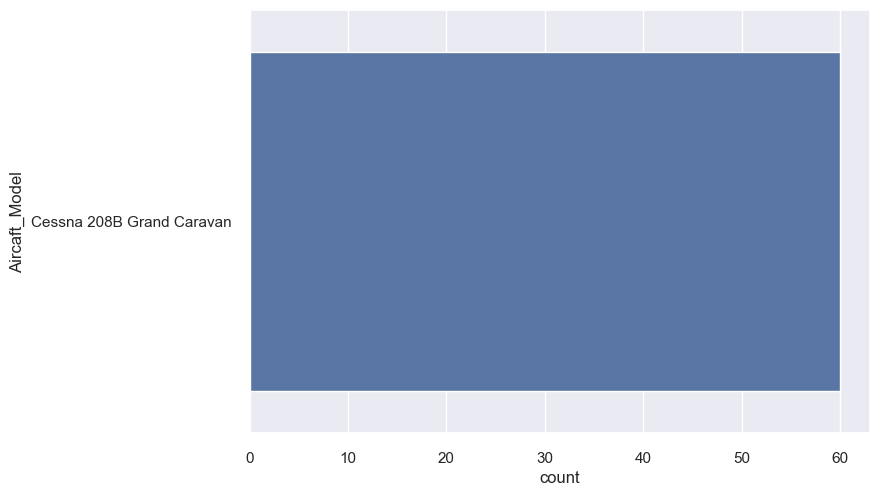

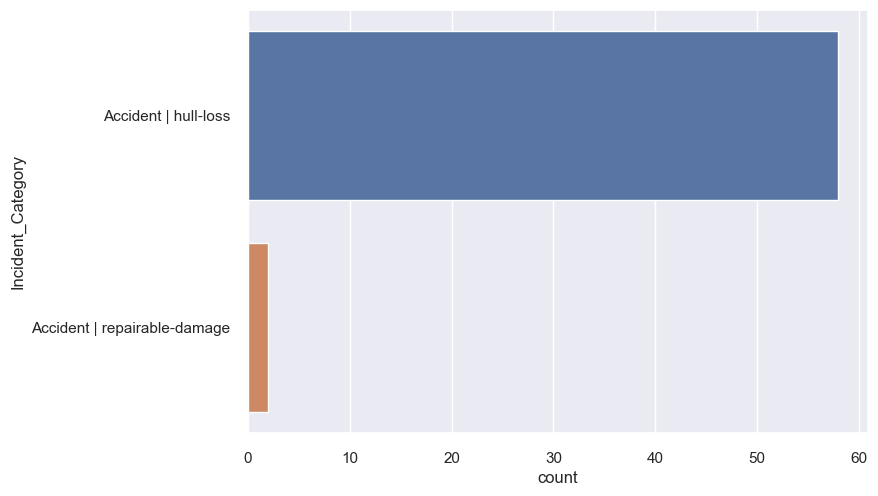

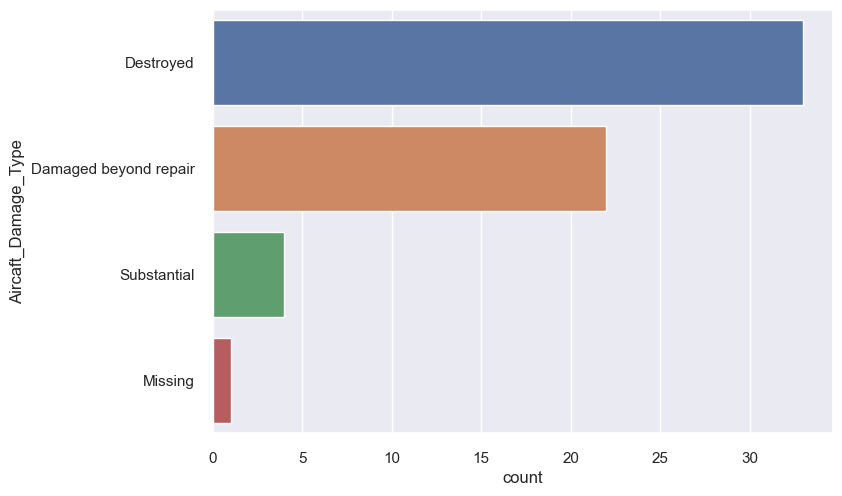

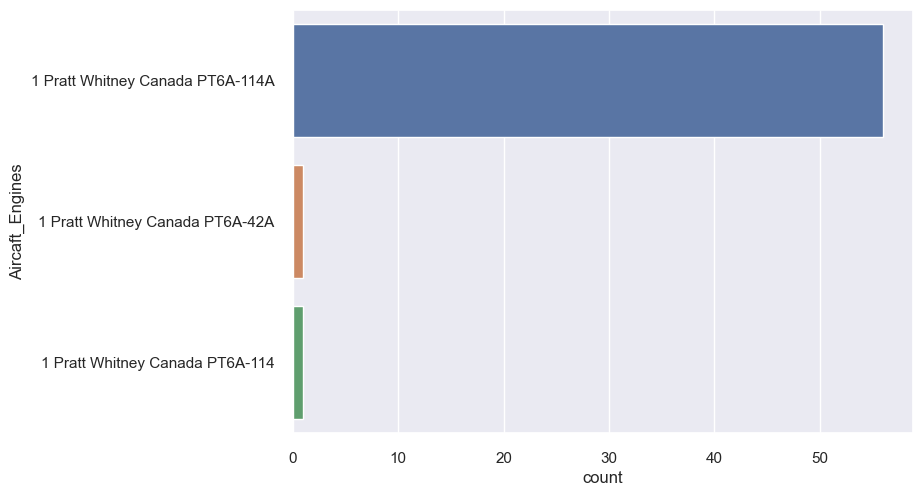

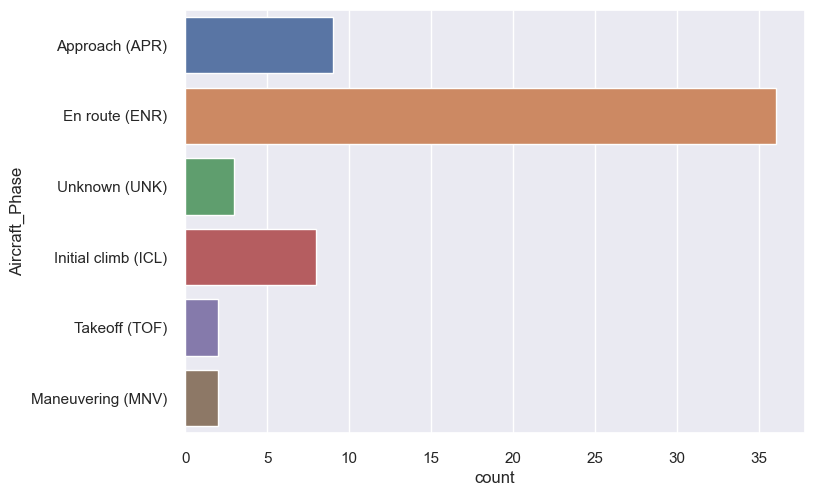

In [127]:
for column in Cessna_208B_Grand_Caravan.select_dtypes(include='object'):
    if Cessna_208B_Grand_Caravan[column].nunique() < 10:
        sns.countplot(y=column, data=Cessna_208B_Grand_Caravan)
        plt.show()

In [128]:
Cessna_208B_Grand_Caravan['compare'].value_counts()

compare
True     40
False    20
Name: count, dtype: int64

In [129]:
de_Havilland_Canada_DHC6['compare'].value_counts()

compare
True     22
False     9
Name: count, dtype: int64

In [130]:
Cessna_208B_Grand_Caravan.head(0)

Empty DataFrame
Columns: [Incident_Date, Aircaft_Model, Aircaft_Operator, Aircaft_Nature, Incident_Category, Incident_Cause(es), Aircaft_Damage_Type, Aircaft_Engines, Aircraft_Phase, Year, incident_count, Total Occupants, Total Passengers, Total Crew, Total Onboard Fatalities, Total Passenger Fatalities, Total Crew Fatalities, compare]
Index: []

In [131]:
Cessna_208B_Grand_Caravan.groupby('compare').agg({'Total Occupants': 'sum', 'Total Onboard Fatalities': 'sum'})

Total Occupants  Total Onboard Fatalities
compare                                           
False                176                        50
True                 186                       186

In [132]:
de_Havilland_Canada_DHC6.groupby('compare').agg({'Total Occupants': 'sum', 'Total Onboard Fatalities': 'sum'})

Total Occupants  Total Onboard Fatalities
compare                                           
False                107                        50
True                 231                       231

In [133]:
incidents_cleaned.head()

Incident_Date                        Aircaft_Model  \
0    2022-01-03  British Aerospace 4121 Jetstream 41   
1    2022-01-04  British Aerospace 3101 Jetstream 31   
2    2022-01-05                       Boeing 737-4H6   
3    2022-01-08                  Tupolev Tu-204-100C   
4    2022-01-12        Beechcraft 200 Super King Air   

           Aircaft_Operator                    Aircaft_Nature  \
0                SA Airlink  Domestic Non Scheduled Passenger   
1                    LANHSA      Domestic Scheduled Passenger   
2          Caspian Airlines      Domestic Scheduled Passenger   
3  Cainiao, opb Aviastar-TU                             Cargo   
4                   private                    Illegal Flight   

                                   Incident_Category  \
0                       Accident | repairable-damage   
1                       Accident | repairable-damage   
2                       Accident | repairable-damage   
3                               Accident | hull-loss   
4  Criminal occurrence (sabotage, shoot down) | h...   

                                  Incident_Cause(es)    Aircaft_Damage_Type  \
0  Airplane - Engines, Airplane - Engines - Prop/...            Substantial   
1  Airplane - Undercarriage, Airplane - Undercarr...            Substantial   
2  Airplane - Undercarriage, Airplane - Undercarr...            Substantial   
3  Cargo - Fire/smoke, Result - Damaged on the gr...              Destroyed   
4                     Result - Damaged on the ground  Damaged beyond repair   

              Aircaft_Engines  Aircraft_Phase  Year  incident_count  \
0  2 Garrett TPE331-14GR-805H   Landing (LDG)  2022               1   
1                         NaN   Landing (LDG)  2022               1   
2            2 CFMI CFM56-3C1   Landing (LDG)  2022               1   
3           2 Soloviev PS-90A  Standing (STD)  2022               1   
4                         NaN  Standing (STD)  2022               1   

   Total Occupants  Total Passengers  Total Crew  Total Onboard Fatalities  \
0                7                 4           3                         0   
1               19                 0           0                         0   
2              116                 0           0                         0   
3                8                 0           8                         0   
4                0                 0           0                         0   

   Total Passenger Fatalities  Total Crew Fatalities  
0                           0                      0  
1                           0                      0  
2                           0                      0  
3                           0                      0  
4                           0                      0

In [134]:
dummies_phase = pd.get_dummies(incidents_cleaned, columns=['Aircraft_Phase'], prefix='Aircraft_Phase', dtype=int)

In [135]:
dummies_phase = dummies_phase.drop(columns=['Incident_Date', 'Aircaft_Model', 'Aircaft_Nature', 'Incident_Cause(es)', 'Aircaft_Damage_Type'
                                            , 'Aircaft_Engines', 'Year', 'Total Passenger Fatalities', 'Total Crew Fatalities', 'Total Crew', 'Total Passengers'
                                            ,'Total Occupants'])

In [136]:
dummies = pd.get_dummies(incidents_cleaned, columns=['Incident_Category'], prefix='Incident_Category', dtype=int)

In [137]:
air_disaster_2000s['Incident_Cause(es)'].value_counts()

Incident_Cause(es)
Info-Unavailable                                                                                                                       743
Result - Runway excursion                                                                                                              553
Result - Damaged on the ground                                                                                                         328
Result - Loss of control                                                                                                               192
Collision - Aircraft, Collision - Aircraft - On ground (platform), Result - Damaged on the ground                                      127
                                                                                                                                      ... 
Fire - Litium battery thermal event, Result - Damaged on the ground                                                                      1
Flightcr

In [138]:
air_disaster_2000s['Aircaft_Operator'].value_counts()

Aircaft_Operator
private                                             161
Unknown                                              78
USAF                                                 44
American Airlines                                    30
Russian AF                                           24
                                                   ... 
Group Transair, lst Sahel Aviation Service            1
Hermes Airlines, op.for Air Méditerranée              1
Digicut Systems                                       1
GECAS                                                 1
NovgorodAvia, op.for Ecuato Guineana de Aviacion      1
Name: count, Length: 2656, dtype: int64

In [139]:
air_disaster_2000s_hull_loss = air_disaster_2000s[air_disaster_2000s['Incident_Category'] =="Accident | hull-loss"]

In [140]:
air_disaster_2000s.shape

(4588, 31)

In [141]:
air_disaster_2000s_hull_loss_cleaned = air_disaster_2000s_hull_loss.drop(columns=['Aircaft_Model', 'Aircaft_Registration'
                                           ,'Year', 'Total Passenger Fatalities', 'Total Crew Fatalities'
                                           , 'Total Crew', 'Total Passengers', 'Incident_Date'
                                           , 'Incident_Location', 'Ground_Casualties'
                                           ,'Date', 'Time', 'Arit'
                                           ,'Onboard_Crew', 'Onboard_Total', 'Fatalities'
                                           ,'Onboard_Passengers', 'Aircaft_First_Flight', 'Collision_Casualties'
                                           ,'Departure_Airport', 'Destination_Airport'])

In [142]:
air_disaster_2000s_hull_loss_cleaned.head()

Aircaft_Operator                Aircaft_Nature  \
3   Cainiao, opb Aviastar-TU                         Cargo   
9         Kamchatsky Krechet                         Cargo   
10           Doren Air Congo                         Cargo   
14             Sriwijaya Air  Domestic Scheduled Passenger   
15          SX Transport LLC                       Unknown   

       Incident_Category                                 Incident_Cause(es)  \
3   Accident | hull-loss  Cargo - Fire/smoke, Result - Damaged on the gr...   
9   Accident | hull-loss                                   Info-Unavailable   
10  Accident | hull-loss                                   Info-Unavailable   
14  Accident | hull-loss                           Result - Loss of control   
15  Accident | hull-loss  Result - Loss of control, Result - Loss of con...   

   Aircaft_Damage_Type                  Aircaft_Engines       Aircraft_Phase  \
3            Destroyed                2 Soloviev PS-90A       Standing (STD)   
9            Destroyed                              NaN  Initial climb (ICL)   
10           Destroyed                              NaN        Unknown (UNK)   
14           Destroyed                 2 CFMI CFM56-3B1       En route (ENR)   
15           Destroyed  2 Pratt Whitney Canada JT15D-5A       En route (ENR)   

    incident_count  Total Occupants  Total Onboard Fatalities  
3                1                8                         0  
9                1                2                         2  
10               1                2                         0  
14               1               62                        62  
15               1                1                         1

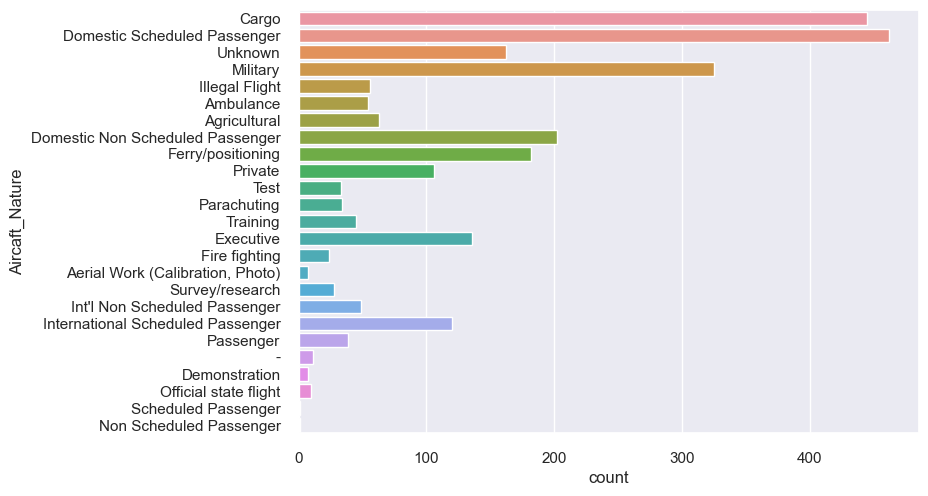

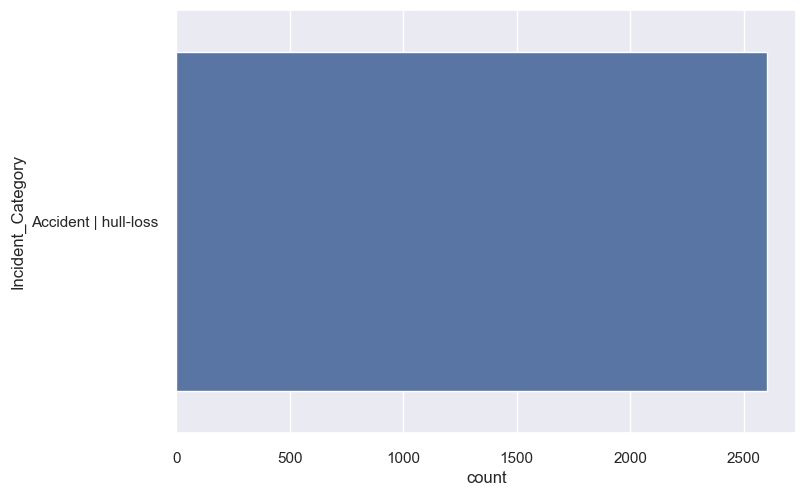

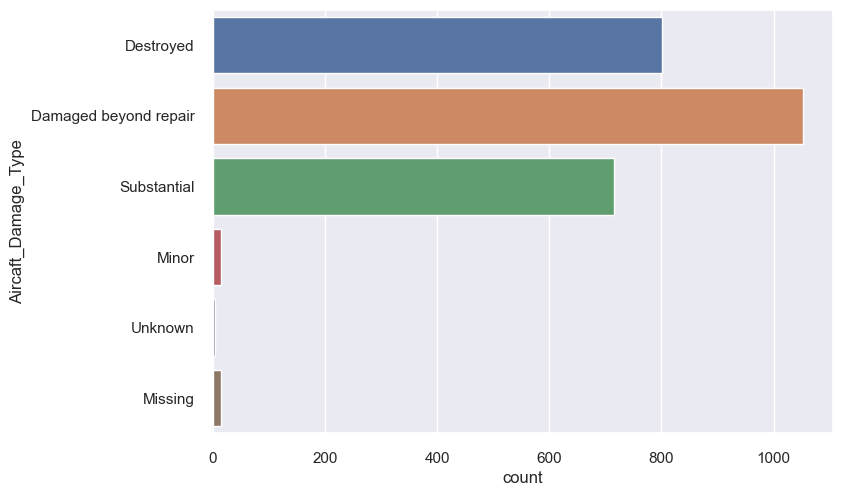

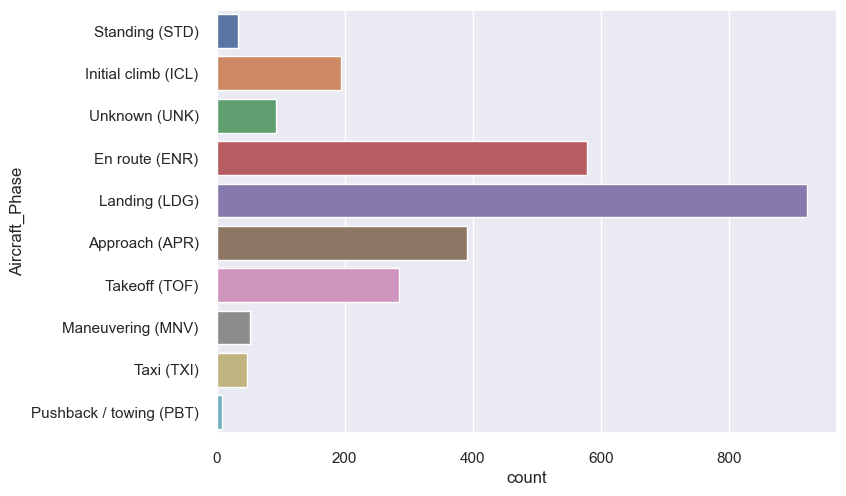

In [143]:
for column in air_disaster_2000s_hull_loss_cleaned.select_dtypes(include='object'):
    if air_disaster_2000s_hull_loss_cleaned[column].nunique() < 50:
        sns.countplot(y=column, data=air_disaster_2000s_hull_loss_cleaned)
        plt.show()

In [144]:
air_disaster_2000s.columns

Index(['Incident_Date', 'Aircaft_Model', 'Aircaft_Registration',
       'Aircaft_Operator', 'Aircaft_Nature', 'Incident_Category',
       'Incident_Cause(es)', 'Incident_Location', 'Aircaft_Damage_Type',
       'Date', 'Time', 'Arit', 'Aircaft_Engines', 'Onboard_Crew',
       'Onboard_Passengers', 'Onboard_Total', 'Fatalities',
       'Aircaft_First_Flight', 'Aircraft_Phase', 'Departure_Airport',
       'Destination_Airport', 'Ground_Casualties', 'Collision_Casualties',
       'Year', 'incident_count', 'Total Occupants', 'Total Passengers',
       'Total Crew', 'Total Onboard Fatalities', 'Total Passenger Fatalities',
       'Total Crew Fatalities'],
      dtype='object')

In [145]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Aircaft_Damage_Type'], air_disaster_2000s['Aircaft_Operator'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and Aircraft Damage Type.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between General_Health and Heart_Disease.")

Chi-Square Statistic: 14154.077287646978
P-value: 3.492649107988194e-10
Degrees of Freedom: 13130
Expected Frequencies Table:
Aircaft_Operator       , op.for GoJump  , op.for Tlaxcala State Government  \
Aircaft_Damage_Type                                                          
Damaged beyond repair         0.285269                            0.285269   
Destroyed                     0.202047                            0.202047   
Minor                         0.039608                            0.039608   
Missing                       0.003338                            0.003338   
Substantial                   0.458389                            0.458389   
Unknown                       0.011348                            0.011348   

Aircaft_Operator       2M Leasing  2nd Arkhangelsk United Aviation Division  \
Aircaft_Damage_Type                                                           
Damaged beyond repair    0.285269                                  0.570538   
Destroyed   

In [146]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Total Onboard Fatalities'], air_disaster_2000s['Aircaft_Operator'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and Aircraft Damage Type.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between General_Health and Heart_Disease.")

Chi-Square Statistic: 282672.4243955826
P-value: 1.0
Degrees of Freedom: 315945
Expected Frequencies Table:
Aircaft_Operator          , op.for GoJump  , op.for Tlaxcala State Government  \
Total Onboard Fatalities                                                        
0                                0.736051                            0.736051   
1                                0.043592                            0.043592   
2                                0.048169                            0.048169   
3                                0.030296                            0.030296   
4                                0.019398                            0.019398   
...                                   ...                                 ...   
239                              0.000218                            0.000218   
257                              0.000218                            0.000218   
260                              0.000218                            0.000218   
2

In [147]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Total Onboard Fatalities'], air_disaster_2000s['Aircaft_Engines'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and Aircraft Damage Type.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between General_Health and Heart_Disease.")

Chi-Square Statistic: 93325.8615627098
P-value: 0.0
Degrees of Freedom: 69721
Expected Frequencies Table:
Aircaft_Engines           1 Garrett TPE331  1 Garrett TPE331-10  \
Total Onboard Fatalities                                          
0                                 2.920748             0.730187   
1                                 0.176907             0.044227   
2                                 0.205402             0.051351   
3                                 0.123479             0.030870   
4                                 0.079549             0.019887   
...                                    ...                  ...   
225                               0.001187             0.000297   
228                               0.001187             0.000297   
239                               0.001187             0.000297   
260                               0.001187             0.000297   
298                               0.001187             0.000297   

Aircaft_Engines       

In [148]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Total Onboard Fatalities'], air_disaster_2000s['Incident_Cause(es)'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and Aircraft Damage Type.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between General_Health and Heart_Disease.")

Chi-Square Statistic: 128124.39664564742
P-value: 0.0
Degrees of Freedom: 69020
Expected Frequencies Table:
Incident_Cause(es)        ATC & navigation - Language/communication problems (also flightcr, Result - Runway mishap  \
Total Onboard Fatalities                                                                                              
0                                                                  0.736051                                           
1                                                                  0.043592                                           
2                                                                  0.048169                                           
3                                                                  0.030296                                           
4                                                                  0.019398                                           
...                                                        

In [149]:
fatal_or_not = []

for fatal in air_disaster_2000s['Total Onboard Fatalities']:
    if fatal > 0:
        fatal_or_not.append(1)
    else:
        fatal_or_not.append(0)

In [150]:
air_disaster_2000s['Fatal or Not'] = fatal_or_not

In [151]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Fatal or Not'], air_disaster_2000s['Incident_Cause(es)'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and Aircraft Damage Type.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between General_Health and Heart_Disease.")

Chi-Square Statistic: 2580.100591898037
P-value: 3.1302952563137346e-249
Degrees of Freedom: 580
Expected Frequencies Table:
Incident_Cause(es)  ATC & navigation - Language/communication problems (also flightcr, Result - Runway mishap  \
Fatal or Not                                                                                                    
0                                                            0.736051                                           
1                                                            0.263949                                           

Incident_Cause(es)  ATC & navigation - VFR flight in IMC  \
Fatal or Not                                               
0                                               0.736051   
1                                               0.263949   

Incident_Cause(es)  ATC & navigation - VFR flight in IMC, Flightcrew - Insufficient rest / fatigue, Result - CFIT - Hill, mountain  \
Fatal or Not                                   

In [152]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Fatal or Not'], air_disaster_2000s['Aircaft_Operator'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Aircraft Operator and whether the incident was fatal.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between Aircraft Operator and whether the incident was fatal.")

Chi-Square Statistic: 2946.3281896468625
P-value: 5.453597101648969e-05
Degrees of Freedom: 2655
Expected Frequencies Table:
Aircaft_Operator  , op.for GoJump  , op.for Tlaxcala State Government  \
Fatal or Not                                                            
0                        0.736051                            0.736051   
1                        0.263949                            0.263949   

Aircaft_Operator  2M Leasing  2nd Arkhangelsk United Aviation Division  \
Fatal or Not                                                             
0                   0.736051                                  1.472101   
1                   0.263949                                  0.527899   

Aircaft_Operator  2nd Sverdlovsk Aviation Enterprise  748 Air Services  \
Fatal or Not                                                             
0                                           2.208152          2.944202   
1                                           0.791848          1

In [153]:
from scipy.stats import chi2_contingency
# Here, we are focusing on one specific column 'General_Health' and 'Heart_Disease'
cross_tab = pd.crosstab(air_disaster_2000s['Fatal or Not'], air_disaster_2000s['Incident_Cause(es)'])
# Perform the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(cross_tab)
# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns))
# Interpret the results
alpha = 0.05
print("\nSignificance Level (alpha):", alpha)
print("Is the p-value less than alpha?", p_val < alpha)
if p_val < alpha:
    print("Reject the Null Hypothesis (H0): There is a significant association between Incident_Cause(es) and whether the incident was fatal.")
else:
    print("Fail to Reject the Null Hypothesis (H0): There is no significant association between Incident_Cause(es) and whether the incident was fatal.")

Chi-Square Statistic: 2580.100591898037
P-value: 3.1302952563137346e-249
Degrees of Freedom: 580
Expected Frequencies Table:
Incident_Cause(es)  ATC & navigation - Language/communication problems (also flightcr, Result - Runway mishap  \
Fatal or Not                                                                                                    
0                                                            0.736051                                           
1                                                            0.263949                                           

Incident_Cause(es)  ATC & navigation - VFR flight in IMC  \
Fatal or Not                                               
0                                               0.736051   
1                                               0.263949   

Incident_Cause(es)  ATC & navigation - VFR flight in IMC, Flightcrew - Insufficient rest / fatigue, Result - CFIT - Hill, mountain  \
Fatal or Not                                   

In [154]:
air_disaster_2000s_fatal_or_not = air_disaster_2000s.drop(columns=['Aircaft_Registration'
                                           ,'Year', 'Total Passenger Fatalities', 'Total Crew Fatalities'
                                           , 'Total Crew', 'Total Passengers', 'Incident_Date'
                                           , 'Incident_Location', 'Ground_Casualties'
                                           ,'Date', 'Time', 'Arit'
                                           ,'Onboard_Crew', 'Onboard_Total', 'Fatalities'
                                           ,'Onboard_Passengers', 'Aircaft_First_Flight', 'Collision_Casualties'
                                           ,'Departure_Airport', 'Destination_Airport', 'incident_count'
                                           ,'Total Occupants', 'Total Onboard Fatalities'])

In [155]:
air_disaster_2000s_fatal_or_not

Aircaft_Model  \
0     British Aerospace 4121 Jetstream 41   
1     British Aerospace 3101 Jetstream 31   
2                          Boeing 737-4H6   
3                     Tupolev Tu-204-100C   
4           Beechcraft 200 Super King Air   
...                                   ...   
4583           McDonnell Douglas DC-10-10   
4584        Beechcraft 200 Super King Air   
4585  British Aerospace 4101 Jetstream 41   
4586                       Boeing 747-436   
4587                      Yakovlev Yak-40   

                                      Aircaft_Operator  \
0                                           SA Airlink   
1                                               LANHSA   
2                                     Caspian Airlines   
3                             Cainiao, opb Aviastar-TU   
4                                              private   
...                                                ...   
4583       American Airlines, op.for Hawaiian Airlines   
4584                             Videovision Broadcast   
4585       United Express, opb Atlantic Coast Airlines   
4586                                   British Airways   
4587  NovgorodAvia, op.for Ecuato Guineana de Aviacion   

                         Aircaft_Nature  \
0      Domestic Non Scheduled Passenger   
1          Domestic Scheduled Passenger   
2          Domestic Scheduled Passenger   
3                                 Cargo   
4                        Illegal Flight   
...                                 ...   
4583  International Scheduled Passenger   
4584   Domestic Non Scheduled Passenger   
4585       Domestic Scheduled Passenger   
4586  International Scheduled Passenger   
4587                            Unknown   

                                      Incident_Category  \
0                          Accident | repairable-damage   
1                          Accident | repairable-damage   
2                          Accident | repairable-damage   
3                                  Accident | hull-loss   
4     Criminal occurrence (sabotage, shoot down) | h...   
...                                                 ...   
4583                       Accident | repairable-damage   
4584                               Accident | hull-loss   
4585                               Accident | hull-loss   
4586                      Hijacking | repairable-damage   
4587  other occurrence (ground fire, sabotage) | hul...   

                                     Incident_Cause(es)  \
0     Airplane - Engines, Airplane - Engines - Prop/...   
1     Airplane - Undercarriage, Airplane - Undercarr...   
2     Airplane - Undercarriage, Airplane - Undercarr...   
3     Cargo - Fire/smoke, Result - Damaged on the gr...   
4                        Result - Damaged on the ground   
...                                                 ...   
4583                          Result - Runway excursion   
4584                           Result - Loss of control   
4585                          Result - Runway excursion   
4586  Result - Hijacking - Hijacker(s) overpowered b...   
4587                     Result - Damaged on the ground   

        Aircaft_Damage_Type                 Aircaft_Engines  Aircraft_Phase  \
0               Substantial      2 Garrett TPE331-14GR-805H   Landing (LDG)   
1               Substantial                             NaN   Landing (LDG)   
2               Substantial                2 CFMI CFM56-3C1   Landing (LDG)   
3                 Destroyed               2 Soloviev PS-90A  Standing (STD)   
4     Damaged beyond repair                             NaN  Standing (STD)   
...                     ...                             ...             ...   
4583            Substantial       3 General Electric CF6-6K   Landing (LDG)   
4584  Damaged beyond repair  2 Pratt Whitney Canada PT6A-42   Takeoff (TOF)   
4585            Substantial      2 Garrett TPE331-14HR-801H   Landing (LDG)   
4586                    NaN        4 Rolls-Royce RB211-524G  En r

In [156]:
X = pd.get_dummies(air_disaster_2000s_fatal_or_not, columns=['Aircaft_Model', 'Aircaft_Operator', 'Aircaft_Nature','Incident_Category','Incident_Cause(es)','Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase'], dtype=int)

In [157]:
X = X.drop(columns='Fatal or Not')

In [158]:
y = air_disaster_2000s_fatal_or_not['Fatal or Not']
X_train, X_test, y_train, y_test = fun.train_test_split(X, y, test_size=.3, random_state=40)

In [159]:
X_train

Aircaft_Model_ATR 42-300  Aircaft_Model_ATR 42-310  \
722                          0                         0   
4295                         0                         0   
2823                         0                         0   
1275                         0                         0   
3872                         0                         0   
...                        ...                       ...   
2103                         0                         0   
3603                         0                         0   
3340                         0                         0   
3064                         0                         0   
3398                         0                         0   

      Aircaft_Model_ATR 42-312  Aircaft_Model_ATR 42-320  \
722                          0                         0   
4295                         0                         0   
2823                         0                         0   
1275                         0                         0   
3872                         0                         0   
...                        ...                       ...   
2103                         0                         0   
3603                         0                         0   
3340                         0                         0   
3064                         0                         0   
3398                         0                         0   

      Aircaft_Model_ATR 42-320F  Aircaft_Model_ATR 42-500  \
722                           0                         0   
4295                          0                         0   
2823                          0                         0   
1275                          0                         0   
3872                          0                         0   
...                         ...                       ...   
2103                          0                         0   
3603                          0                         0   
3340                          0                         0   
3064                          0                         0   
3398                          0                         0   

      Aircaft_Model_ATR 42-500 ?  Aircaft_Model_ATR 42-512  \
722                            0                         0   
4295                           0                         0   
2823                           0                         0   
1275                           0                         0   
3872                           0                         0   
...                          ...                       ...   
2103                           0                         0   
3603                           0                         0   
3340                           0                         0   
3064                           0                         0   
3398                           0                         0   

      Aircaft_Model_ATR 42-600  Aircaft_Model_ATR 72-201  ...  \
722                          0                         0  ...   
4295                         0                         0  ...   
2823                         0                         0  ...   
1275                         0                         0  ...   
3872                         0                         0  ...   
...                        ...                       ...  ...   
2103                         0                         0  ...   
3603                         0                         0  ...   
3340                         0                         0  ...   
3064                         0                         0  ...   
3398                         0                         0  ...   

      Aircraft_Phase_Approach (APR)  Aircraft_Phase_En route (ENR)  \
722                               0                              0   
4295                              0                              0   
2823                              1                              0   
1275                     

In [160]:
model = fun.LogisticRegressionCV(cv=10, random_state=40, max_iter=10000)
    # Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=40)

In [161]:
model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


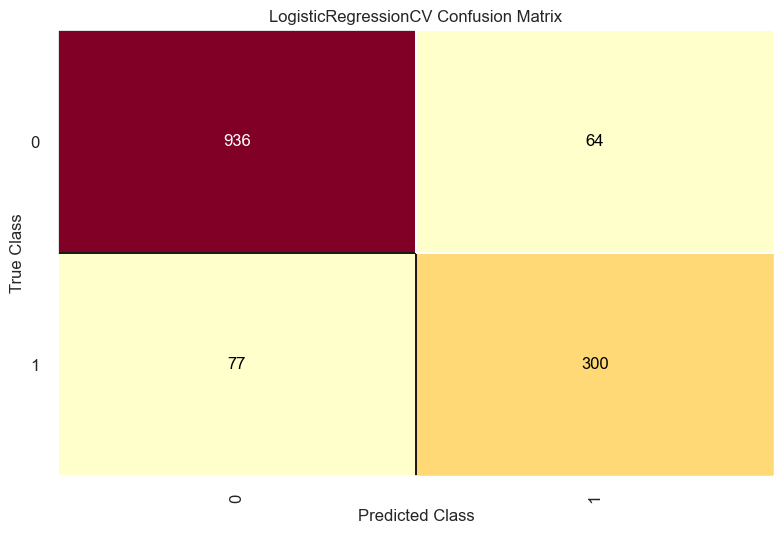

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [162]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# How did we do?
cm.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


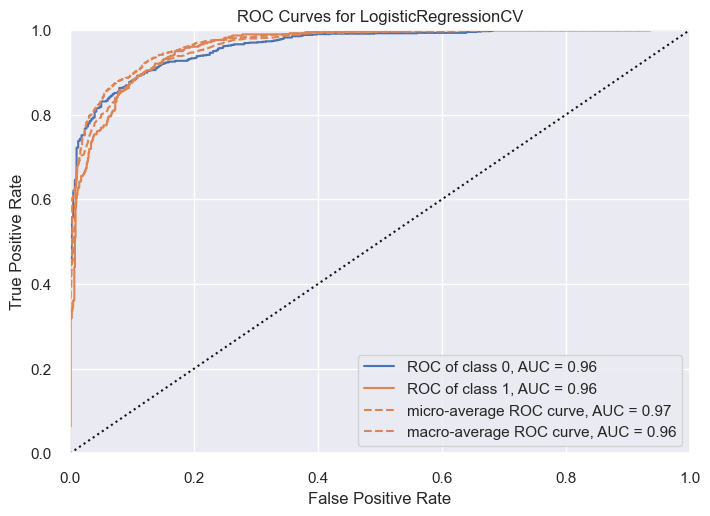

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [164]:
X.shape

(4588, 5214)

In [165]:
X1 = pd.get_dummies(air_disaster_2000s_fatal_or_not, columns=['Aircaft_Model'], dtype=int)

In [166]:
X1 = X1.drop(columns=['Aircaft_Operator', 'Aircaft_Nature','Incident_Category','Incident_Cause(es)','Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase', 'Fatal or Not'])

In [167]:
X_train, X_test, y_train, y_test = fun.train_test_split(X1, y, test_size=.3, random_state=40)

In [168]:
model = fun.LogisticRegressionCV(cv=10, random_state=40, max_iter=10000)
    # Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=40)

In [169]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


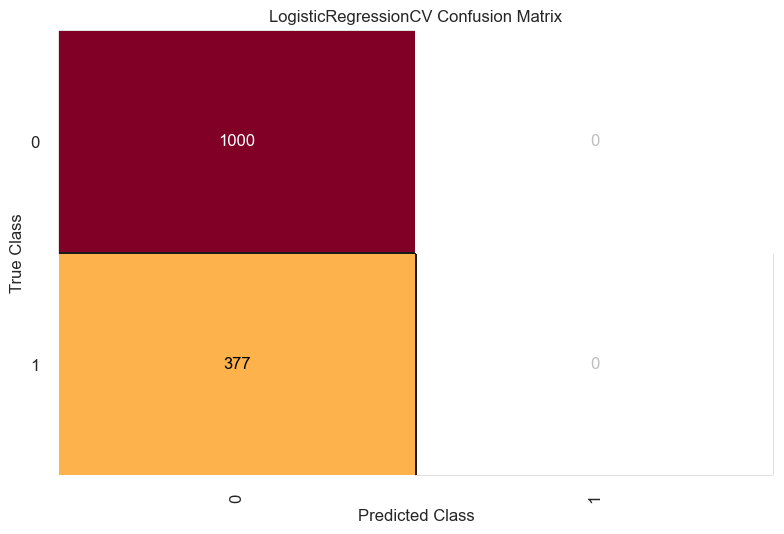

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [170]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# How did we do?
cm.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


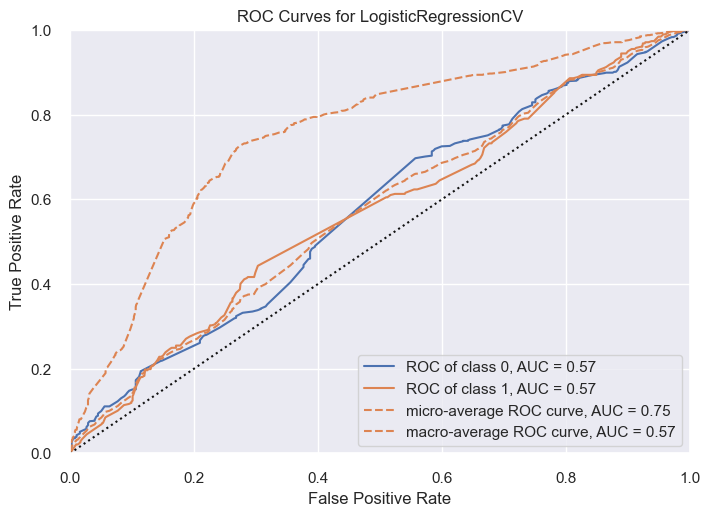

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [172]:
X2 = pd.get_dummies(air_disaster_2000s_fatal_or_not, columns=['Aircaft_Operator'],prefix='',prefix_sep='', dtype=int)
X2 = X2.drop(columns=['Aircaft_Model', 'Aircaft_Nature','Incident_Category','Incident_Cause(es)','Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase', 'Fatal or Not'])
X_train, X_test, y_train, y_test = fun.train_test_split(X2, y, test_size=.3, random_state=40)

In [173]:
model = fun.LogisticRegressionCV(cv=10, random_state=40, max_iter=10000)
    # Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=40)

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


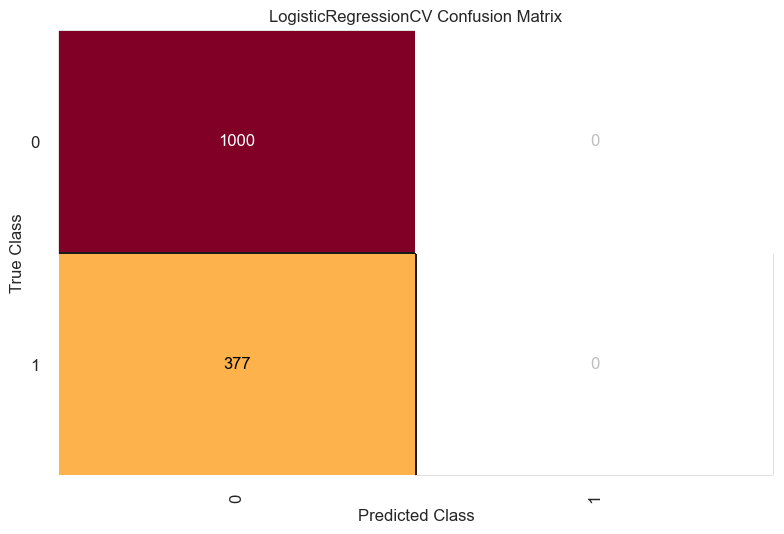

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [174]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# How did we do?
cm.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


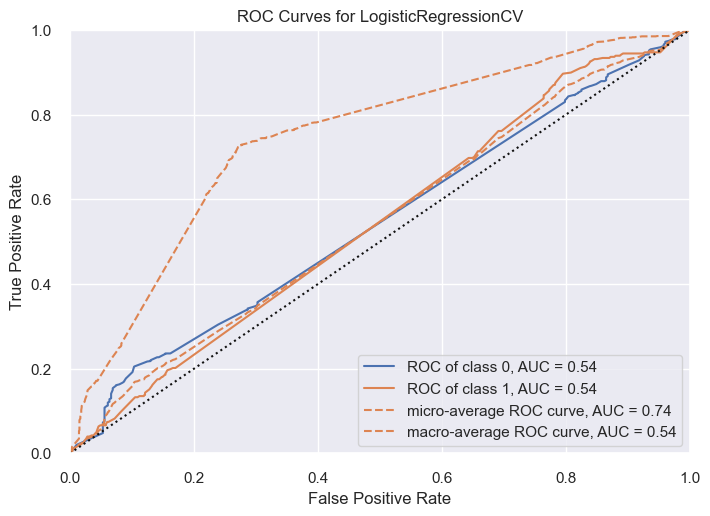

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [175]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [176]:
X3 = pd.get_dummies(air_disaster_2000s_fatal_or_not, columns=['Incident_Cause(es)'],prefix='',prefix_sep='', dtype=int)
X3 = X3.drop(columns=['Aircaft_Model', 'Aircaft_Nature','Incident_Category','Aircaft_Operator','Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase', 'Fatal or Not'])
X_train, X_test, y_train, y_test = fun.train_test_split(X3, y, test_size=.3, random_state=40)

In [177]:
model = fun.LogisticRegressionCV(cv=10, random_state=40, max_iter=10000)
    # Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=40)

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


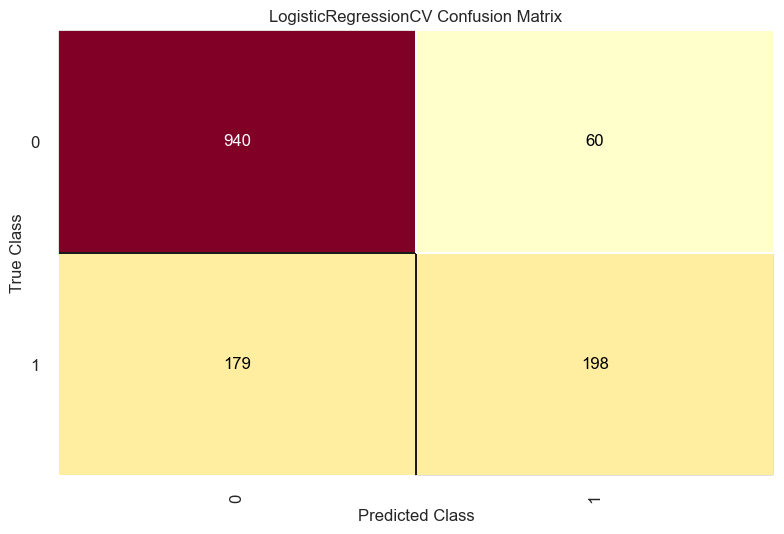

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [178]:
cm = ConfusionMatrix(model)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# How did we do?
cm.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


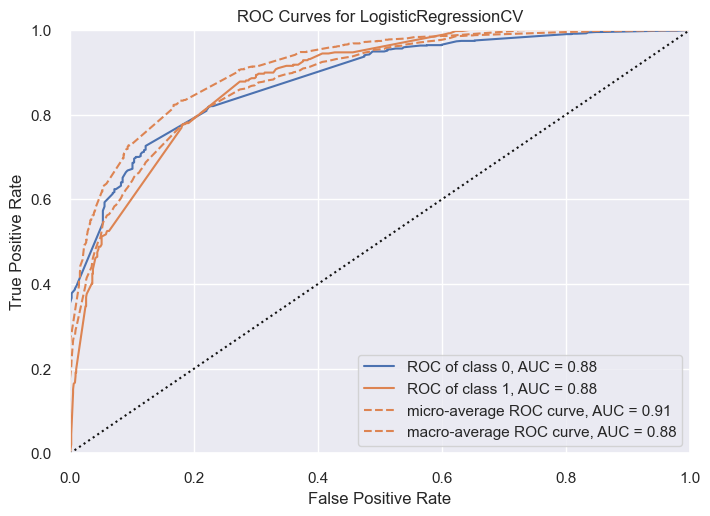

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [179]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [180]:
air_disaster_2000s['Incident_Cause(es)']

0       Airplane - Engines, Airplane - Engines - Prop/...
1       Airplane - Undercarriage, Airplane - Undercarr...
2       Airplane - Undercarriage, Airplane - Undercarr...
3       Cargo - Fire/smoke, Result - Damaged on the gr...
4                          Result - Damaged on the ground
                              ...                        
4583                            Result - Runway excursion
4584                             Result - Loss of control
4585                            Result - Runway excursion
4586    Result - Hijacking - Hijacker(s) overpowered b...
4587                       Result - Damaged on the ground
Name: Incident_Cause(es), Length: 4588, dtype: object

In [181]:
model.coef_

model.feature_names_in_

array(['ATC & navigation - Language/communication problems (also flightcr, Result - Runway mishap',
       'ATC & navigation - VFR flight in IMC',
       'ATC & navigation - VFR flight in IMC, Flightcrew - Insufficient rest / fatigue, Result - CFIT - Hill, mountain',
       'ATC & navigation - VFR flight in IMC, Landing/takeoff - Landing, Landing/takeoff - Landing - Unstabilized approach, Result - Runway excursion',
       'ATC & navigation - VFR flight in IMC, Result - CFIT - Hill, mountain',
       'ATC & navigation - VFR flight in IMC, Result - CFIT - Level ground',
       'ATC & navigation - VFR flight in IMC, Result - CFIT - Level ground, Weather - Visibility -low',
       'ATC & navigation - VFR flight in IMC, Result - Loss of control',
       'ATC & navigation - VFR flight in IMC, Result - Runway mishap',
       'Airplane - Airframe, Airplane - Airframe - Cargo door, Flightcrew - Distraction in cockpit, Result - Loss of control',
       'Airplane - Airframe, Airplane - Airframe 

In [182]:
model_output = pd.DataFrame()

In [183]:
model_output['Coeficient'] = (model.coef_).flatten()
model_output['Feature Name'] = model.feature_names_in_

In [184]:
model_output = model_output.set_index('Feature Name')

In [186]:
air_disaster_2000s = air_disaster_2000s.fillna('NA')

In [350]:
causes = ['']
for cause in air_disaster_2000s['Incident_Cause(es)']:
    new = cause.split('-')
    causes.append(new[1])

In [351]:
causes.remove(causes[0])

In [352]:
causes

[' Engines, Airplane ',
 ' Undercarriage, Airplane ',
 ' Undercarriage, Airplane ',
 ' Fire/smoke, Result ',
 ' Damaged on the ground',
 ' Tailstrike, Result ',
 ' Runway excursion',
 'Unavailable',
 'Unavailable',
 'Unavailable',
 'Unavailable',
 ' Runway mishap',
 ' Runway excursion',
 'Unavailable',
 ' Loss of control',
 ' Loss of control, Result ',
 'Unavailable',
 ' Landing, Landing/takeoff ',
 ' Damaged on the ground',
 ' Emergency, forced landing ',
 ' Runway excursion',
 'Unavailable',
 ' Runway excursion',
 ' Runway excursion',
 'Unavailable',
 ' Loss of control',
 ' Tailstrike, Result ',
 ' Loss of control',
 ' Undercarriage, Airplane ',
 ' Damaged on the ground',
 ' Damaged on the ground',
 ' Takeoff ',
 ' Runway mishap',
 ' Landing, Landing/takeoff ',
 ' Runway mishap',
 'Unavailable',
 'Unavailable',
 'Unavailable',
 ' Engines, Airplane ',
 ' Undershoot / overshoot',
 ' Loss of control, Weather ',
 ' Undercarriage, Airplane ',
 ' Engines, Airplane ',
 ' Hijacking ',
 ' Und

In [190]:
len(causes)

4588

In [191]:
len(air_disaster_2000s)

4588

In [192]:
air_disaster_2000s['Incident Cause'] = causes

In [193]:
air_disaster_2000s_fatal_or_not['Incident Cause'] = causes

In [194]:
X4 = pd.get_dummies(air_disaster_2000s_fatal_or_not, columns=['Incident Cause'],prefix='',prefix_sep='', dtype=int)
X4 = X4.drop(columns=['Aircaft_Model', 'Aircaft_Nature','Incident_Category','Aircaft_Operator','Aircaft_Damage_Type', 'Aircaft_Engines', 'Aircraft_Phase', 'Fatal or Not', 'Incident_Cause(es)'])
X_train, X_test, y_train, y_test = fun.train_test_split(X4, y, test_size=.3, random_state=40)

In [246]:
model = fun.LogisticRegressionCV(cv=10, random_state=40, max_iter=10000)
    # Fit model
model.fit(X_train, y_train)

LogisticRegressionCV(cv=10, max_iter=10000, random_state=40)

In [196]:
model = fun.LogisticRegression()
    # Fit model
model.fit(X_train, y_train)

LogisticRegression()

In [197]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [198]:
labels= ['Non-fatal', 'Fatal']

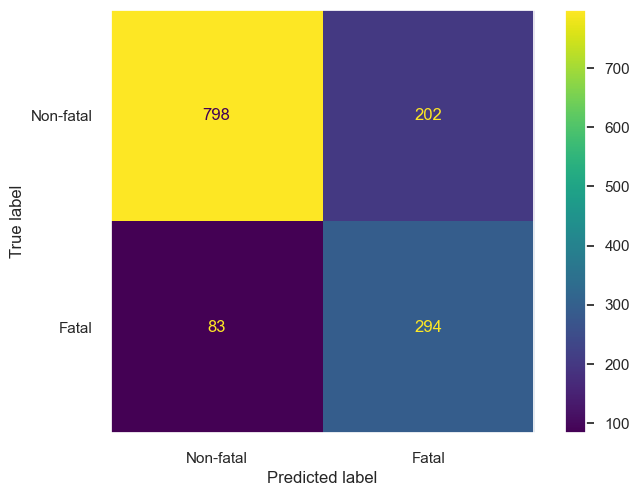

In [199]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#change label value to match your target categories.  0 is first
labels= ['Non-fatal', 'Fatal']

#change threshold to tweak how the model predicts. 
threshold = 0.32

y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype('float')
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.grid(None) 
plt.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


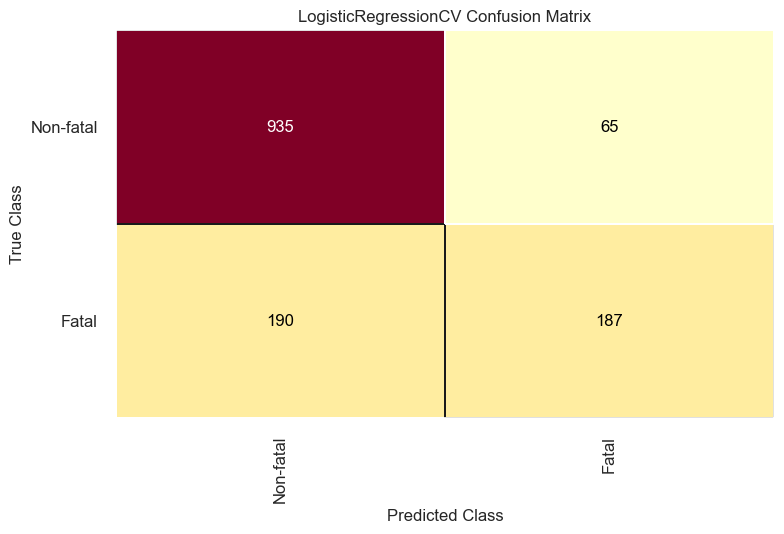

<Axes: title={'center': 'LogisticRegressionCV Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [247]:
cm = ConfusionMatrix(model, classes=labels)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# How did we do?
cm.show()

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


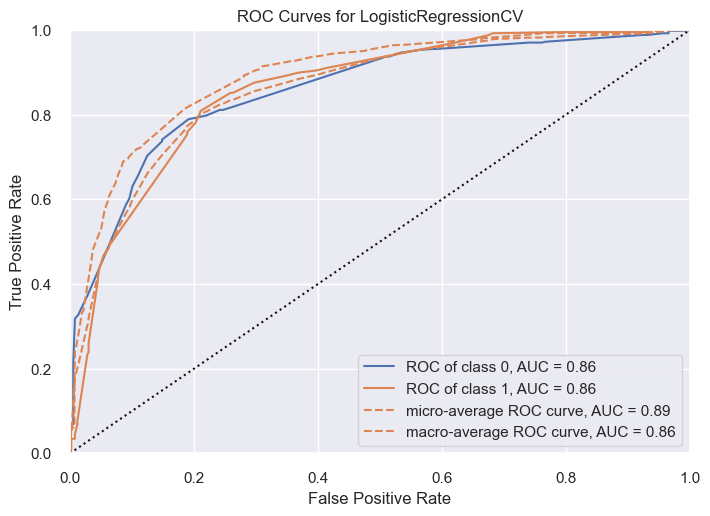

<Axes: title={'center': 'ROC Curves for LogisticRegressionCV'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [248]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [249]:
model.feature_names_in_

array([' Aircraft, Collision ', ' Airframe, Airplane ',
       ' Airframe, Flightcrew ', ' Airframe, Result ',
       ' Alcohol, drug usage', ' Alcohol, drug usage, Flightcrew ',
       ' Alcohol, drug usage, Landing/takeoff ',
       ' Alcohol, drug usage, Result ', ' CFIT ', ' Cause undetermined',
       ' CofG', ' CofG, Cargo ', ' CofG, Collision ',
       ' CofG, Flightcrew ', ' CofG, Landing/takeoff ', ' CofG, Result ',
       ' Damaged on the ground', ' Damaged on the ground, Security ',
       ' Damaged on the ground, Weather ', ' Destroyed on ground',
       ' Disorientation, situational awareness',
       ' Disorientation, situational awareness, Flightcrew ',
       ' Disorientation, situational awareness, Landing/takeoff ',
       ' Disorientation, situational awareness, Result ',
       ' Disorientation, situational awareness, Weather ',
       ' Distraction in cockpit, Landing/takeoff ',
       ' Distraction in cockpit, Result ', ' Emergency, forced landing ',
       ' Engi

In [250]:
model.coef_

array([[ -0.99987975,   1.55657541,   7.95004152,   2.31929485,
          0.        ,   8.87691908,   7.94137517,   9.83517556,
          2.560751  ,   7.94261576,  -6.46246183,   8.49383414,
          0.        ,   7.93585484,  -7.10479928,   1.62574667,
         -4.70631611,  -9.44092318,  -6.46897908,   0.        ,
          8.49392155,   8.87632681,   7.95056944,   3.34869847,
          7.95264735,  -6.4682029 ,   0.30396949,  -0.97099187,
          7.94371192,   0.70940243,  -0.59193199,   0.01675268,
          0.        ,   0.70842646,   1.4025461 ,  -0.34642547,
          0.        ,  -6.4682029 ,   7.95514043,   0.        ,
         -7.49069175,   0.        ,  -7.1103899 ,  -0.67657353,
          0.70940228,   0.        ,   0.23969443,   7.95264735,
         -0.38802203,  -9.35349475,  -7.10517085,   8.88416766,
         -6.4682029 ,  -1.33350076,   0.        ,   0.        ,
          1.80769228,   7.94944479,   0.        ,   1.11514767,
          2.09589354,   7.95514043,  -6.

In [251]:
model_output1 = pd.DataFrame()
model_output1['Coeficient'] = (model.coef_).flatten()
model_output1['Feature Name'] = model.feature_names_in_

In [252]:
model_output1 = model_output1.sort_values(by='Coeficient', ascending=False)

In [253]:
model_output1

Coeficient                       Feature Name
7      9.835176       Alcohol, drug usage, Result 
79     9.703067                            Missing
107    9.378769                            Suicide
74     9.162601         Loss of control, Security 
51     8.884168                  Hijack, Security 
..          ...                                ...
88    -8.636128                    Object, Result 
49    -9.353495       Hangar, ground fire, Result 
17    -9.440923   Damaged on the ground, Security 
130  -10.067839                Wind, hail, Result 
110  -10.131857                Tailstrike, Result 

[134 rows x 2 columns]

In [254]:
new_features = []
for line in model_output1['Feature Name']:
    if ', Result' in line:
        new_line = line.replace(', Result ', '')

        new_features.append('Result of' + new_line)
    else:
        new_features.append(line)

In [255]:
model_output1['Feature Name'] = new_features

<Axes: xlabel='Coeficient', ylabel='Feature Name'>

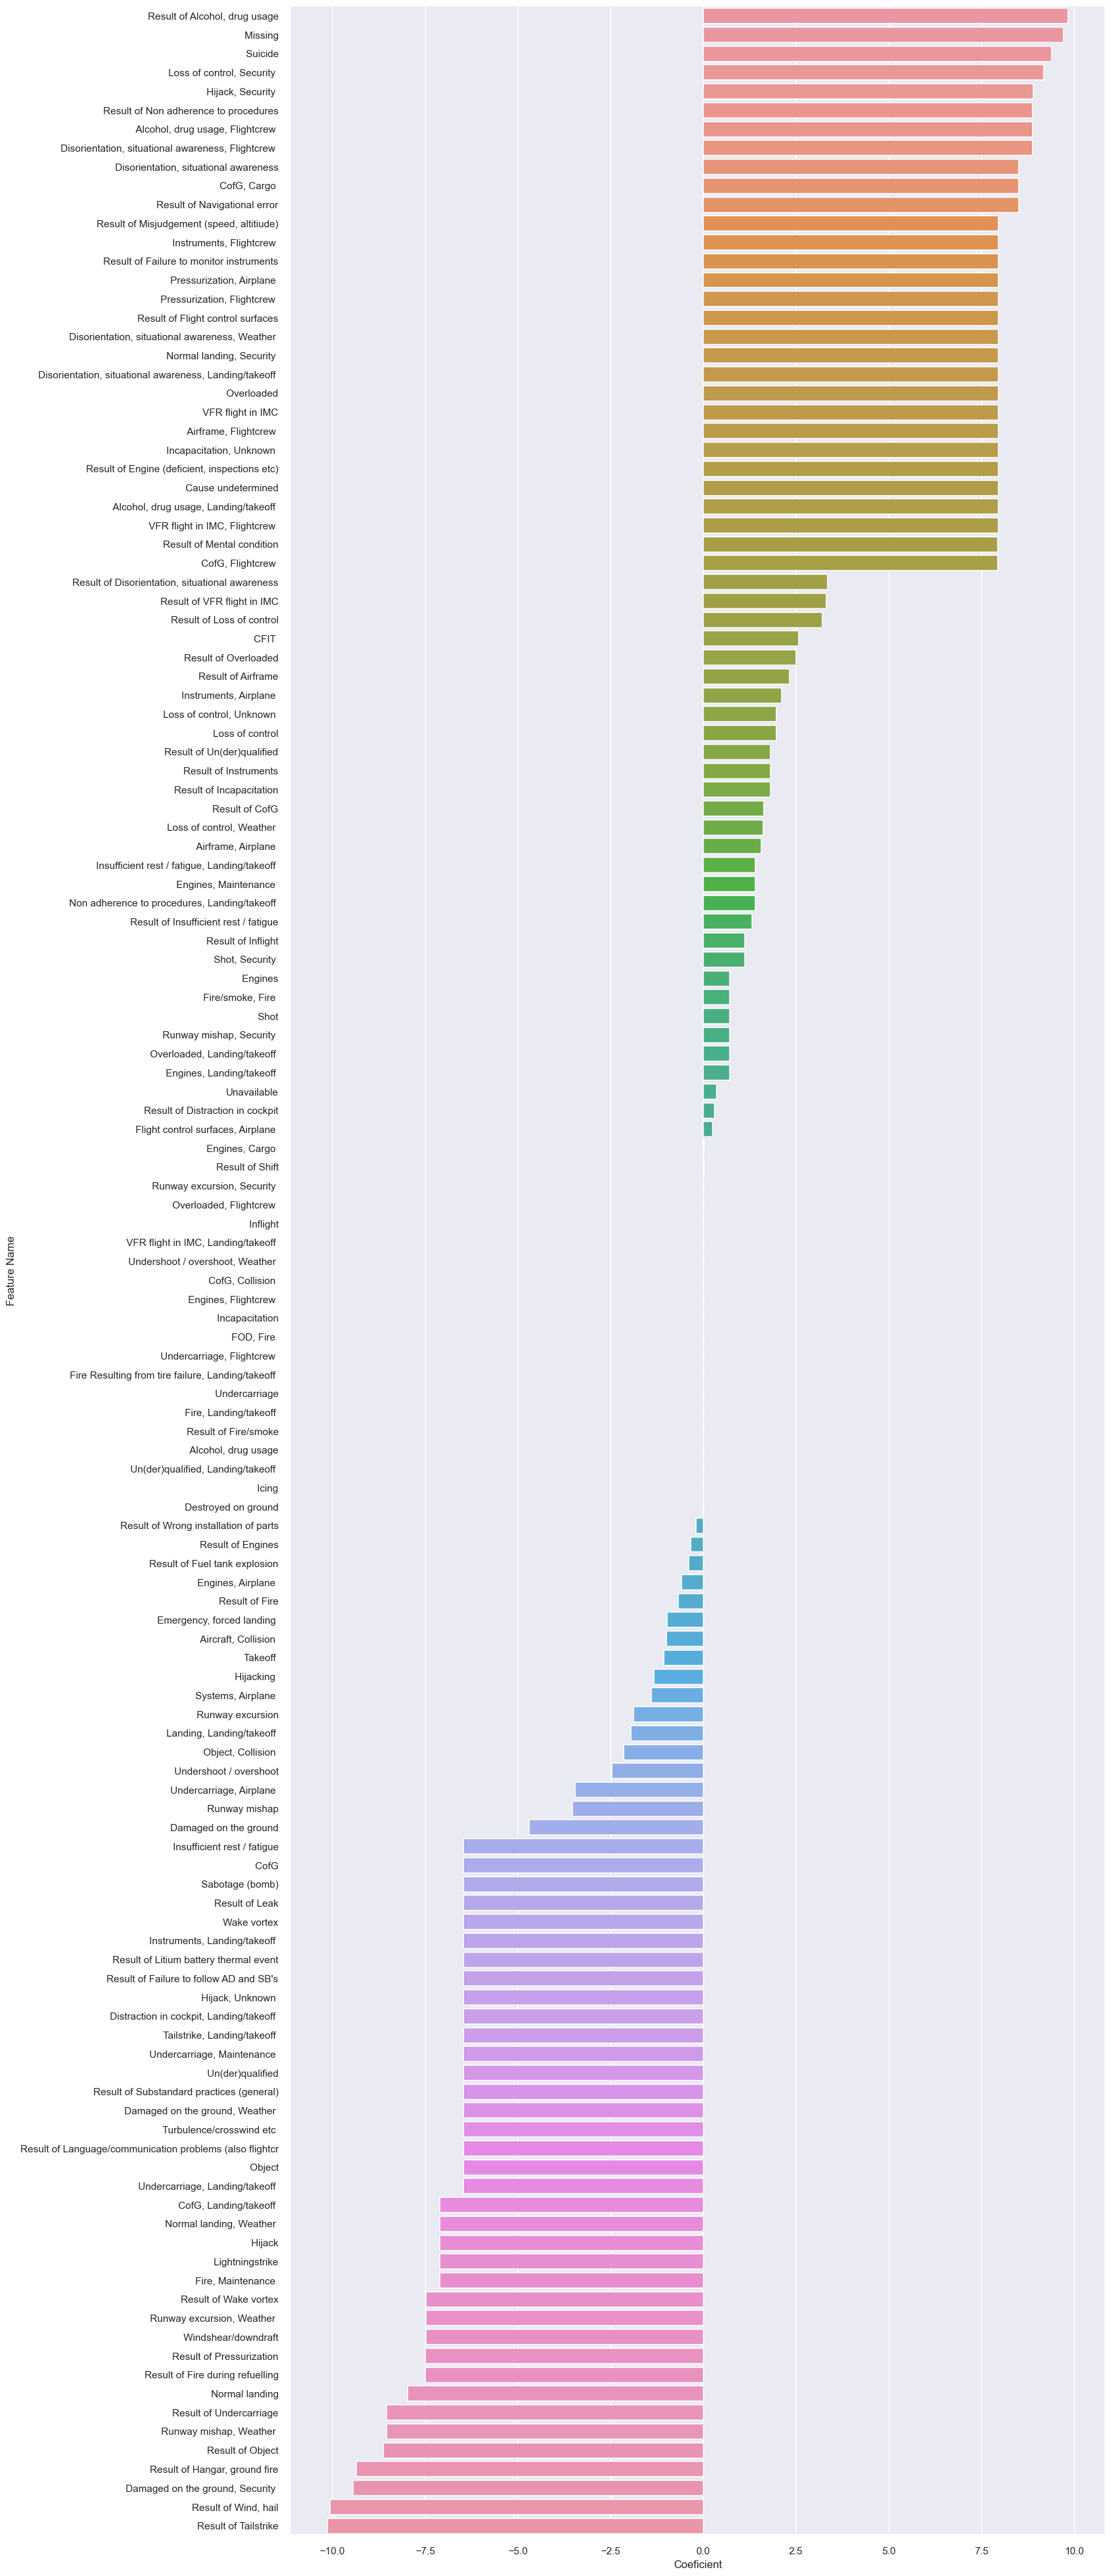

In [256]:
fig, ax = plt.subplots(figsize= (16, 50))
sns.barplot(model_output1, y='Feature Name', x='Coeficient')

In [333]:
model_upper_coef = model_output1[model_output1['Coeficient'] > 8]
model_lower_coef = model_output1[model_output1['Coeficient'] <= -7.5]



In [216]:
model_lower_coef

Coeficient               Feature Name
130   -2.326236       Result of Wind, hail
110   -2.374167       Result of Tailstrike
99    -2.411731              Runway mishap
117   -3.027703   Undercarriage, Airplane 
16    -3.367519      Damaged on the ground

In [259]:
model_lower_coef['Feature Name'] = fun.find_replace(model_lower_coef, 'Feature Name', ' Undercarriage, Airplane ', "Undercarriage damage")

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_713/4284658379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_lower_coef['Feature Name'] = fun.find_replace(model_lower_coef, 'Feature Name', ' Undercarriage, Airplane ', "Undercarriage damage")


Text(0.5, 1.0, 'Incident Causes Least Likely to be Associated with Fatalities\n2000-2022')

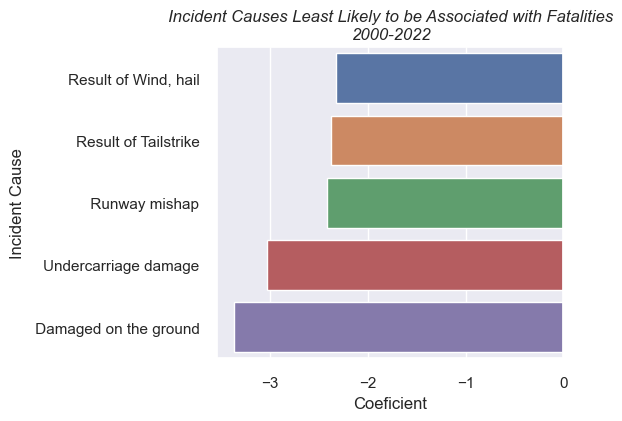

In [261]:
fig , ax = plt.subplots(figsize=(6, 4))
sns.barplot(model_lower_coef, y='Feature Name', x='Coeficient')
plt.tight_layout()
ax.set_ylabel('Incident Cause')
ax.set_title('Incident Causes Least Likely to be Associated with Fatalities\n2000-2022', style= 'italic')

Text(0.5, 1.0, 'Incident Causes Most Likely to be Associated with Fatalities\n2000-2022')

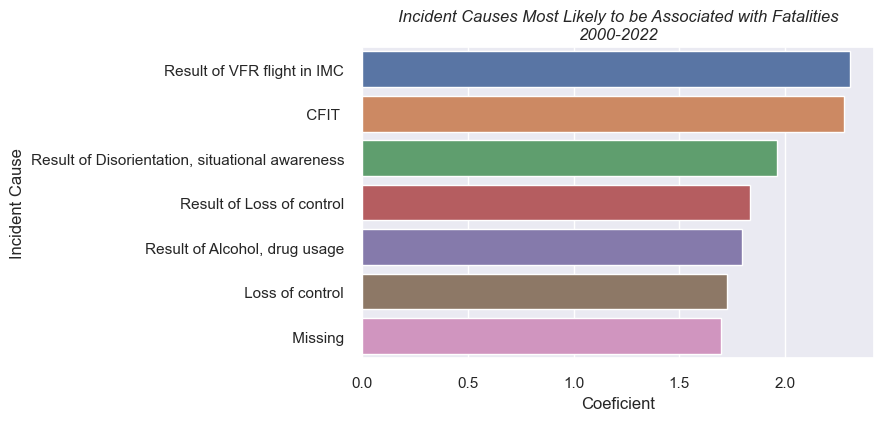

In [291]:
fig , ax = plt.subplots(figsize=(9, 4))
sns.barplot(model_upper_coef, y='Feature Name', x='Coeficient')

plt.tight_layout()
ax.set_ylabel('Incident Cause')
ax.set_title('Incident Causes Most Likely to be Associated with Fatalities\n2000-2022', style= 'italic')

In [334]:
top_bottom_coef = pd.concat([model_lower_coef, model_upper_coef])

In [335]:
top_bottom_coef = top_bottom_coef.sort_values(by='Coeficient', ascending=False)

Text(-246.4861111111111, 0.5, '')

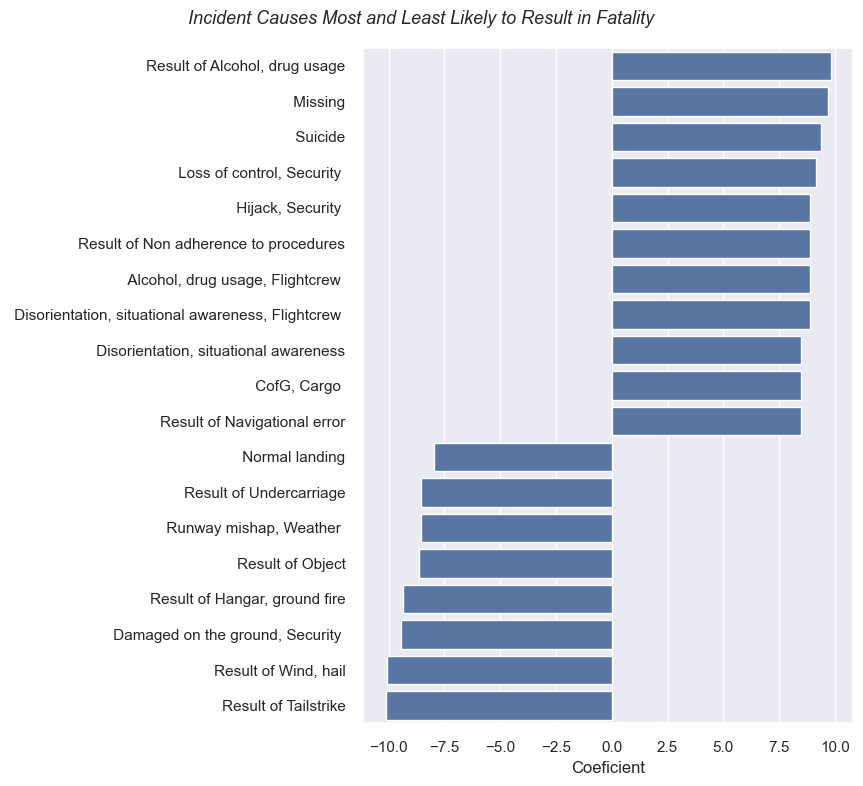

In [336]:
fig , ax = plt.subplots(figsize=(9, 8))
sns.barplot(top_bottom_coef, y='Feature Name', x='Coeficient', color='b')
fig.suptitle('Incident Causes Most and Least Likely to Result in Fatality', style= 'italic', fontsize=13)
plt.tight_layout()
ax.set_ylabel('Incident Cause')
ax.set_ylabel('')


In [219]:
fatal_incidents_by_cause = air_disaster_2000s.groupby('Incident Cause')['Fatal or Not'].value_counts().sort_values(ascending=False)

In [220]:
total_fatalities_by_cause = air_disaster_2000s.groupby('Incident Cause')['Total Onboard Fatalities'].sum().sort_values(ascending=False)

In [221]:
total_fatalities_by_cause = pd.DataFrame(total_fatalities_by_cause)
fatal_incidents_by_cause = pd.DataFrame(fatal_incidents_by_cause).reset_index()

In [222]:
total_fatalities_by_cause = total_fatalities_by_cause[total_fatalities_by_cause['Total Onboard Fatalities']>10]
fatal_incidents_by_cause = fatal_incidents_by_cause[fatal_incidents_by_cause['Fatal or Not']==1]
fatal_incidents_by_cause = fatal_incidents_by_cause[fatal_incidents_by_cause['count']>9]
fatal_incidents_by_cause = fatal_incidents_by_cause[fatal_incidents_by_cause['Incident Cause']!= 'Unavailable']

In [226]:
total_fatalities_by_cause
#fatal_incidents_by_cause

Total Onboard Fatalities
Incident Cause                                                              
 CFIT                                                                   2937
 Loss of control                                                        2929
Unavailable                                                             2776
 Loss of control, Weather                                                937
 Airframe, Airplane                                                      883
 Engines, Airplane                                                       819
 Disorientation, situational awareness, Result                           630
 Runway excursion                                                        592
 Loss of control, Security                                               543
 Aircraft, Collision                                                     409
 Takeoff                                                                 340
 VFR flight in IMC, Result                                               314
 CofG, Result                                                            310
 Missing                                                                 297
 Insufficient rest / fatigue, Result                                     282
 Landing, Landing/takeoff                                                277
 Hijack, Security                                                        221
 Suicide                                                                 187
 Loss of control, Unknown                                                186
 Flight control surfaces, Airplane                                       172
 Insufficient rest / fatigue, Landing/takeoff                            160
 Emergency, forced landing                                               156
 Disorientation, situational awareness, Flightc...                       155
 Inflight, Result                                                        153
 Object, Collision                                                       122
 Engines, Result                                                         121
 Pressurization, Flightcrew                                              121
 Shot, Security                                                          117
 FOD, Fire                                                               109
 Loss of control, Result                                                 103
 Instruments, Flightcrew                                                 102
 Navigational error, Result                                               95
 Pressurization, Airplane                                                 90
 Alcohol, drug usage, Flightcrew                                          90
 Non adherence to procedures, Result                                      87
 Undershoot / overshoot                                                   83
 Instruments, Airplane                                                    80
 Alcohol, drug usage, Result                                              68
 Un(der)qualified, Result                                                 64
 Systems, Airplane                                                        60
 Engines, Maintenance                                                     53
 Mental condition, Result                                                 51
 Overloaded, Result                                                       38
 Airframe, Result                                                         33
 Incapacitation, Result                                                   30
 Engines, Cargo                                                           28
 Undercarriage, Airplane                                                  28
 Non adherence to procedures, Landing/takeoff                             27
 Disorientation, situational awareness, Weather                           21
 Disorientation, situational awareness, Landing...                        20
 Icing                                          

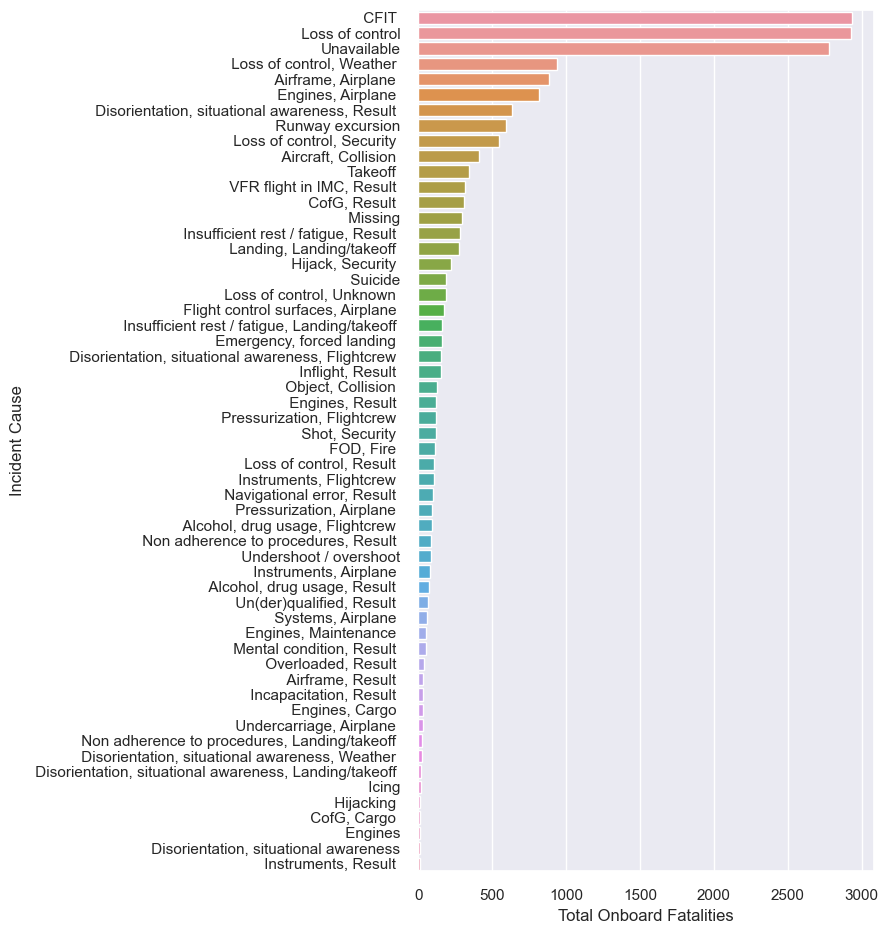

In [227]:
fig , ax = plt.subplots(figsize=(9, 9.5))
sns.barplot(total_fatalities_by_cause, y=total_fatalities_by_cause.index, x='Total Onboard Fatalities')
plt.tight_layout()

In [229]:
new_features = []
for line in fatal_incidents_by_cause['Incident Cause']:
    if ', Result' in line:
        new_line = line.replace(', Result ', '')

        new_features.append('Result of' + new_line)
    else:
        new_features.append(line)

In [230]:
fatal_incidents_by_cause['Incident Cause'] = new_features

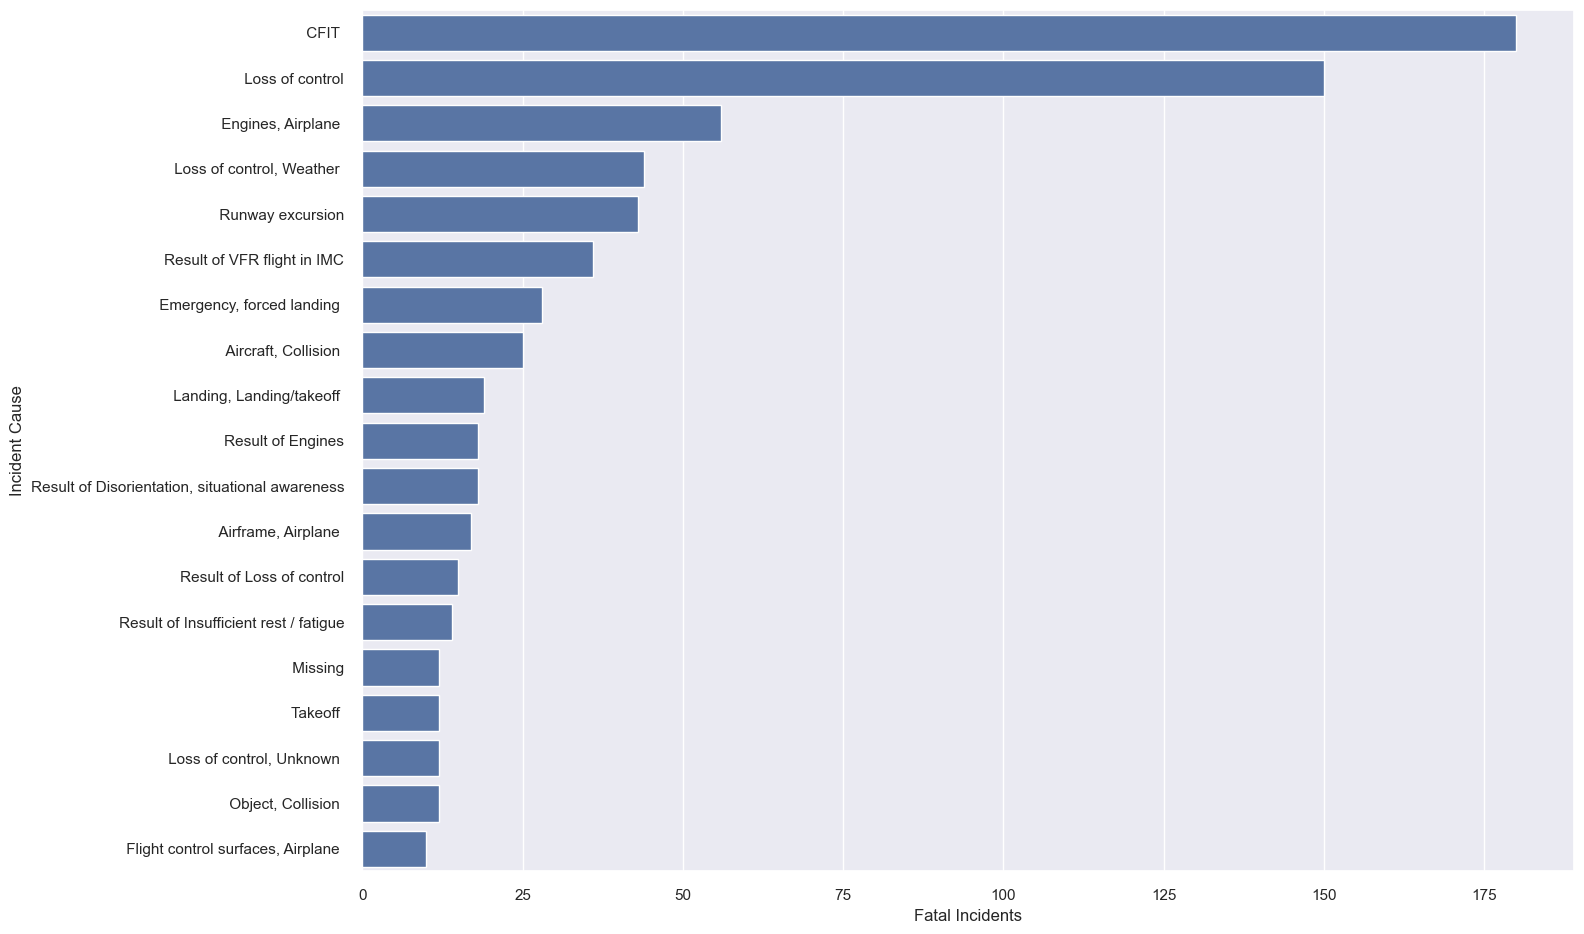

In [337]:
fig , ax = plt.subplots(figsize=(16, 9.5))
sns.barplot(fatal_incidents_by_cause, y='Incident Cause', x='count', color = 'b')
plt.tight_layout()
#plt.xticks(rotation = 290)
ax.set_xlabel('Fatal Incidents')
sns.set_theme()

In [232]:
box_fatal = air_disaster_2000s[air_disaster_2000s['Fatal or Not'] == 1]
box_fatal

Incident_Date                   Aircaft_Model Aircaft_Registration  \
9       2022-02-11                   Antonov An-2R             RA-33599   
14      2021-01-09             Boeing 737-524 (WL)               PK-CLC   
15      2021-01-09           Cessna 560 Citation V                 N3RB   
16      2021-01-12                  Harbin Y-12-II                   NA   
25      2021-01-01                    Antonov An-2                   NA   
...            ...                             ...                  ...   
4572    2000-12-01                   Antonov An-24                   NA   
4576    2000-12-11  Embraer EMB-110P1K Bandeirante               TR-KNA   
4580    2000-12-20    Curtiss C-46A-45-CU Commando               N1419Z   
4582    2000-12-22  Beechcraft B200 Super King Air                N30EM   
4584    2000-12-23   Beechcraft 200 Super King Air               VP-BBK   

           Aircaft_Operator                    Aircaft_Nature  \
9        Kamchatsky Krechet                             Cargo   
14            Sriwijaya Air      Domestic Scheduled Passenger   
15         SX Transport LLC                           Unknown   
16                Kenyan AF                          Military   
25                    KPAAF                          Military   
...                     ...                               ...   
4572                Unknown                           Unknown   
4576            Gabonese AF                          Military   
4580        Everts Air Fuel                             Cargo   
4582   Mountain Air Service                           Private   
4584  Videovision Broadcast  Domestic Non Scheduled Passenger   

                  Incident_Category  \
9              Accident | hull-loss   
14             Accident | hull-loss   
15             Accident | hull-loss   
16             Accident | hull-loss   
25             Accident | hull-loss   
...                             ...   
4572  Hijacking | repairable-damage   
4576           Accident | hull-loss   
4580           Accident | hull-loss   
4582           Accident | hull-loss   
4584           Accident | hull-loss   

                                     Incident_Cause(es)     Incident_Location  \
9                                      Info-Unavailable  near Koryaki, Yel...   
14                             Result - Loss of control  near Jakarta-Soek...   
15    Result - Loss of control, Result - Loss of con...   near Pine Grove, OR   
16                                     Info-Unavailable              near Voi   
25                             Result - Loss of control  near Taechon Air ...   
...                                                 ...                   ...   
4572  Result - Hijacking - Hijacker(s) overpowered b...                    NA   
4576                                  Unknown - Missing          within Gabon   
4580  ATC & navigation - VFR flight in IMC, Result -...        near Kenai, AK   
4582                     Result - CFIT - Hill, mountain  near Rangeley Mun...   
4584                           Result - Loss of control  near Blackbushe A...   

        Aircaft_Damage_Type                        Date  ...  Year  \
9                 Destroyed     Friday 11 February 2022  ...  2022   
14                Destroyed     Saturday 9 January 2021  ...  2021   
15                Destroyed     Saturday 9 January 2021  ...  2021   
16    Damaged beyond repair     Tuesday 12 January 2021  ...  2021   
25    Damaged beyond repair                 xx JAN 2021  ...  2021   
...                     ...                         ...  ...   ...   
4572                  Minor      Friday 1 December 2000  ...  2000   
4576                Missing     Monday 11 December 2000  ...  2000   
4580              Destroyed  Wednesday 20 December 2000  ...  2000   
4582  Damaged beyond repair     Friday 22 December 2000  ...  2000   
4584  Damaged beyond repair   Saturday 23 December 2000  ...  2000   

     incident_count Total Occupants Tota

In [233]:
box_fatal = air_disaster_2000s[air_disaster_2000s['Fatal or Not'] == 1]
average_deaths = box_fatal['Total Onboard Fatalities'].median()

box_fatal['Incident Cause'] = fun.replace_result(box_fatal, 'Incident Cause')

/var/folders/qw/b5rk3_jd0f71s0ysbqxl07sc0000gn/T/ipykernel_713/41154604.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_fatal['Incident Cause'] = fun.replace_result(box_fatal, 'Incident Cause')


In [234]:
box_fatal

Incident_Date                   Aircaft_Model Aircaft_Registration  \
9       2022-02-11                   Antonov An-2R             RA-33599   
14      2021-01-09             Boeing 737-524 (WL)               PK-CLC   
15      2021-01-09           Cessna 560 Citation V                 N3RB   
16      2021-01-12                  Harbin Y-12-II                   NA   
25      2021-01-01                    Antonov An-2                   NA   
...            ...                             ...                  ...   
4572    2000-12-01                   Antonov An-24                   NA   
4576    2000-12-11  Embraer EMB-110P1K Bandeirante               TR-KNA   
4580    2000-12-20    Curtiss C-46A-45-CU Commando               N1419Z   
4582    2000-12-22  Beechcraft B200 Super King Air                N30EM   
4584    2000-12-23   Beechcraft 200 Super King Air               VP-BBK   

           Aircaft_Operator                    Aircaft_Nature  \
9        Kamchatsky Krechet                             Cargo   
14            Sriwijaya Air      Domestic Scheduled Passenger   
15         SX Transport LLC                           Unknown   
16                Kenyan AF                          Military   
25                    KPAAF                          Military   
...                     ...                               ...   
4572                Unknown                           Unknown   
4576            Gabonese AF                          Military   
4580        Everts Air Fuel                             Cargo   
4582   Mountain Air Service                           Private   
4584  Videovision Broadcast  Domestic Non Scheduled Passenger   

                  Incident_Category  \
9              Accident | hull-loss   
14             Accident | hull-loss   
15             Accident | hull-loss   
16             Accident | hull-loss   
25             Accident | hull-loss   
...                             ...   
4572  Hijacking | repairable-damage   
4576           Accident | hull-loss   
4580           Accident | hull-loss   
4582           Accident | hull-loss   
4584           Accident | hull-loss   

                                     Incident_Cause(es)     Incident_Location  \
9                                      Info-Unavailable  near Koryaki, Yel...   
14                             Result - Loss of control  near Jakarta-Soek...   
15    Result - Loss of control, Result - Loss of con...   near Pine Grove, OR   
16                                     Info-Unavailable              near Voi   
25                             Result - Loss of control  near Taechon Air ...   
...                                                 ...                   ...   
4572  Result - Hijacking - Hijacker(s) overpowered b...                    NA   
4576                                  Unknown - Missing          within Gabon   
4580  ATC & navigation - VFR flight in IMC, Result -...        near Kenai, AK   
4582                     Result - CFIT - Hill, mountain  near Rangeley Mun...   
4584                           Result - Loss of control  near Blackbushe A...   

        Aircaft_Damage_Type                        Date  ...  Year  \
9                 Destroyed     Friday 11 February 2022  ...  2022   
14                Destroyed     Saturday 9 January 2021  ...  2021   
15                Destroyed     Saturday 9 January 2021  ...  2021   
16    Damaged beyond repair     Tuesday 12 January 2021  ...  2021   
25    Damaged beyond repair                 xx JAN 2021  ...  2021   
...                     ...                         ...  ...   ...   
4572                  Minor      Friday 1 December 2000  ...  2000   
4576                Missing     Monday 11 December 2000  ...  2000   
4580              Destroyed  Wednesday 20 December 2000  ...  2000   
4582  Damaged beyond repair     Friday 22 December 2000  ...  2000   
4584  Damaged beyond repair   Saturday 23 December 2000  ...  2000   

     incident_count Total Occupants Tota

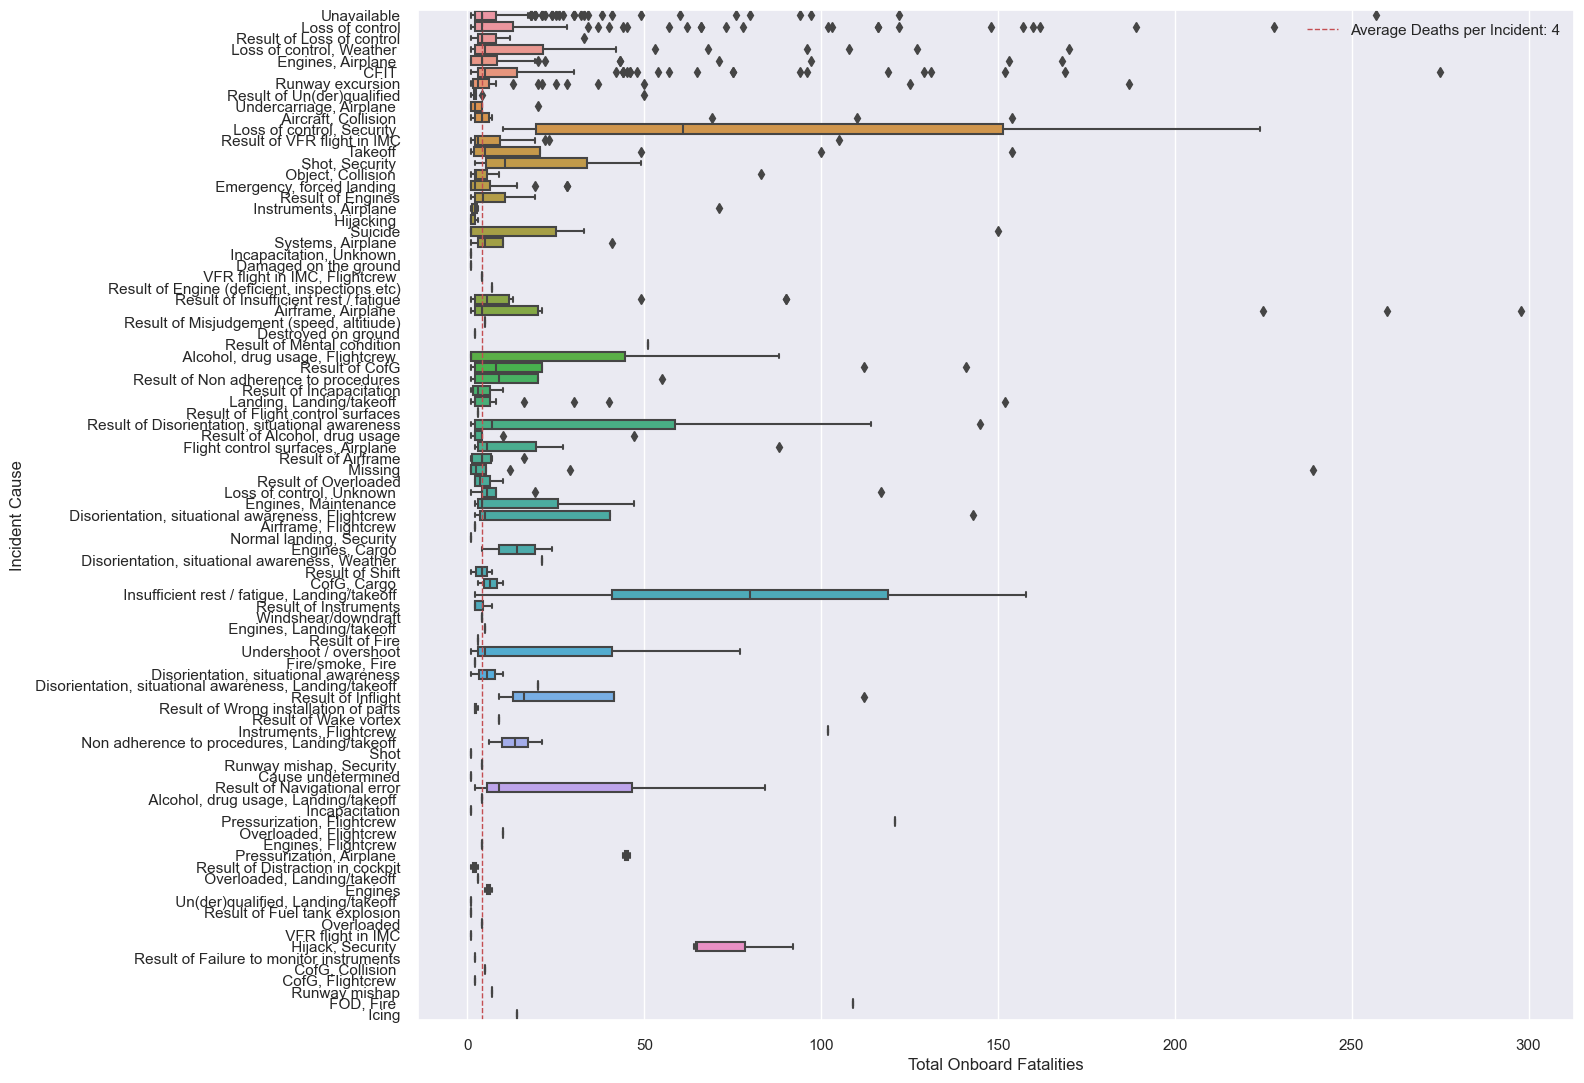

In [235]:
fig , ax = plt.subplots(figsize=(16, 11))
sns.boxplot(box_fatal, y='Incident Cause', x='Total Onboard Fatalities')

#plt.xticks(rotation = 290)
ax.set_xlabel('Total Onboard Fatalities')
ax.axvline(average_deaths, color='r', label=f'Average Deaths per Incident: {average_deaths:0.0f}', linestyle='--', linewidth=1)
ax.legend().set_visible(True)
plt.tight_layout()


In [236]:
air_disaster_2000s

Incident_Date                        Aircaft_Model Aircaft_Registration  \
0       2022-01-03  British Aerospace 4121 Jetstream 41               ZS-NRJ   
1       2022-01-04  British Aerospace 3101 Jetstream 31               HR-AYY   
2       2022-01-05                       Boeing 737-4H6               EP-CAP   
3       2022-01-08                  Tupolev Tu-204-100C             RA-64032   
4       2022-01-12        Beechcraft 200 Super King Air                   NA   
...            ...                                  ...                  ...   
4583    2000-12-23           McDonnell Douglas DC-10-10               N132AA   
4584    2000-12-23        Beechcraft 200 Super King Air               VP-BBK   
4585    2000-12-29  British Aerospace 4101 Jetstream 41               N323UE   
4586    2000-12-29                       Boeing 747-436               G-BNLM   
4587    2000-01-01                      Yakovlev Yak-40             RA-87847   

                                      Aircaft_Operator  \
0                                           SA Airlink   
1                                               LANHSA   
2                                     Caspian Airlines   
3                             Cainiao, opb Aviastar-TU   
4                                              private   
...                                                ...   
4583       American Airlines, op.for Hawaiian Airlines   
4584                             Videovision Broadcast   
4585       United Express, opb Atlantic Coast Airlines   
4586                                   British Airways   
4587  NovgorodAvia, op.for Ecuato Guineana de Aviacion   

                         Aircaft_Nature  \
0      Domestic Non Scheduled Passenger   
1          Domestic Scheduled Passenger   
2          Domestic Scheduled Passenger   
3                                 Cargo   
4                        Illegal Flight   
...                                 ...   
4583  International Scheduled Passenger   
4584   Domestic Non Scheduled Passenger   
4585       Domestic Scheduled Passenger   
4586  International Scheduled Passenger   
4587                            Unknown   

                                      Incident_Category  \
0                          Accident | repairable-damage   
1                          Accident | repairable-damage   
2                          Accident | repairable-damage   
3                                  Accident | hull-loss   
4     Criminal occurrence (sabotage, shoot down) | h...   
...                                                 ...   
4583                       Accident | repairable-damage   
4584                               Accident | hull-loss   
4585                               Accident | hull-loss   
4586                      Hijacking | repairable-damage   
4587  other occurrence (ground fire, sabotage) | hul...   

                                     Incident_Cause(es)     Incident_Location  \
0     Airplane - Engines, Airplane - Engines - Prop/...  near Venetia Mine...   
1     Airplane - Undercarriage, Airplane - Undercarr...       Roatán-Juan ...   
2     Airplane - Undercarriage, Airplane - Undercarr...       Isfahan-Shah...   
3     Cargo - Fire/smoke, Result - Damaged on the gr...       Hangzhou-Xia...   
4                        Result - Damaged on the ground       Machakilha, ...   
...                                                 ...                   ...   
4583                          Result - Runway excursion       Papeete-Faaa...   
4584                           Result - Loss of control  near Blackbushe A...   
4585                          Result - Runway excursion       Charlottesvi...   
4586  Result - Hijacking - Hijacker(s) overpowered b...       Nairobi-Jomo...   
4587                     Result - Damaged on the ground       Malabo-Santa...   

        Aircaft_Damage_Type                       Date  ...  Year  \
0               Substantial      Monday 3 January 2022  ...  2022   
1         

In [240]:
from yellowbrick.target import FeatureCorrelation

/Users/benmacdonald/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


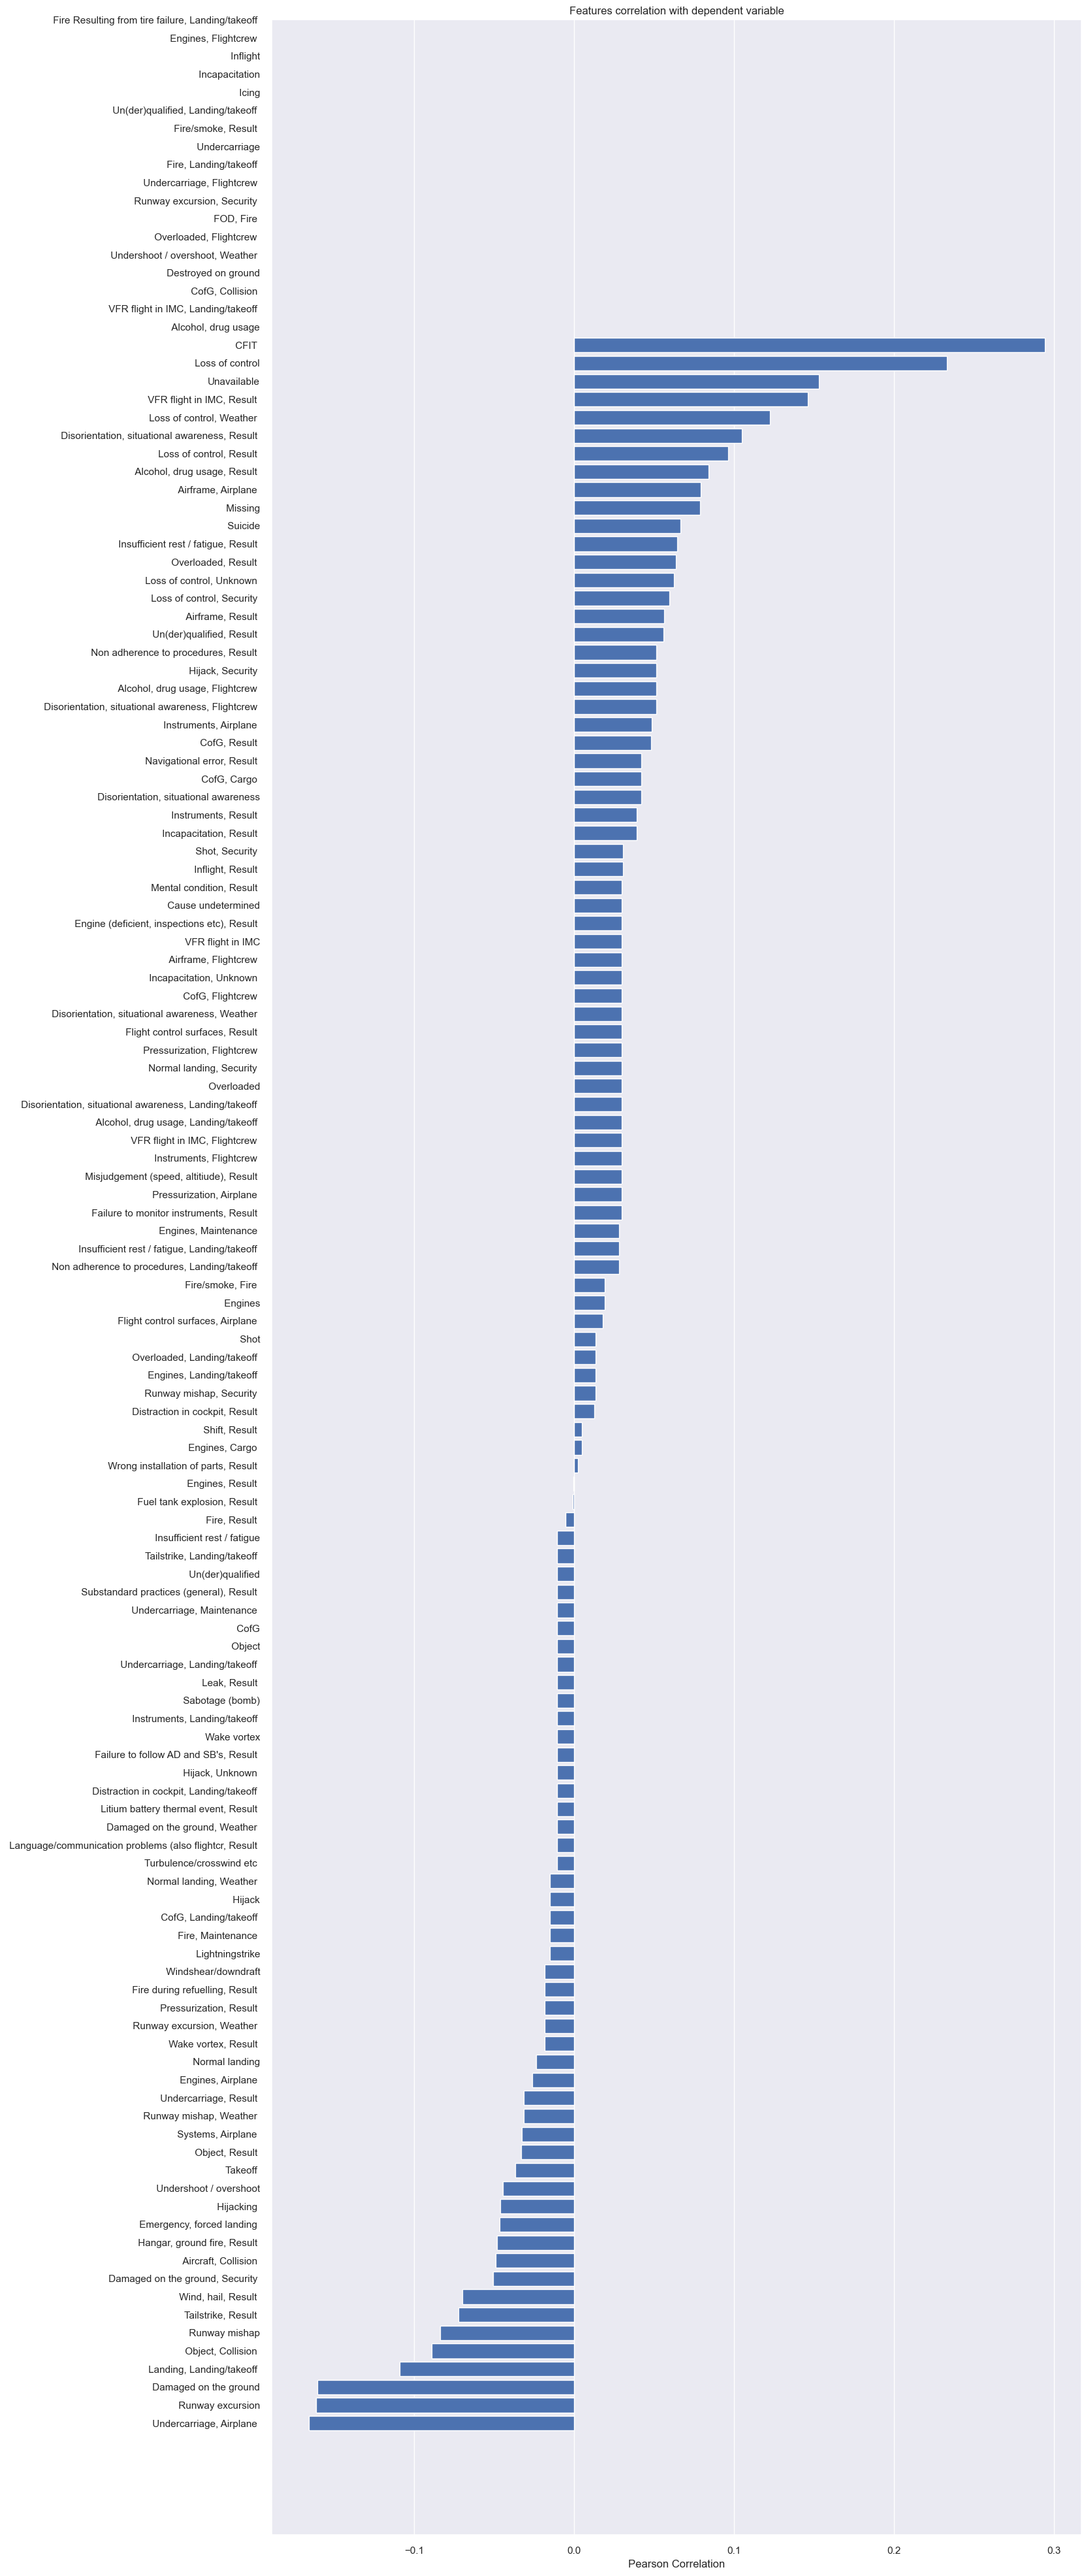

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [241]:
from yellowbrick.target import FeatureCorrelation

fig, ax = plt.subplots(figsize= (16, 50))

viz = FeatureCorrelation(sort= True)
viz.fit(X_train, y_train)
viz.show()

In [242]:
X_train

Aircraft, Collision    Airframe, Airplane    Airframe, Flightcrew   \
722                       0                     0                       0   
4295                      0                     0                       0   
2823                      0                     0                       0   
1275                      0                     0                       0   
3872                      0                     0                       0   
...                     ...                   ...                     ...   
2103                      0                     0                       0   
3603                      0                     0                       0   
3340                      0                     0                       0   
3064                      1                     0                       0   
3398                      0                     0                       0   

       Airframe, Result    Alcohol, drug usage  \
722                    0                     0   
4295                   0                     0   
2823                   0                     0   
1275                   0                     0   
3872                   0                     0   
...                  ...                   ...   
2103                   0                     0   
3603                   0                     0   
3340                   0                     0   
3064                   0                     0   
3398                   0                     0   

       Alcohol, drug usage, Flightcrew   \
722                                   0   
4295                                  0   
2823                                  0   
1275                                  0   
3872                                  0   
...                                 ...   
2103                                  0   
3603                                  0   
3340                                  0   
3064                                  0   
3398                                  0   

       Alcohol, drug usage, Landing/takeoff    Alcohol, drug usage, Result   \
722                                        0                              0   
4295                                       0                              0   
2823                                       0                              0   
1275                                       0                              0   
3872                                       0                              0   
...                                      ...                            ...   
2103                                       0                              0   
3603                                       0                              0   
3340                                       0                              0   
3064                                       0                              0   
3398                                       0                              0   

       CFIT    Cause undetermined  ...   VFR flight in IMC  \
722        0                    0  ...                   0   
4295       0                    0  ...                   0   
2823       0                    0  ...                   0   
1275       0                    0  ...                   0   
3872       0                    0  ...                   0   
...      ...                  ...  ...                 ...   
2103       0                    0  ...                   0   
3603       0                    0  ...                   0   
3340       0                    0  ...                   0   
3064       0                    0  ...                   0   
3398       0                    0  ...                   0   

       VFR flight in IMC, Flightcrew    VFR flight in IMC, Landing/takeoff   \
722                                 0                                     0   
4295                                0                                     0   
2823                             

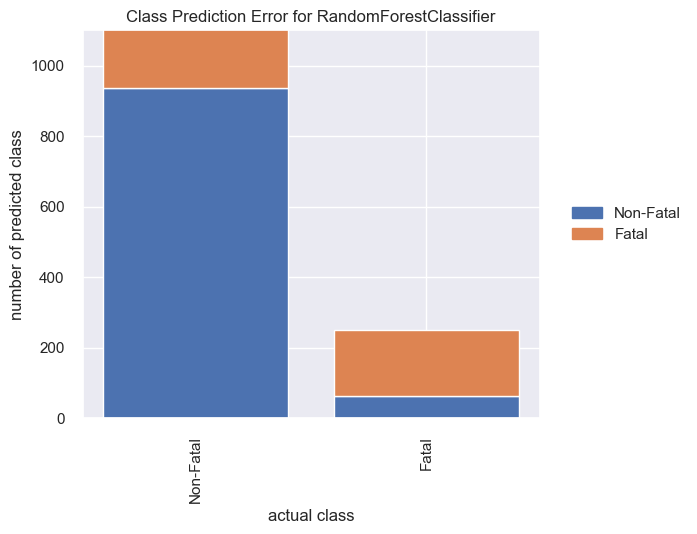

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [243]:

from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

classes = ['Non-Fatal', 'Fatal']
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

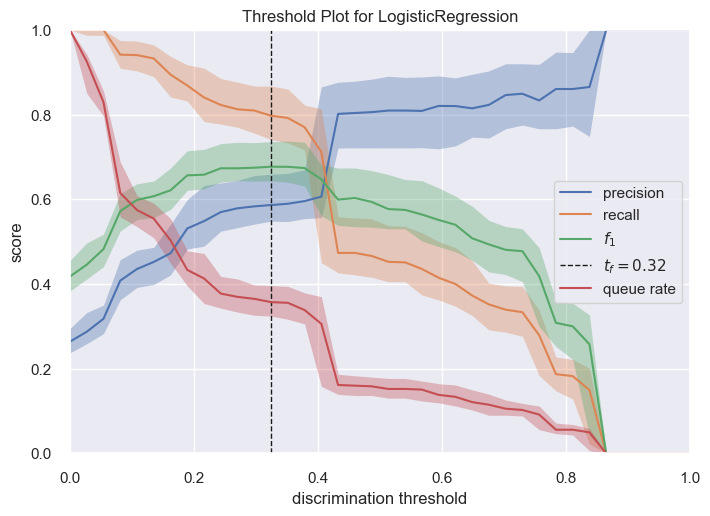

<Axes: title={'center': 'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [244]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold

model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()   

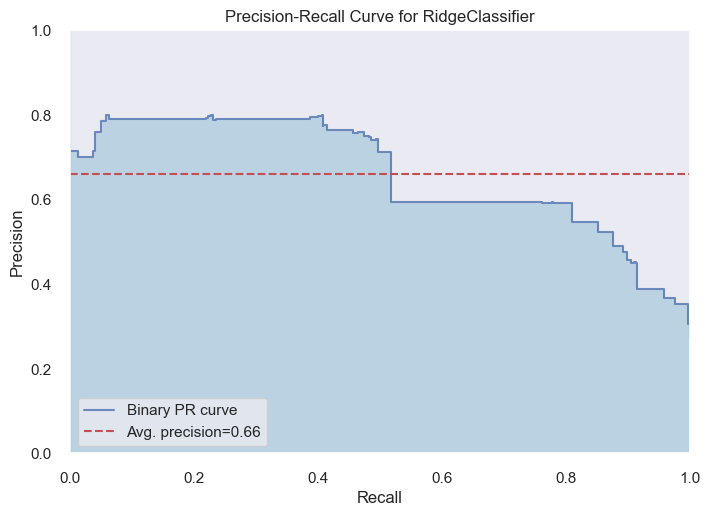

<Axes: title={'center': 'Precision-Recall Curve for RidgeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [245]:
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(RidgeClassifier(random_state=0))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()